In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
!rm time_series_19-covid-Confirmed.csv
!rm time_series_19-covid-Deaths.csv
!rm time_series_19-covid-Recovered.csv
!wget "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
!wget "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
!wget "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

--2020-03-22 01:12:50--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81207 (79K) [text/plain]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi 100%[===================>]  79,30K  --.-KB/s    in 0,1s    

2020-03-22 01:12:50 (709 KB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [81207/81207]

--2020-03-22 01:12:50--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw

In [2]:
df_confirmed = pd.read_csv("time_series_19-covid-Confirmed.csv").groupby("Country/Region").sum()
df_deaths = pd.read_csv("time_series_19-covid-Deaths.csv").groupby("Country/Region").sum()
df_recovered = pd.read_csv("time_series_19-covid-Recovered.csv").groupby("Country/Region").sum()

In [3]:
from sklearn.linear_model import LinearRegression

def get_confirmed(country="Argentina"):
    return np.array(df_confirmed.loc[country][2:]).astype(int)
def get_recovered(country="Argentina"):
    return np.array(df_recovered.loc[country][2:]).astype(int)
def get_deaths(country="Argentina"):
    return np.array(df_deaths.loc[country][2:]).astype(int)
def get_infected(country="Argentina"):
    return (get_confirmed(country)-get_recovered(country)-get_deaths(country))
def get_countries():
    return list(df_confirmed.iloc[:,-1].sort_values(ascending=False).index)
def get_countries_confirmed():
    return df_confirmed.loc[get_countries()].iloc[:,-1].values
def get_countries_recovered():
    return df_recovered.loc[get_countries()].iloc[:,-1].values
def get_countries_deaths():
    return df_deaths.loc[get_countries()].iloc[:,-1].values
def get_countries_infected():
    return get_countries_confirmed() - get_countries_recovered() - get_countries_deaths()


def days_since_first_infected(country="Argentina"):
    return sum(get_confirmed(country)>0)
def get_exp(country="Argentina", from_last=-20, to_last=0, window_size=5, epsilon = 1e-8):
    exponents = list()
    for idx in range(from_last, to_last-window_size):
        reg=LinearRegression()
        X = get_infected(country)[idx:idx+window_size]
        if 0 not in X:
            reg.fit(np.array(range(0,window_size)).reshape(-1,1),np.log(X).reshape(-1,1))
            exponents.append(np.exp(reg.coef_[0]))
        else:
            exponents.append(1)
    return exponents
def get_dates():
    return df_confirmed.columns[4:]
def plot_stats(country="Argentina"):
    dsfi = days_since_first_infected(country)
    plt.figure(figsize=[18,12])
    plt.plot(get_confirmed(country)[-dsfi-1:],label="Confirmed")
    plt.plot(get_recovered(country)[-dsfi-1:],label="Recovered")
    plt.plot(get_deaths(country)[-dsfi-1:],label="Deceased")
    plt.plot(get_infected(country)[-dsfi-1:],label="Infected")
    plt.legend()
    ax=plt.gca()
    ax=ax.twinx()
    ax.plot(get_exp(country,from_last=-dsfi,window_size=5))
    ax.plot([0,dsfi-4],[1,1],"--")
    plt.show()

In [4]:
countries =get_countries()

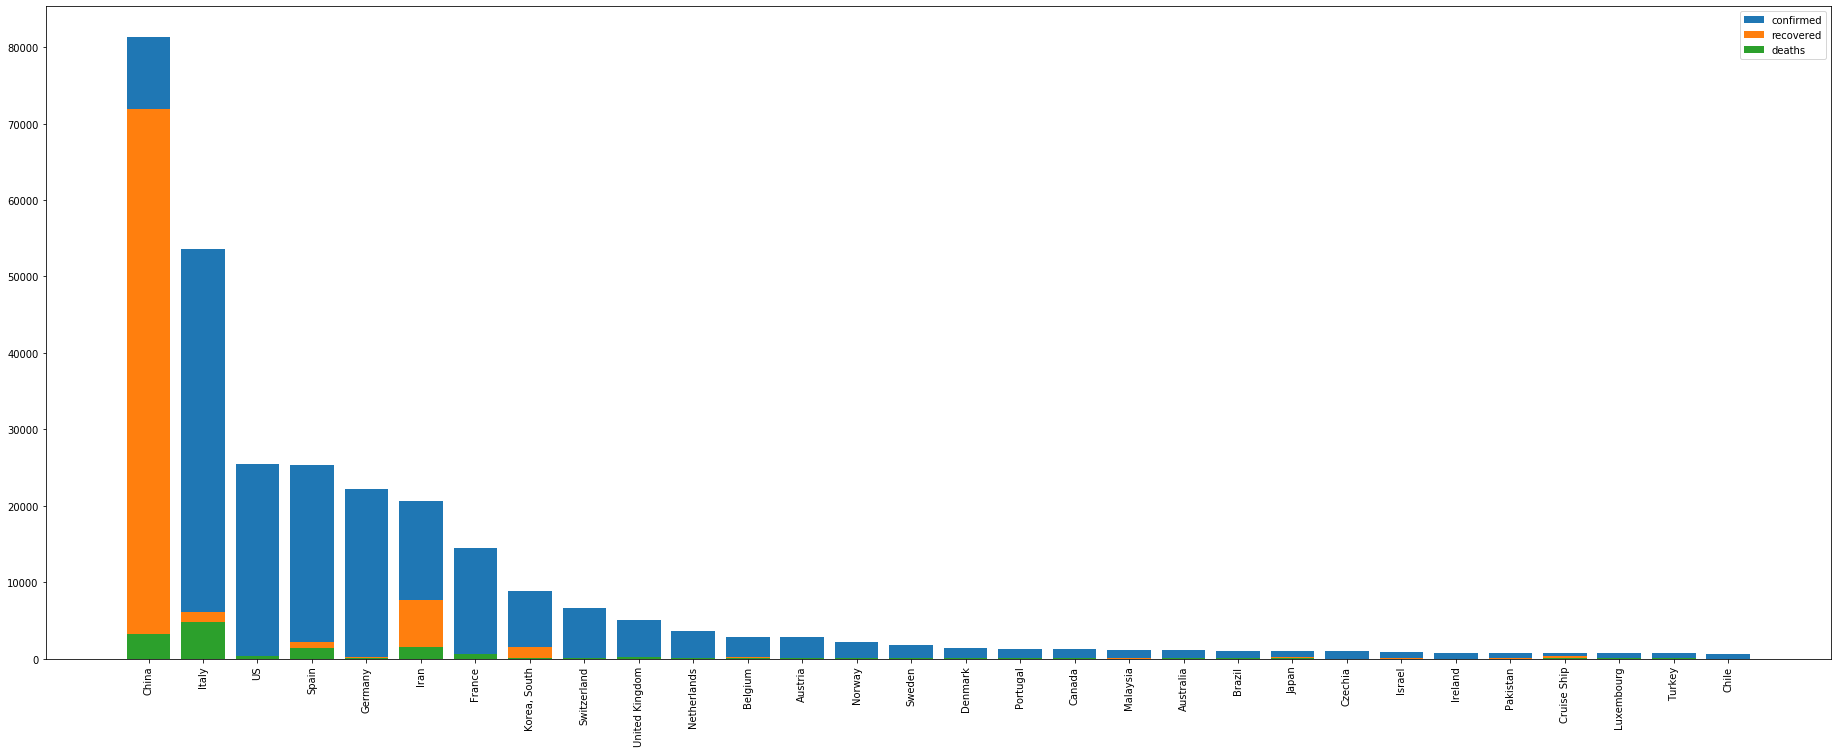

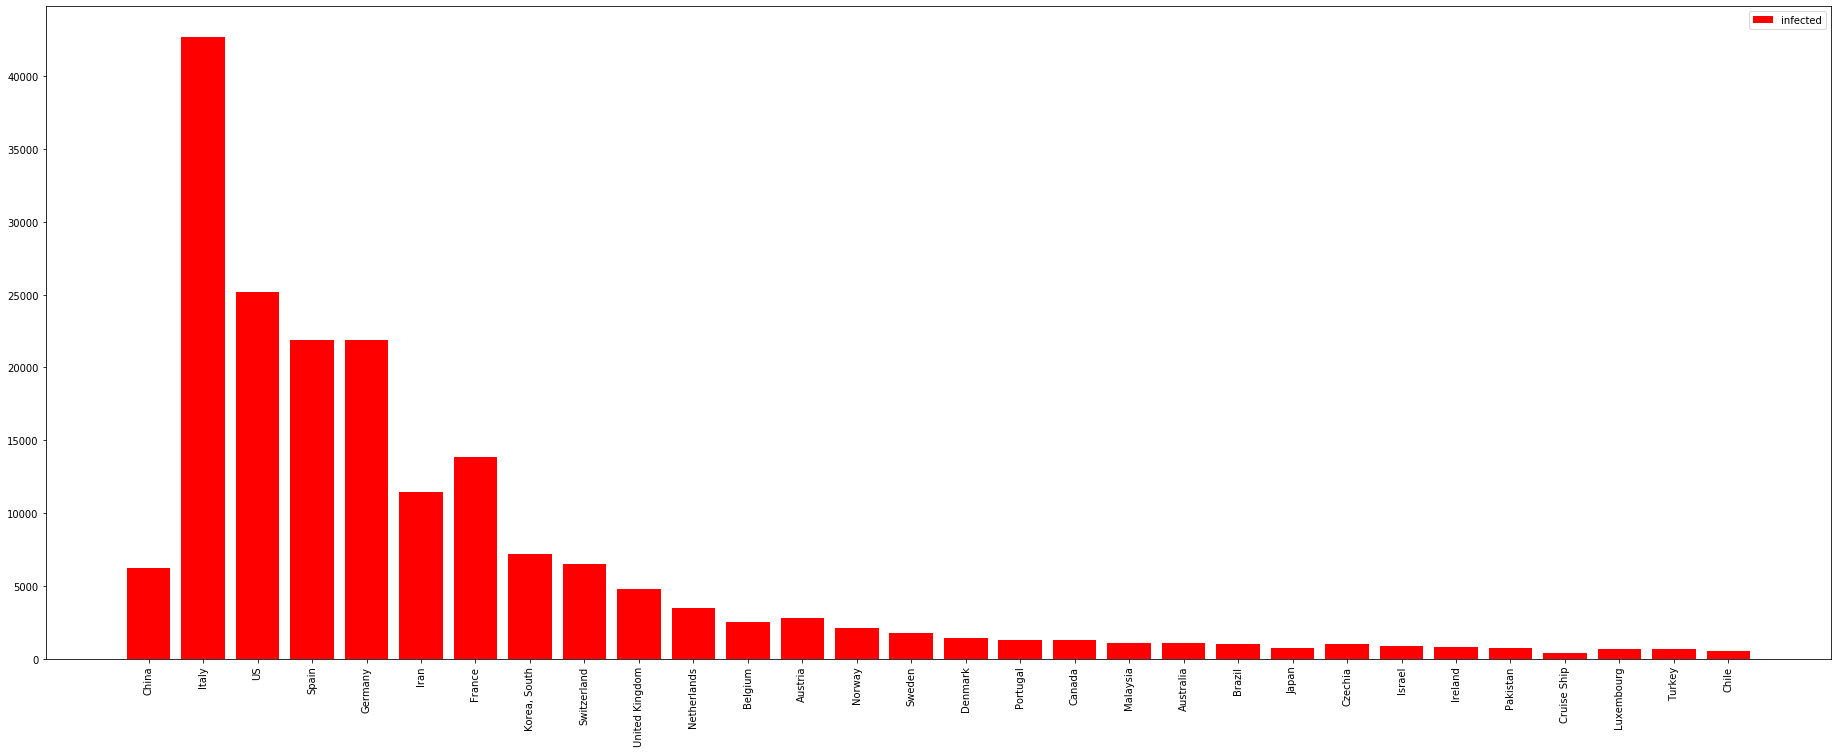

In [7]:
plt.figure(figsize=[32,12])
plt.bar(countries[:30], get_countries_confirmed()[:30],label="confirmed")
plt.bar(countries[:30], get_countries_recovered()[:30],label="recovered")
plt.bar(countries[:30], get_countries_deaths()[:30],label="deaths")
plt.legend()
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=[32,12])
plt.bar(countries[:30], get_countries_infected()[:30],color="red",label="infected")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [508]:
get_recovered("China")

array([   28,    30,    36,    39,    49,    58,   101,   120,   135,
         214,   275,   463,   614,   843,  1115,  1477,  1999,  2596,
        3219,  3918,  4636,  5082,  6217,  7977,  9298, 10755, 12462,
       14206, 15962, 18014, 18704, 22699, 23187, 25015, 27676, 30084,
       32930, 36329, 39320, 42162, 44854, 47450, 50001, 52292, 53944,
       55539, 57388, 58804, 60181, 61644, 62901, 64196, 65660, 67017,
       67910, 68798, 69755, 70535, 71266, 71857])

Days since first infected for China: 60


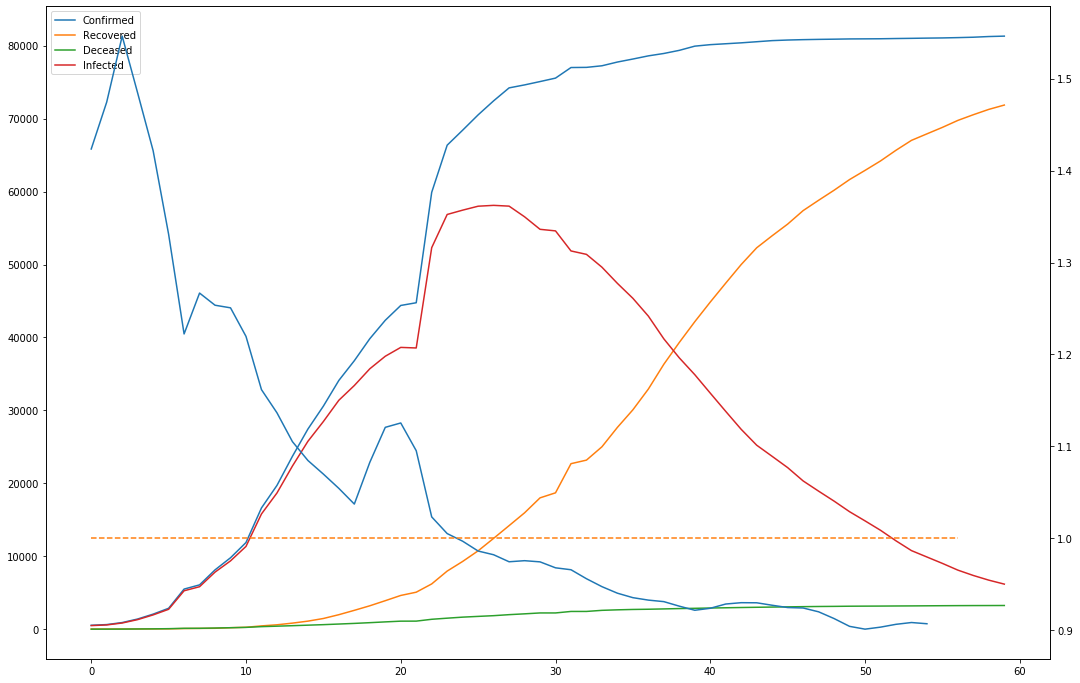

Days since first infected for Italy: 51


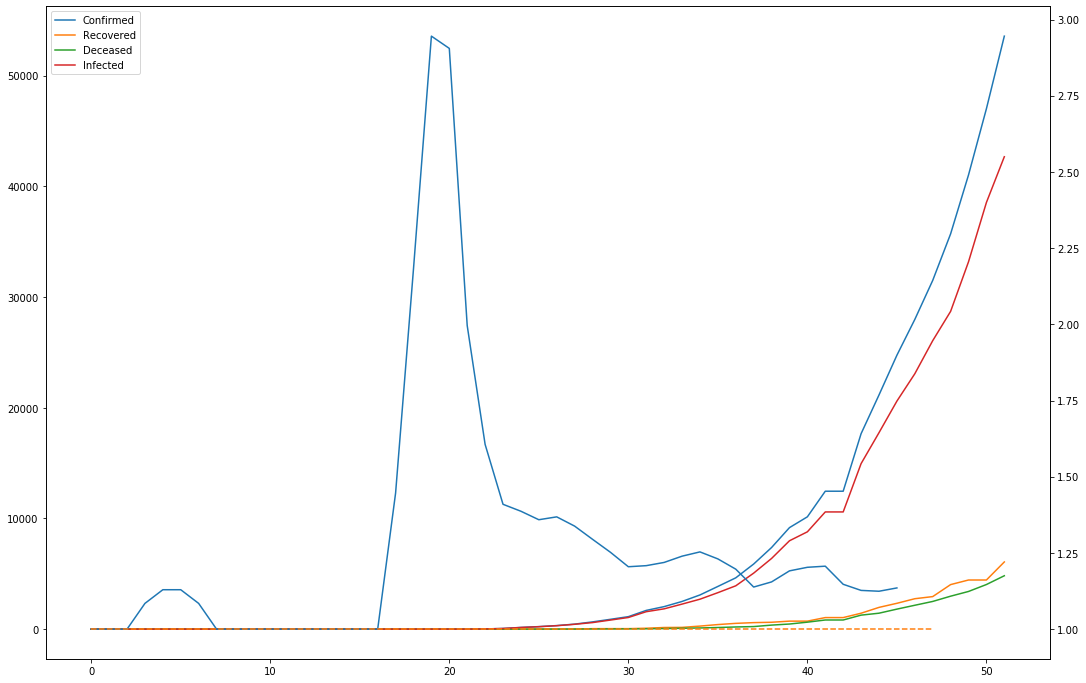

Days since first infected for US: 60


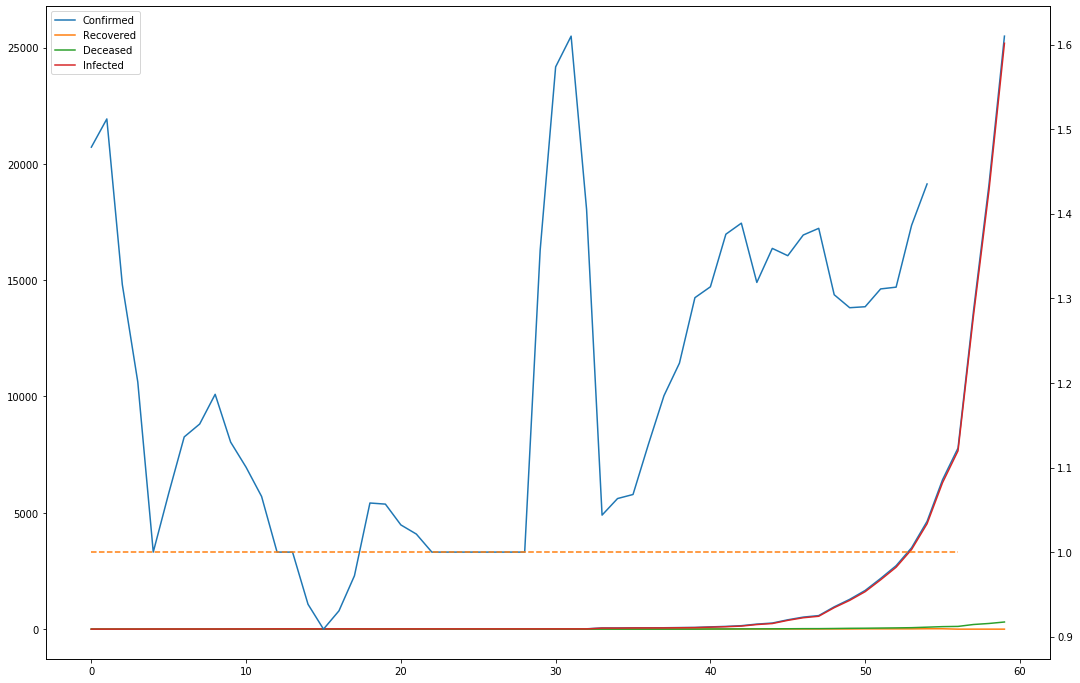

Days since first infected for Spain: 50


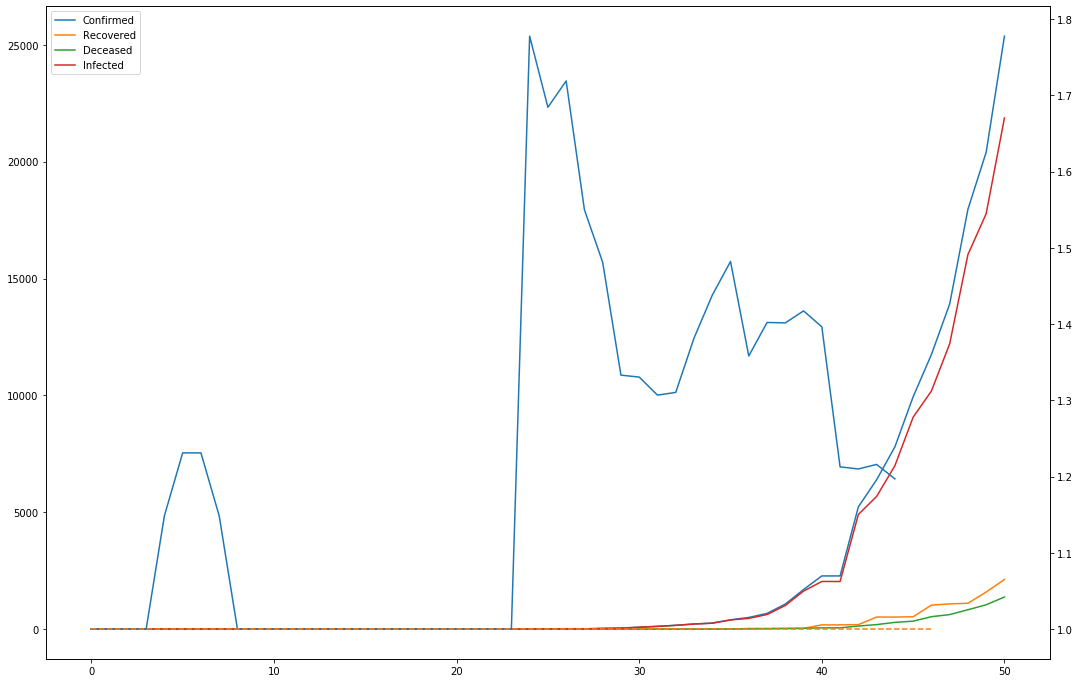

Days since first infected for Germany: 55


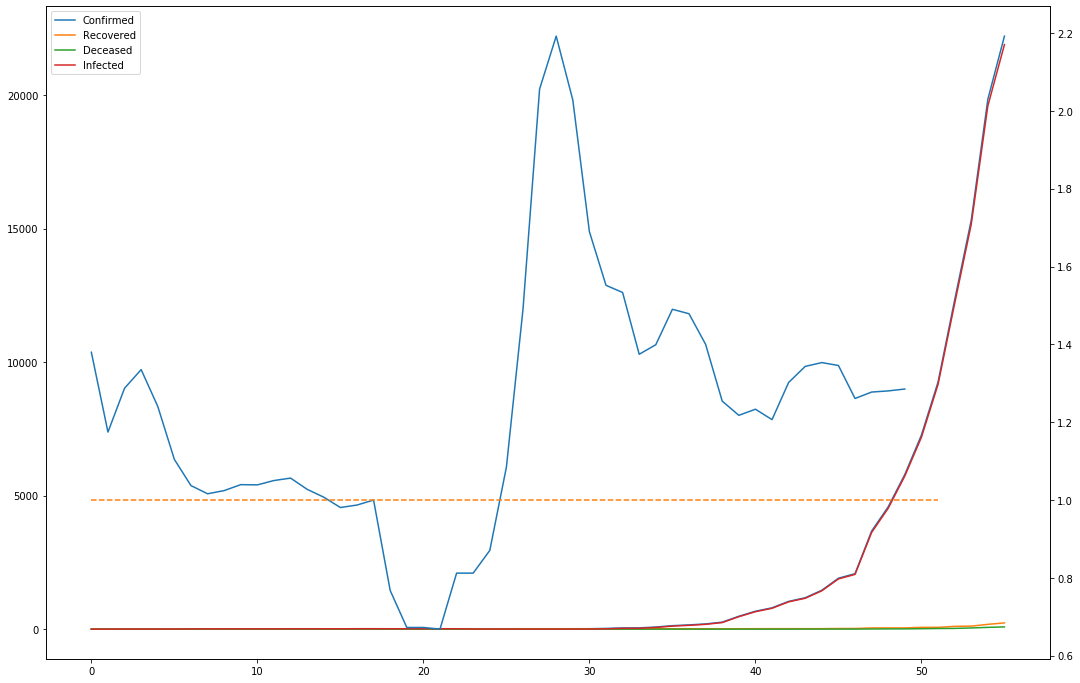

Days since first infected for Iran: 32


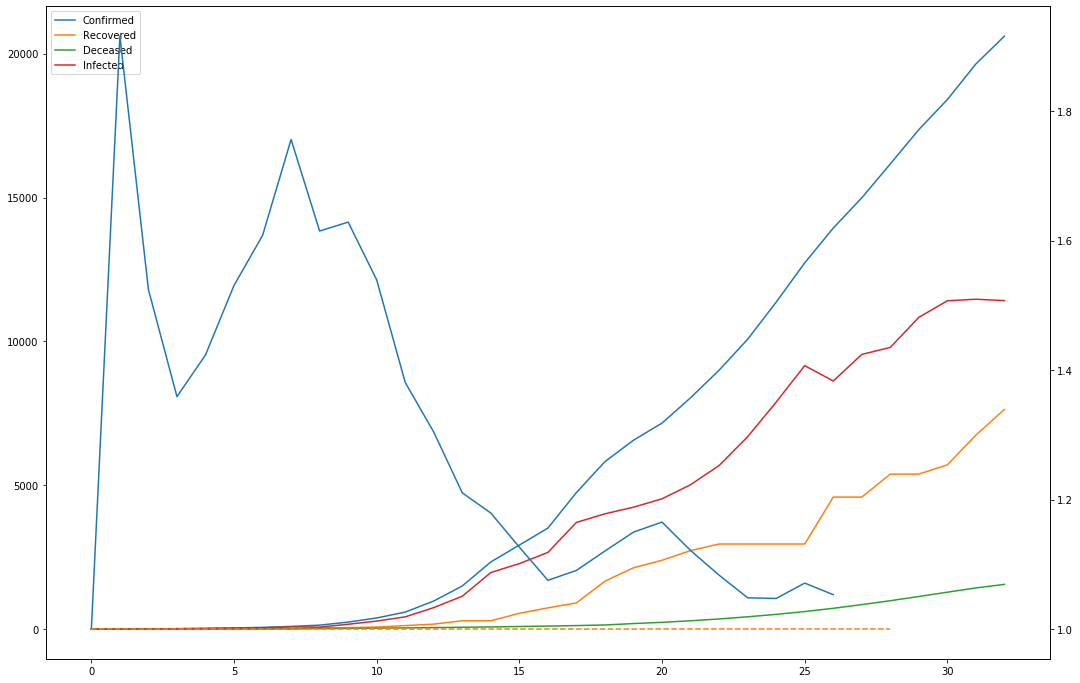

Days since first infected for France: 58


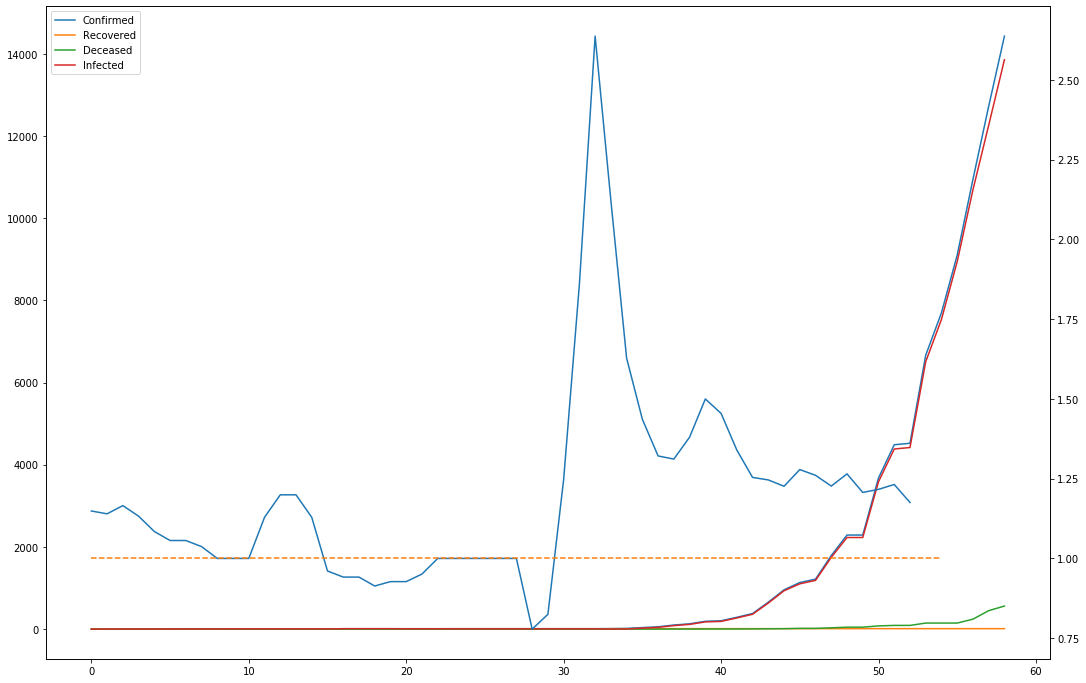

Days since first infected for Korea, South: 60


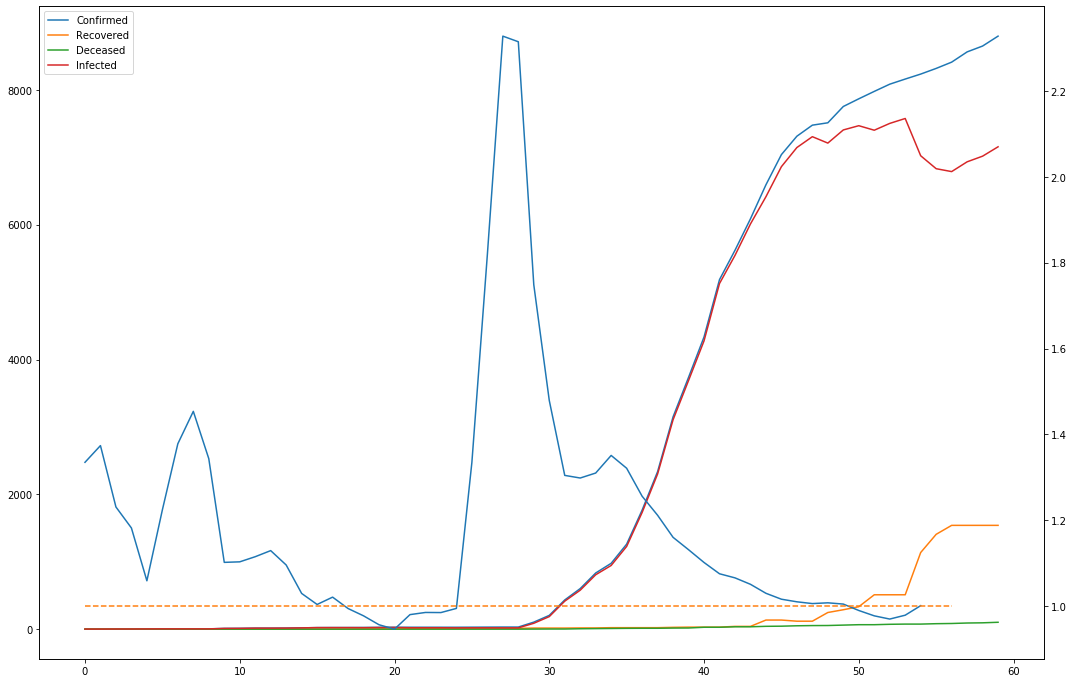

Days since first infected for Switzerland: 26


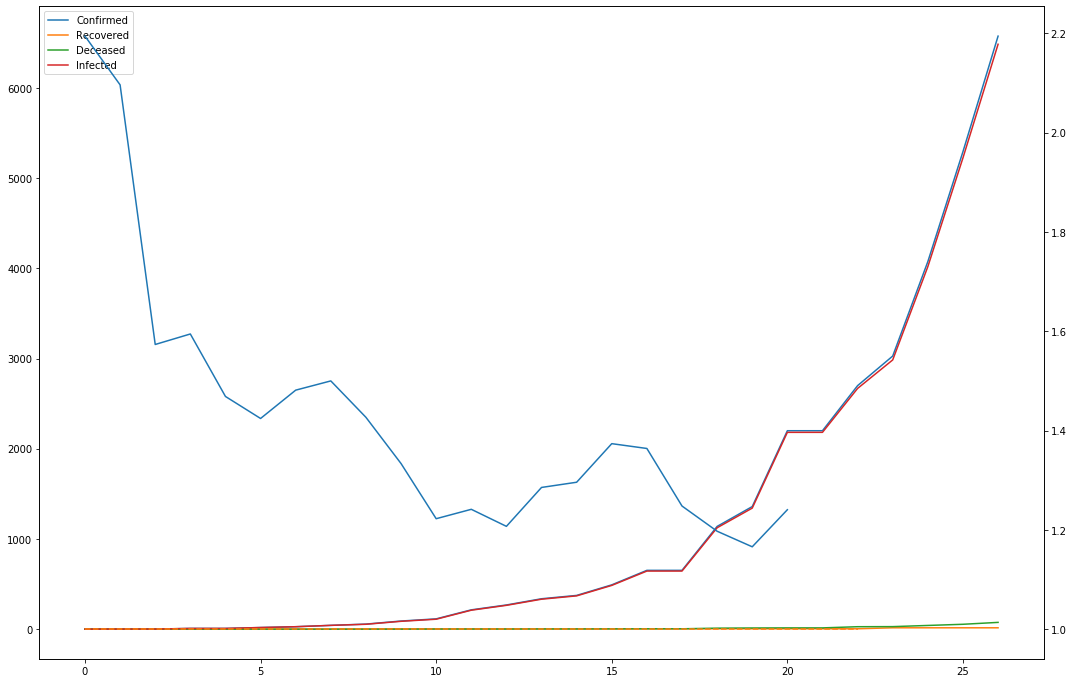

Days since first infected for United Kingdom: 51


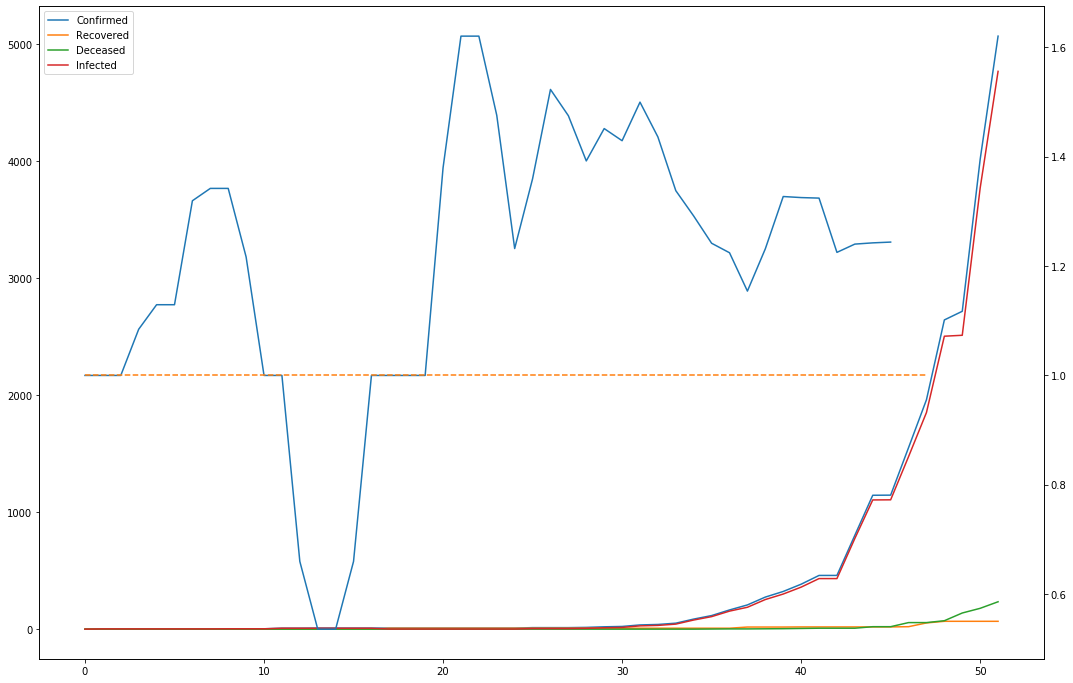

Days since first infected for Netherlands: 24


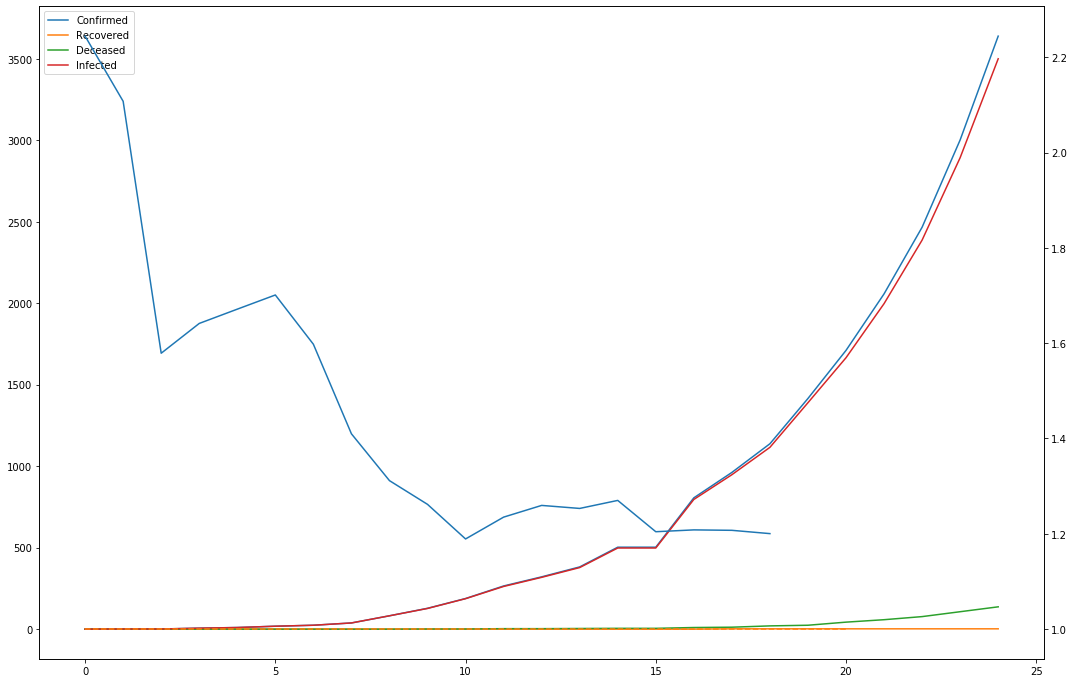

Days since first infected for Belgium: 47


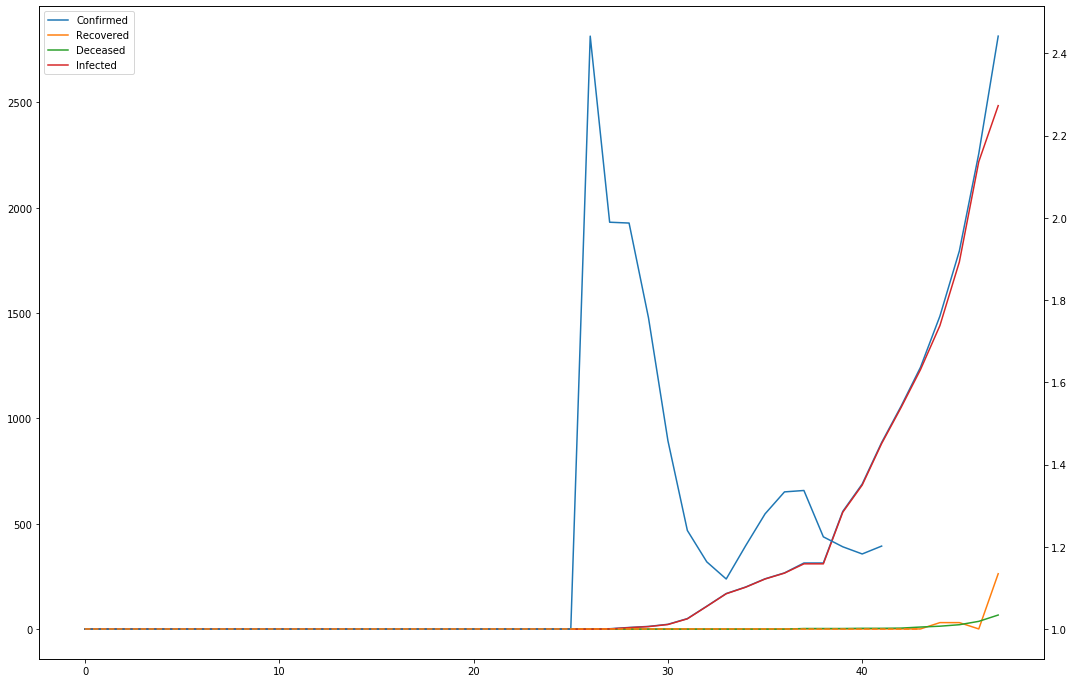

Days since first infected for Austria: 26


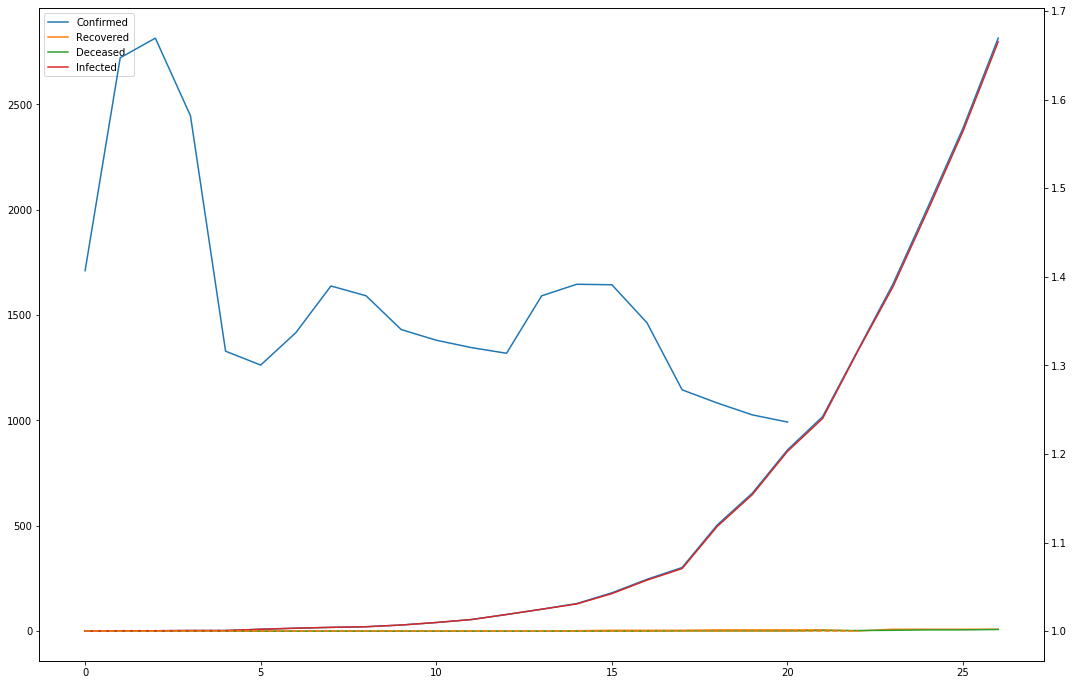

Days since first infected for Norway: 25


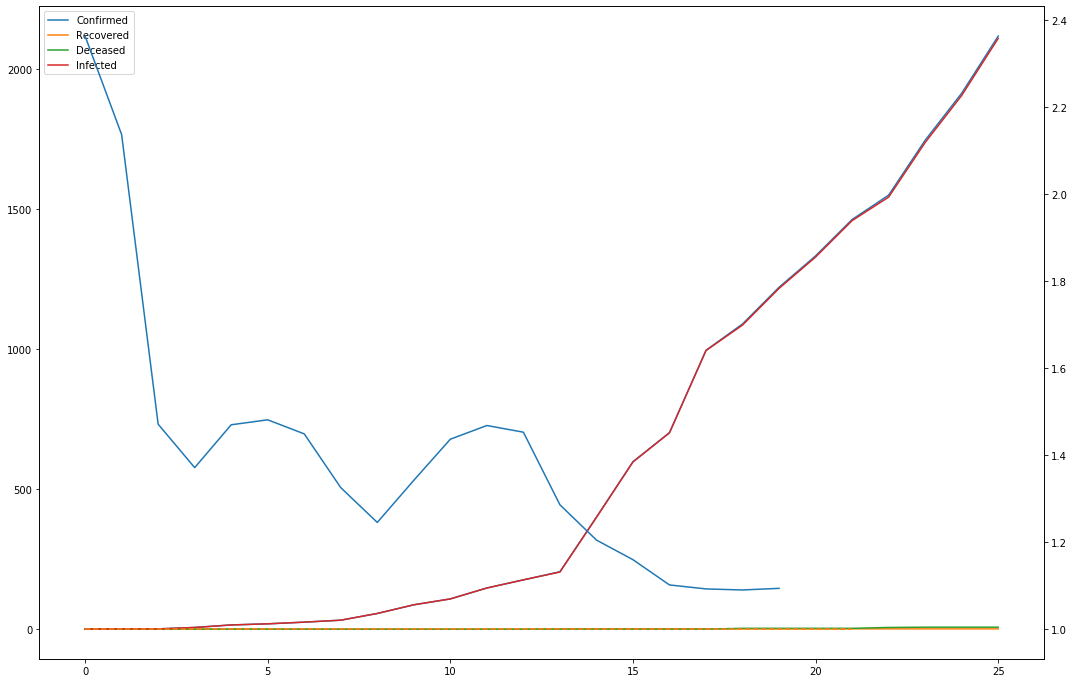

Days since first infected for Sweden: 51


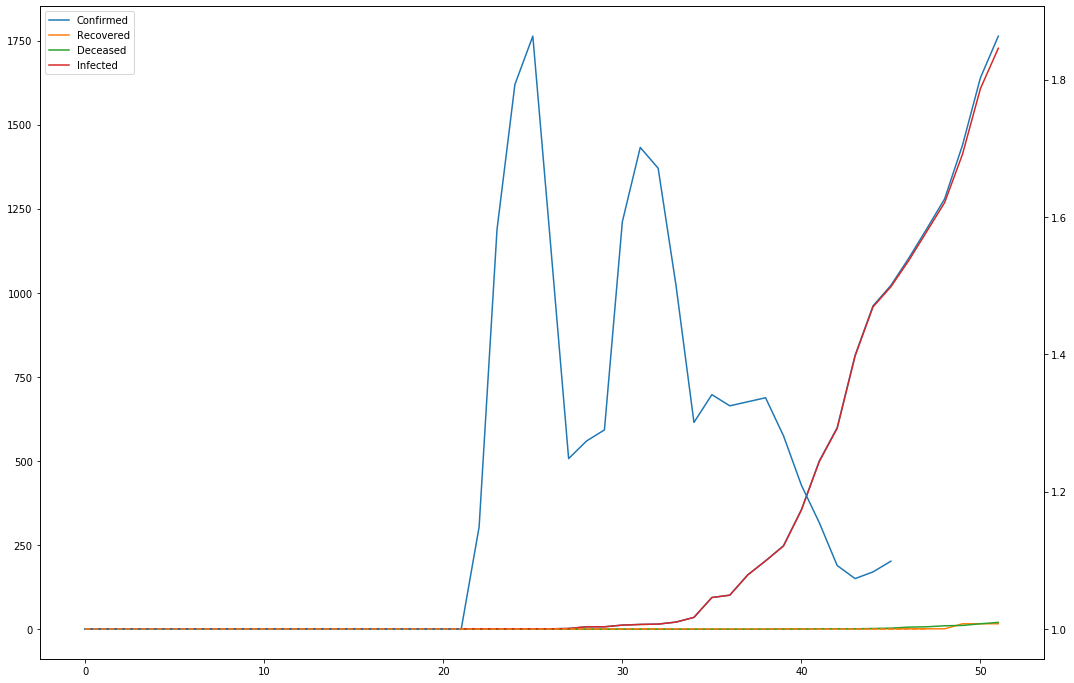

Days since first infected for Denmark: 24


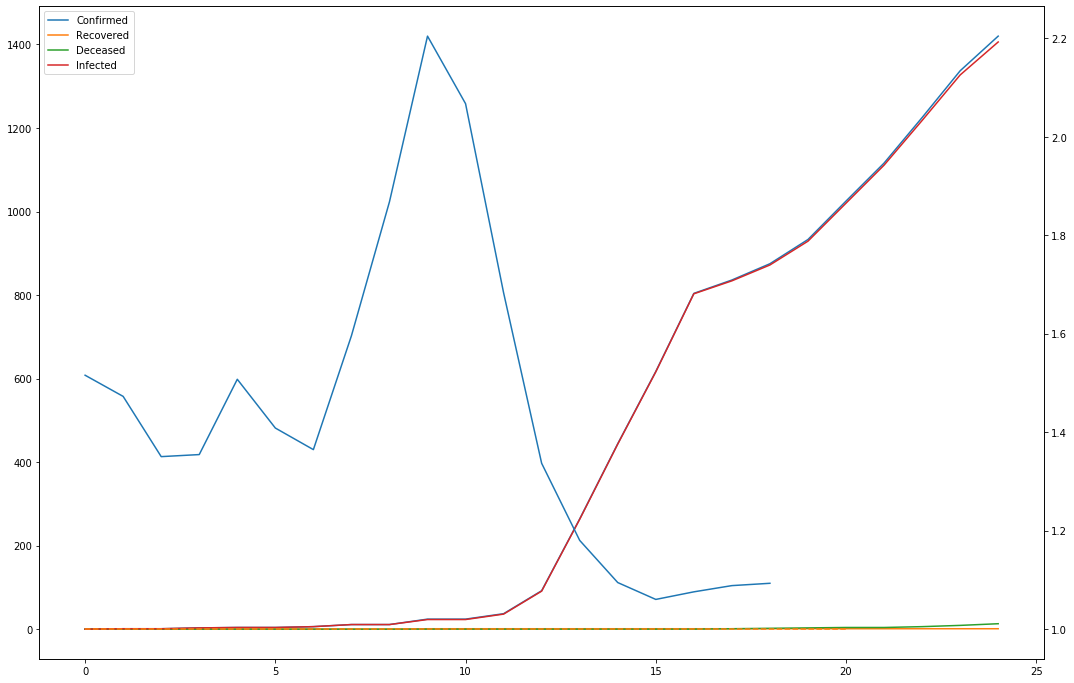

Days since first infected for Portugal: 20


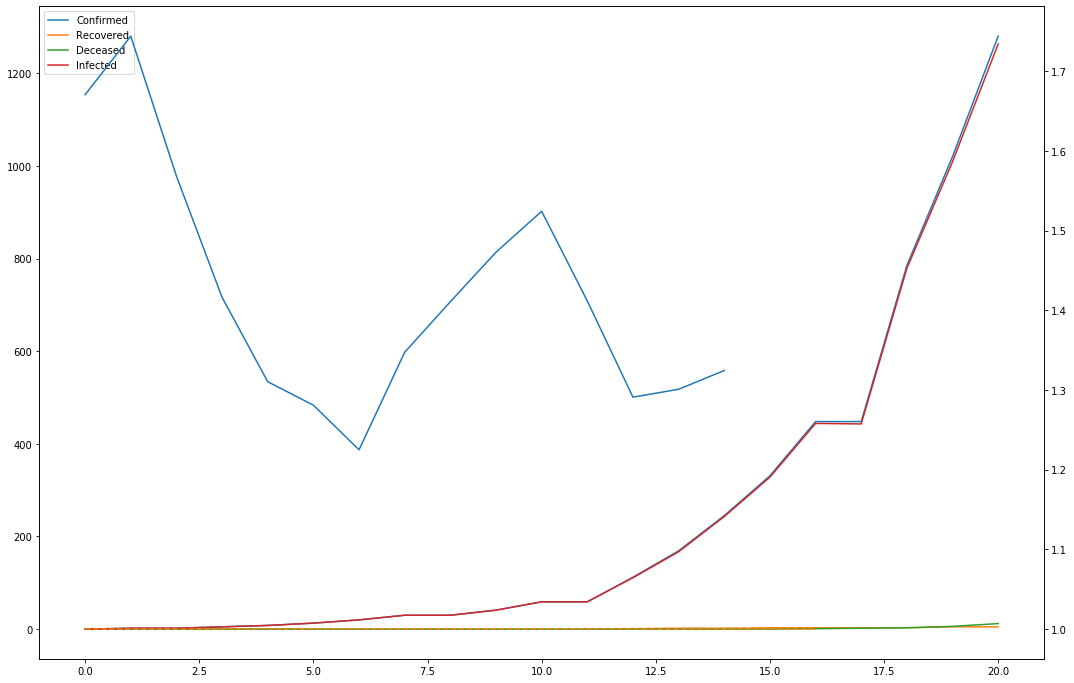

Days since first infected for Canada: 56


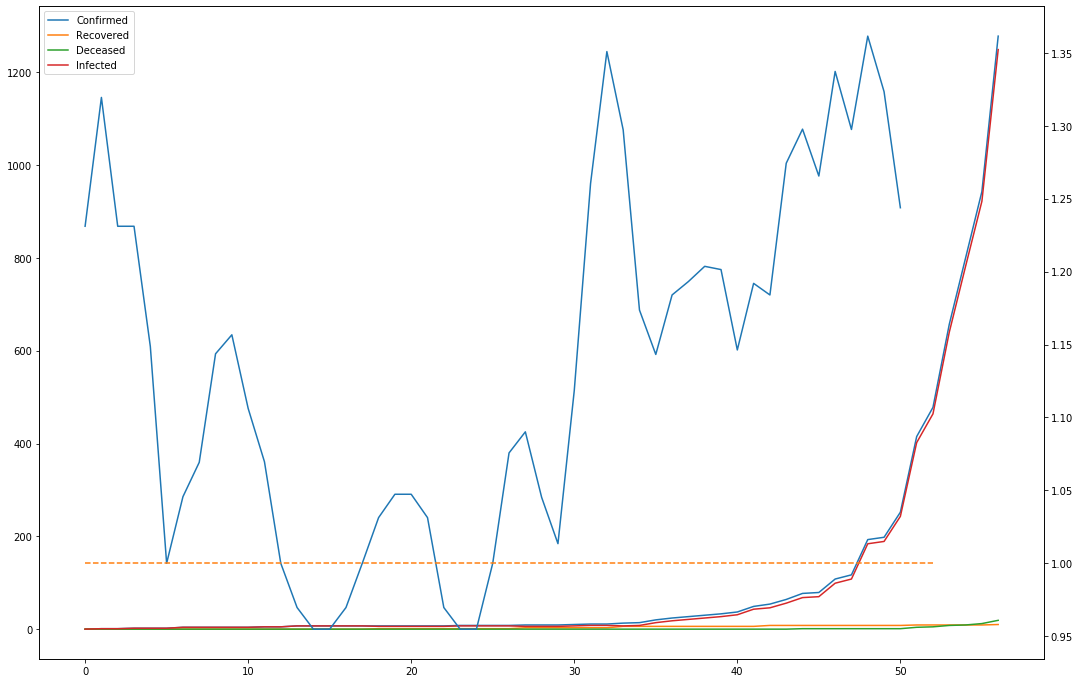

Days since first infected for Malaysia: 57


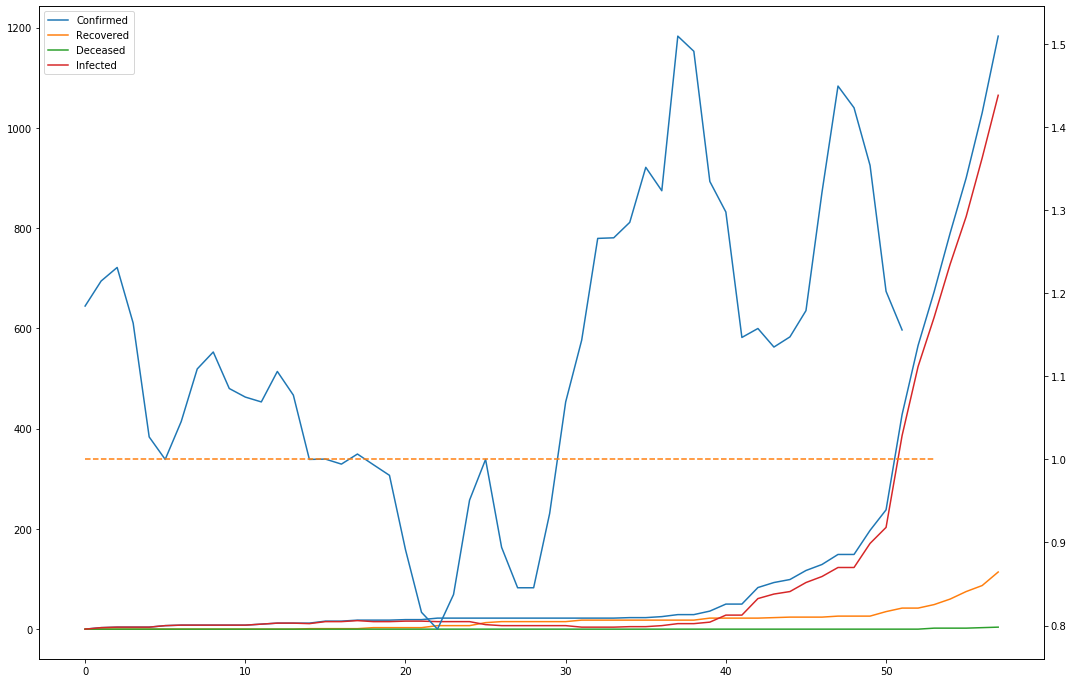

Days since first infected for Australia: 56


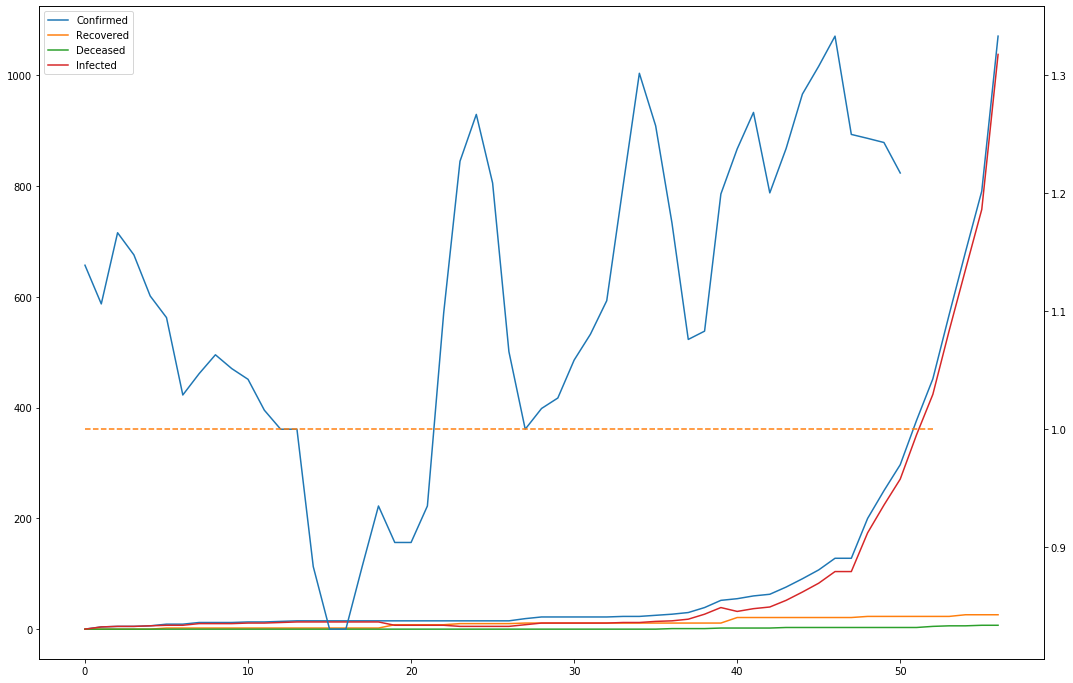

Days since first infected for Brazil: 25


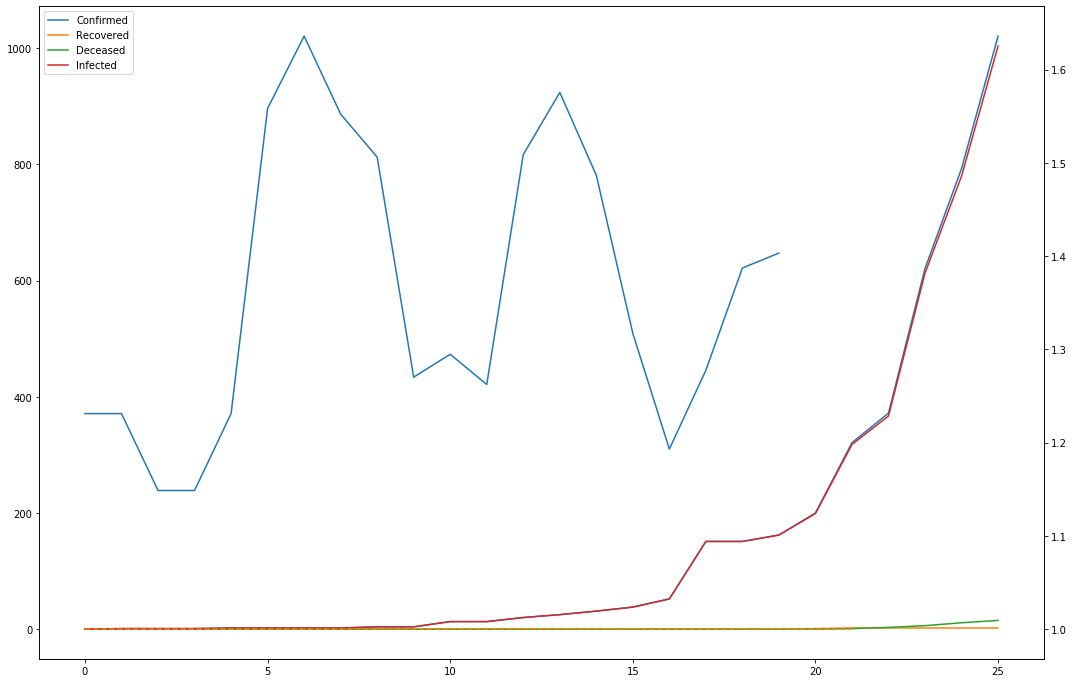

Days since first infected for Japan: 60


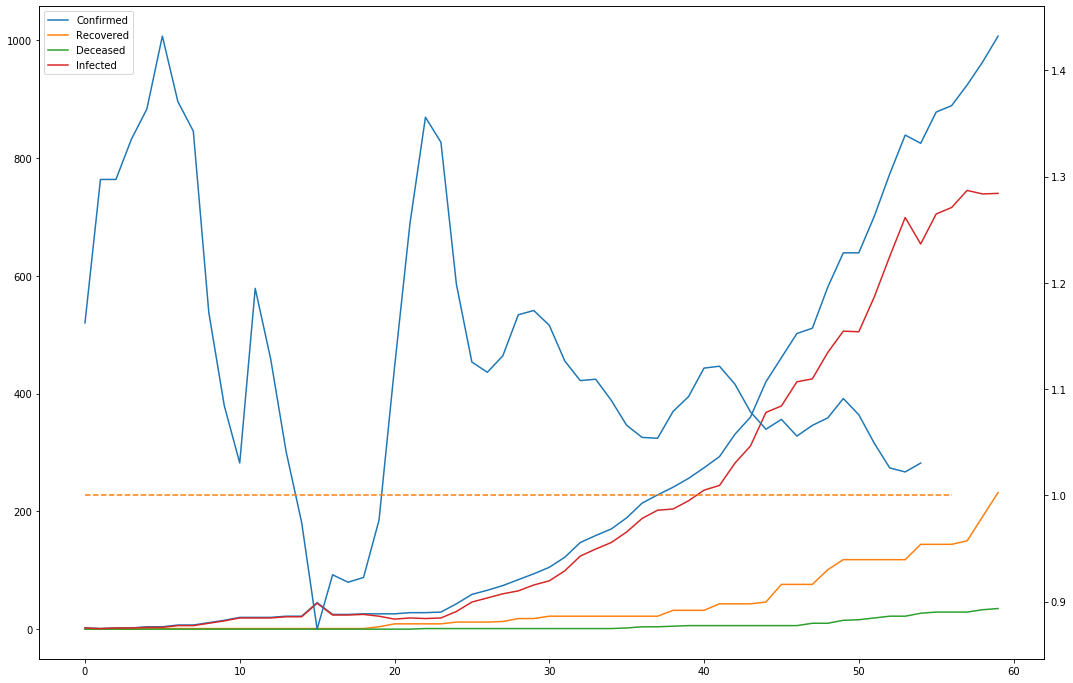

Days since first infected for Czechia: 21


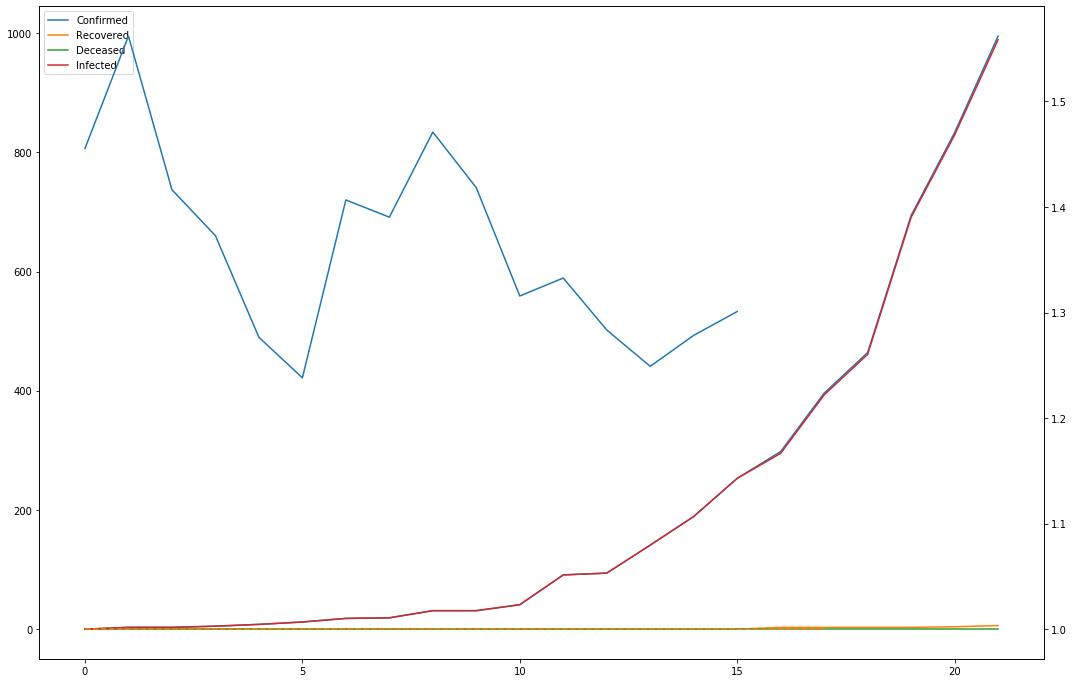

Days since first infected for Israel: 30


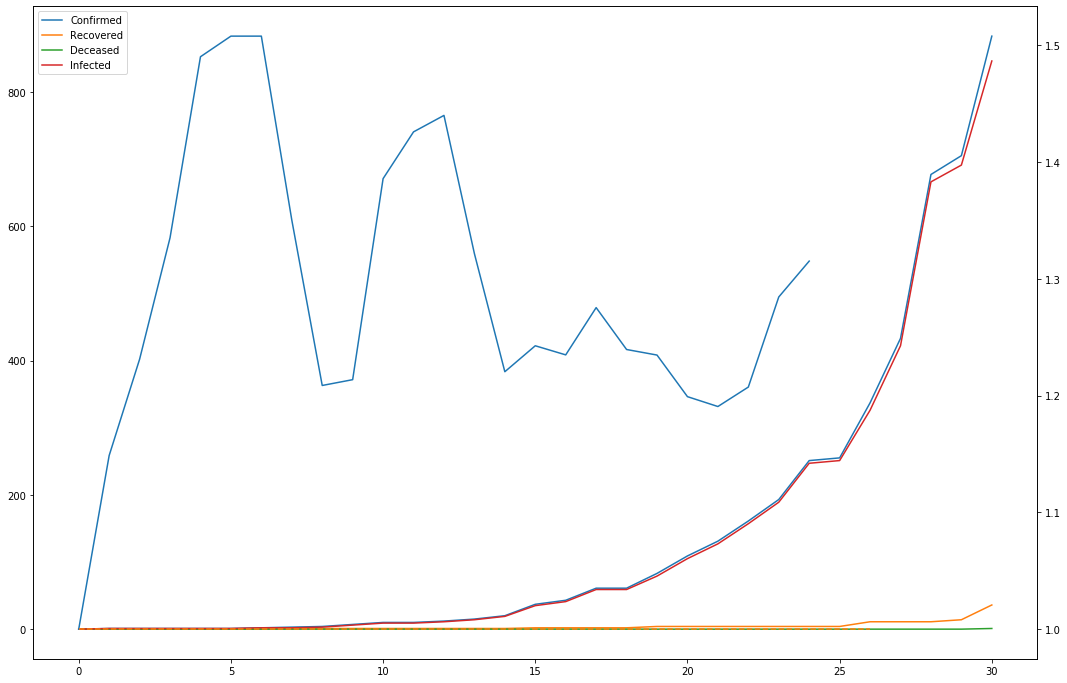

Days since first infected for Ireland: 22


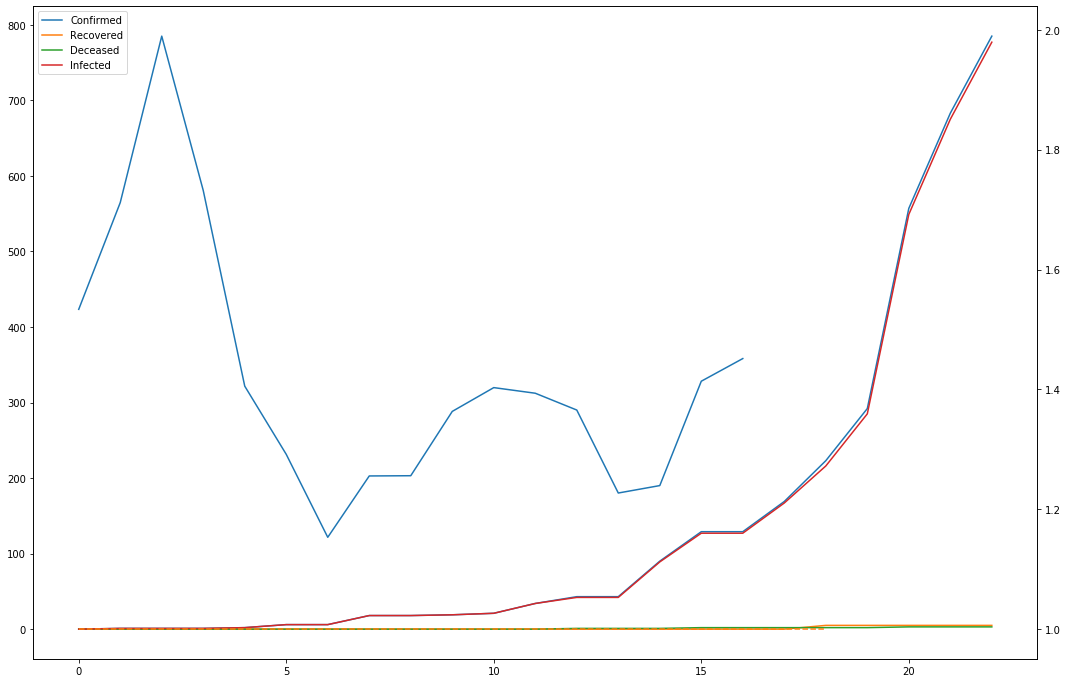

Days since first infected for Pakistan: 25


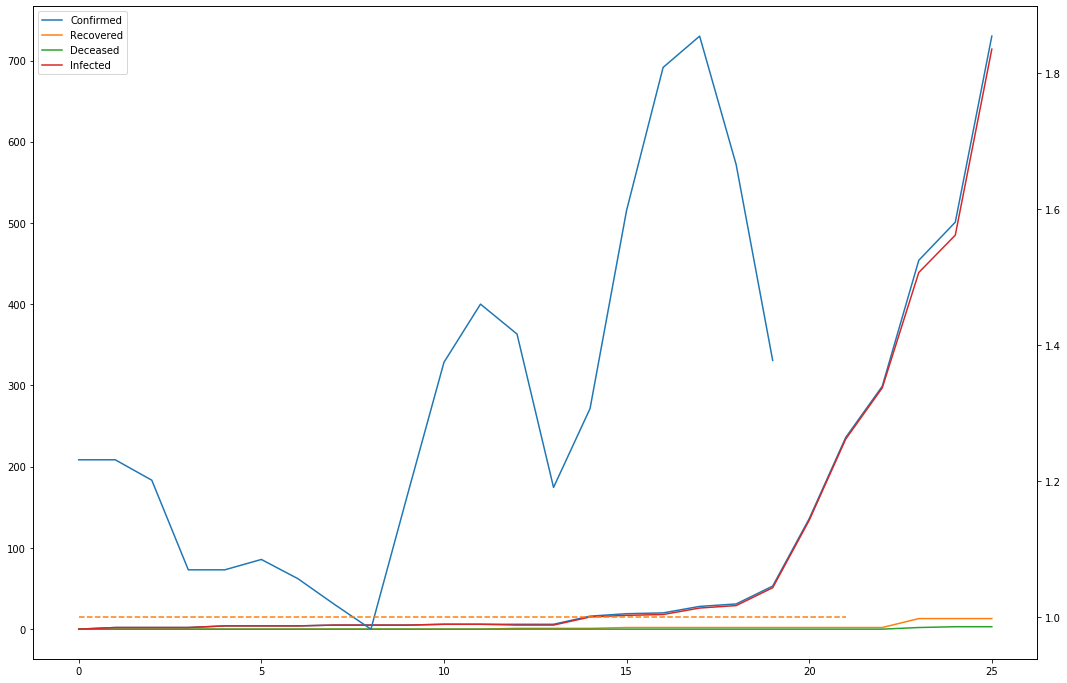

Days since first infected for Cruise Ship: 44


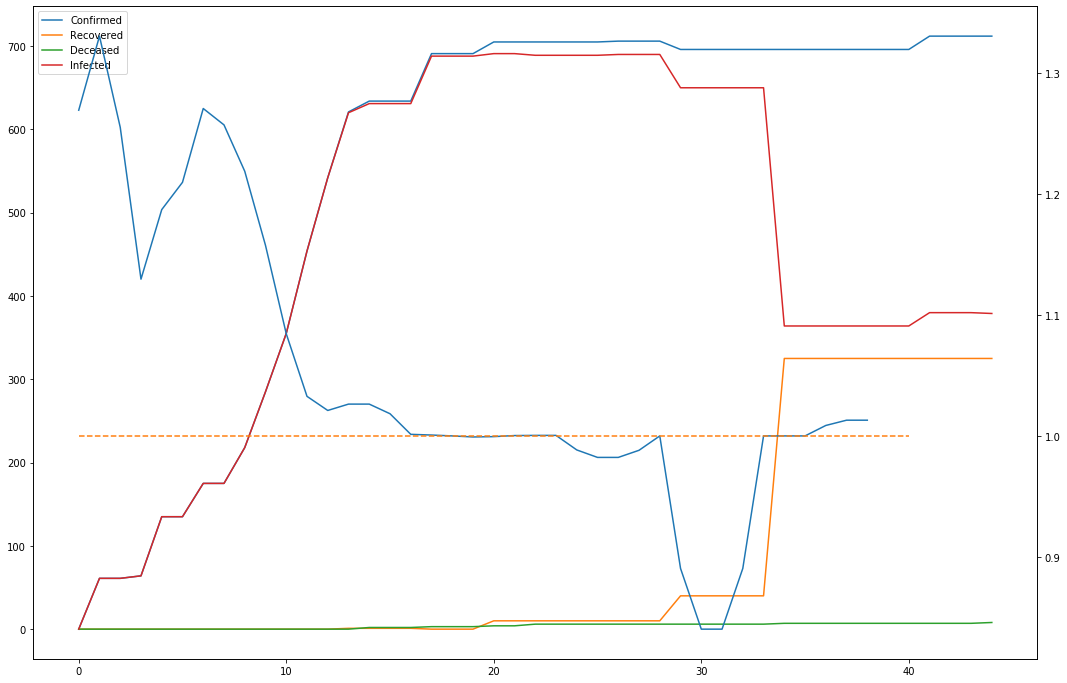

Days since first infected for Luxembourg: 22


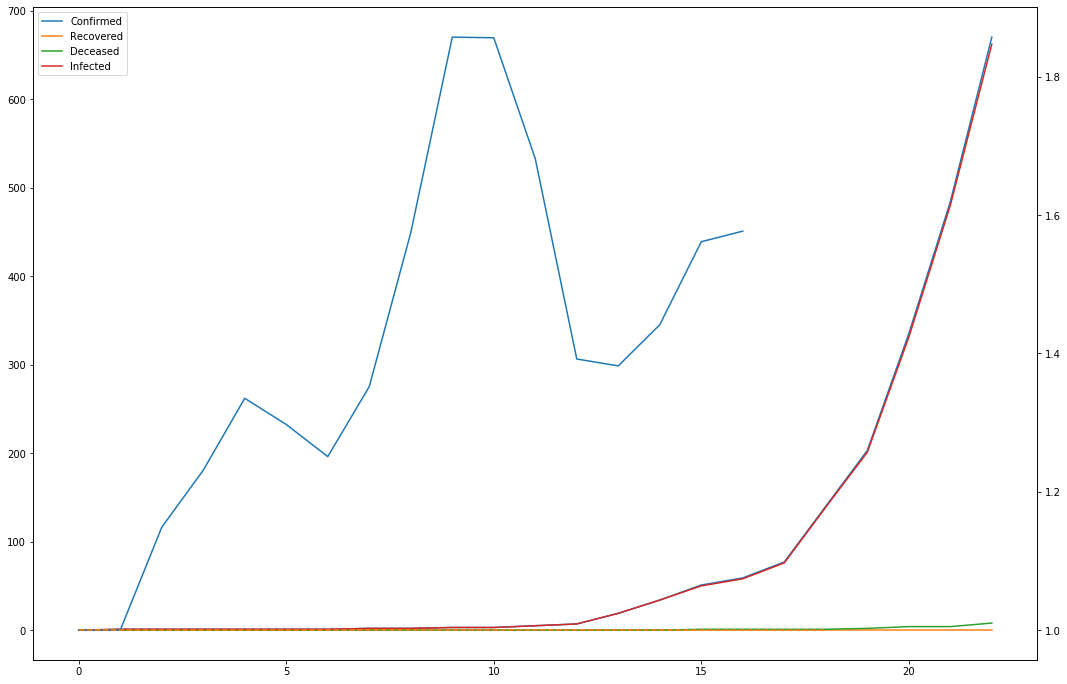

Days since first infected for Turkey: 11


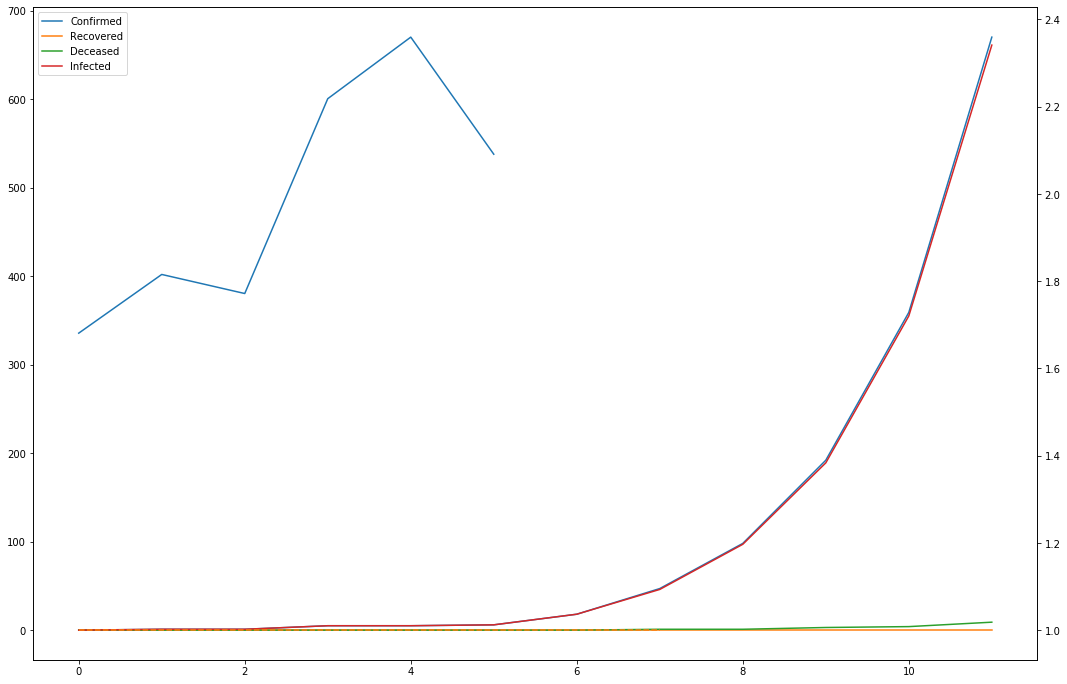

Days since first infected for Chile: 19


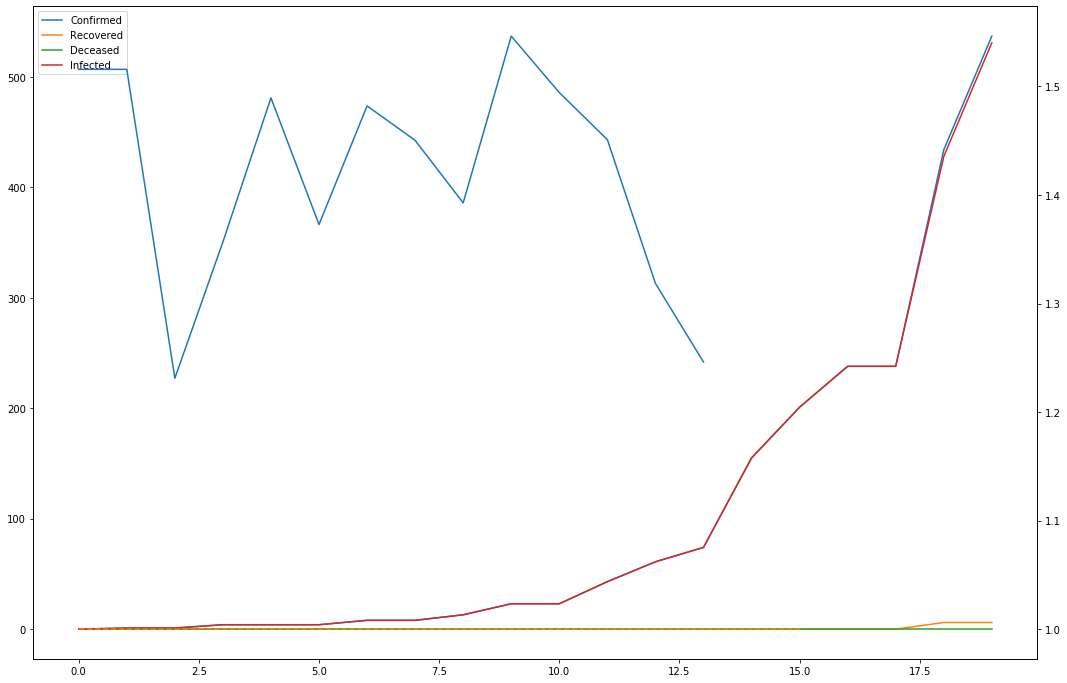

Days since first infected for Poland: 18


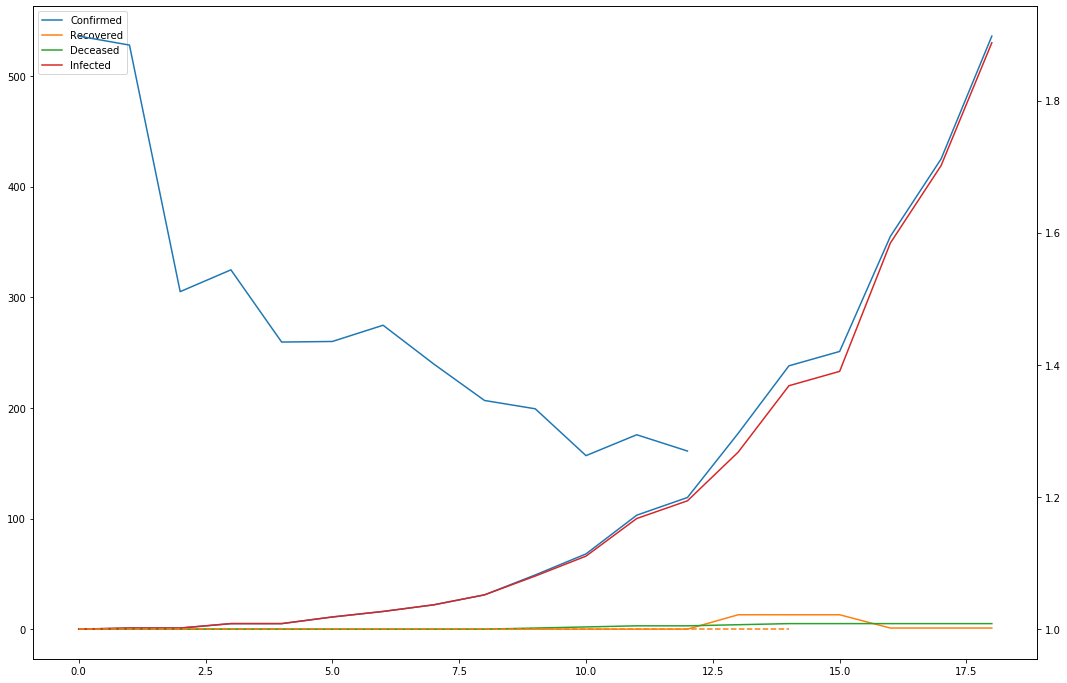

Days since first infected for Greece: 25


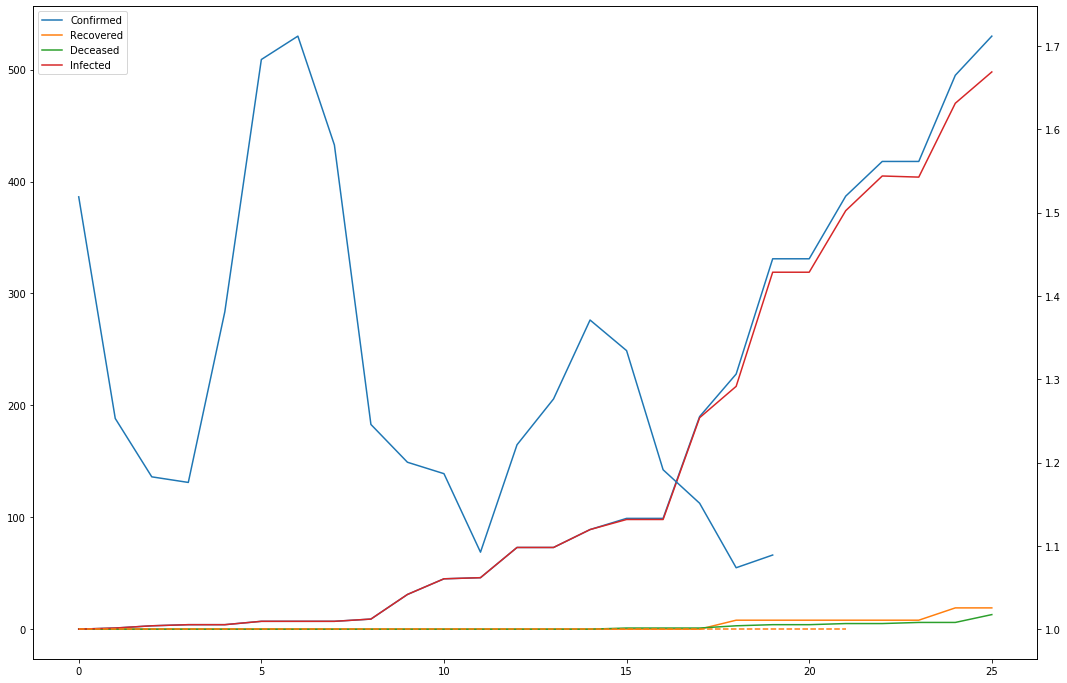

Days since first infected for Finland: 53


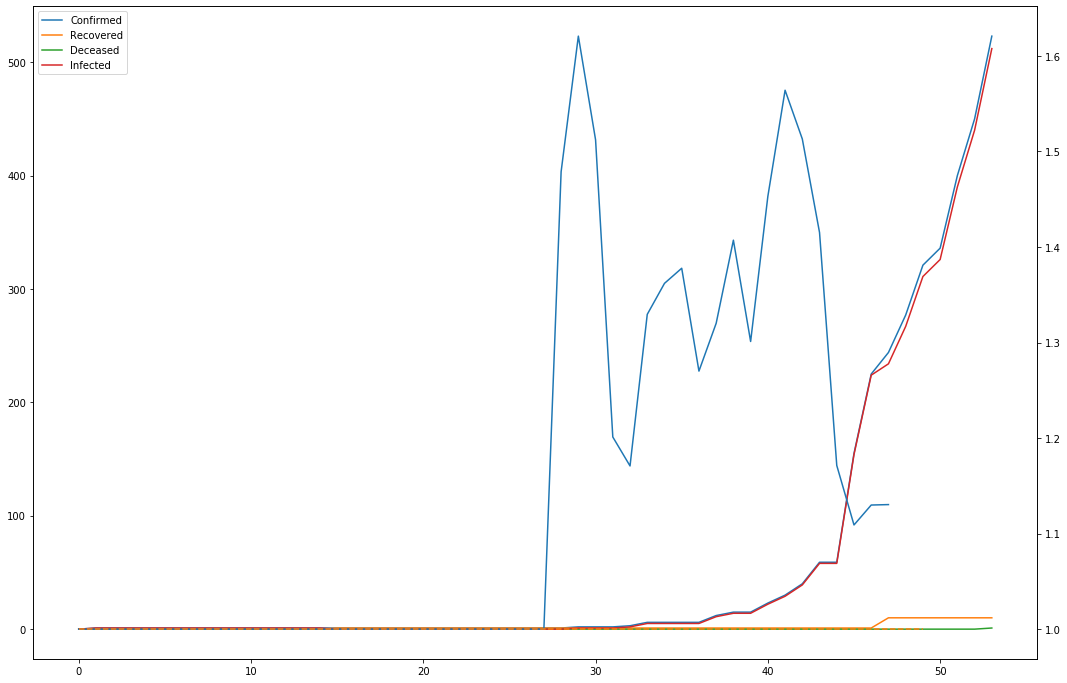

Days since first infected for Ecuador: 21


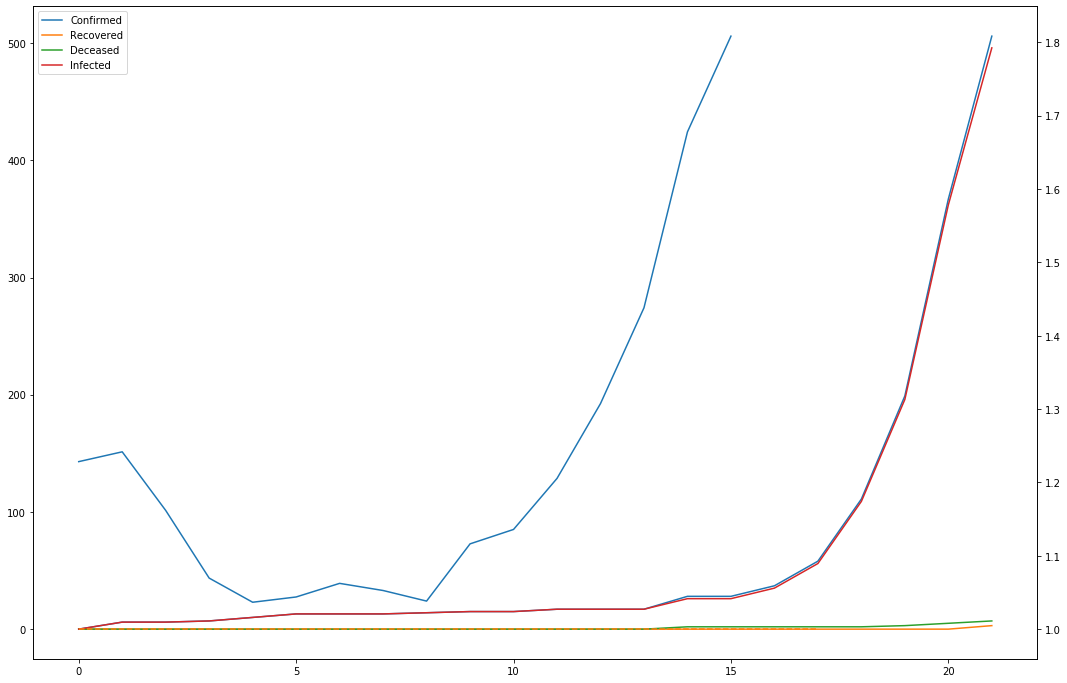

Days since first infected for Qatar: 22


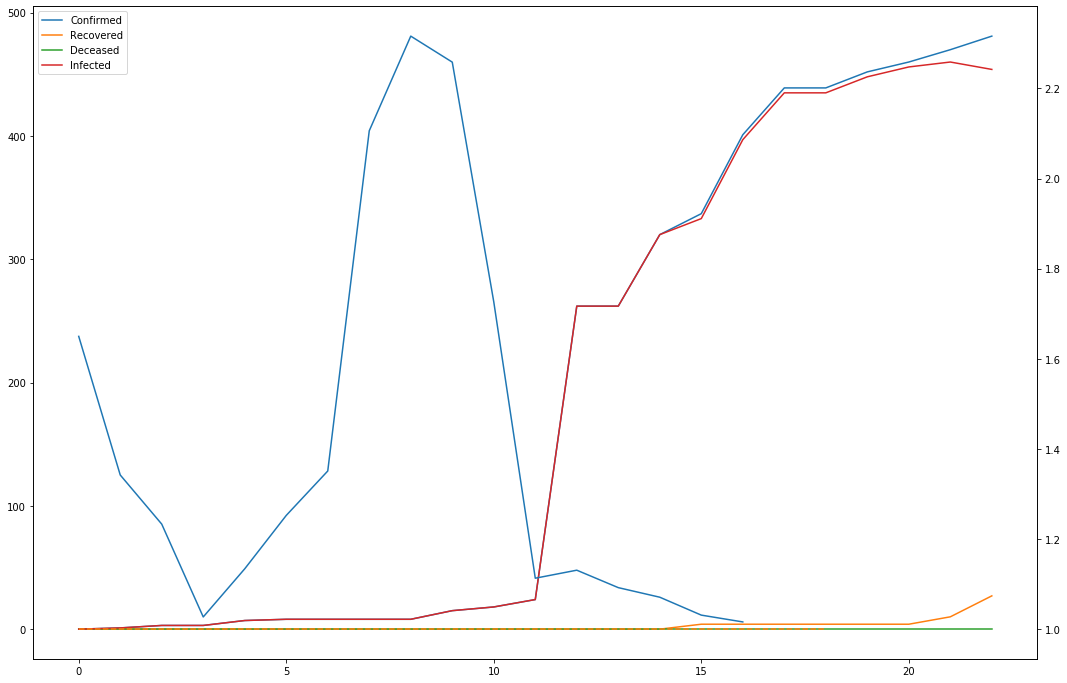

Days since first infected for Iceland: 23


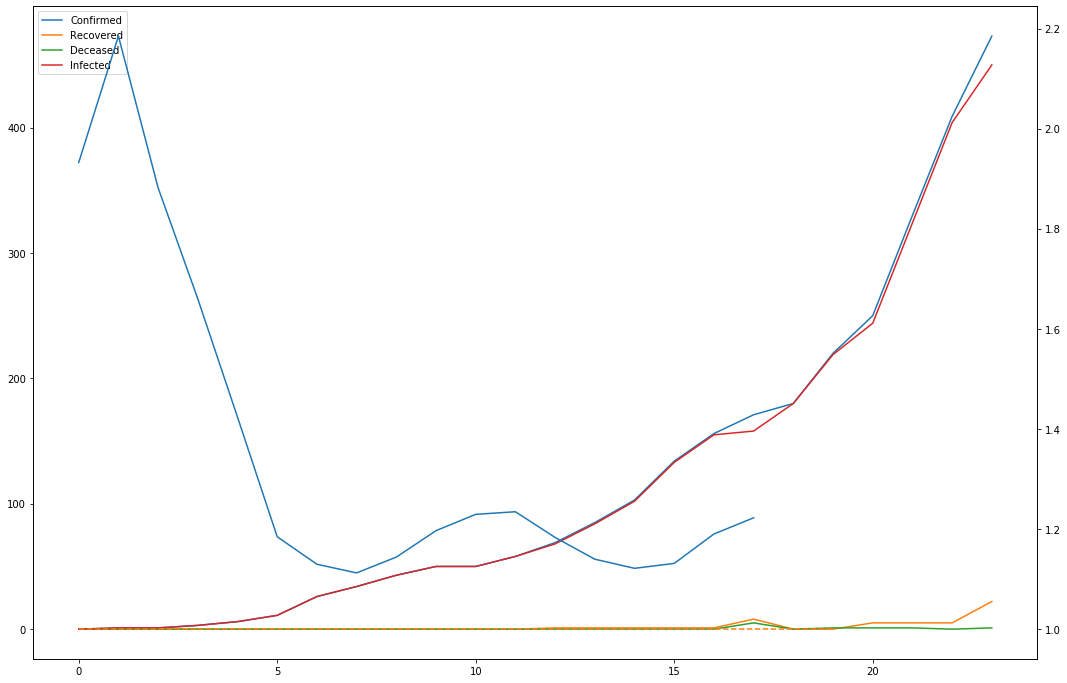

Days since first infected for Indonesia: 20


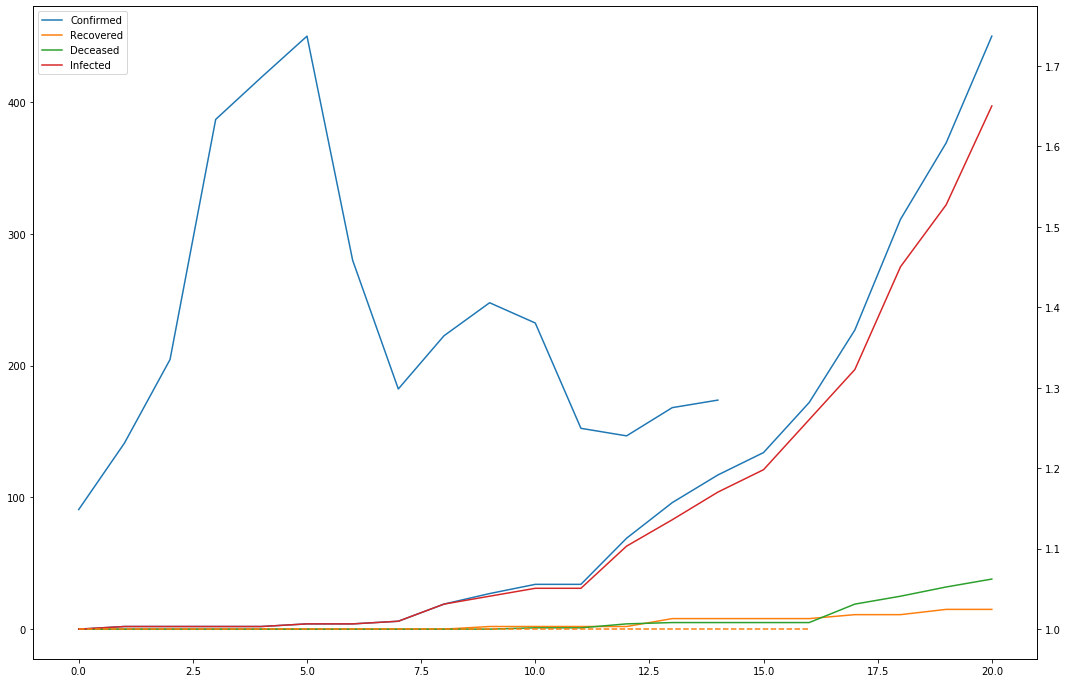

Days since first infected for Singapore: 59


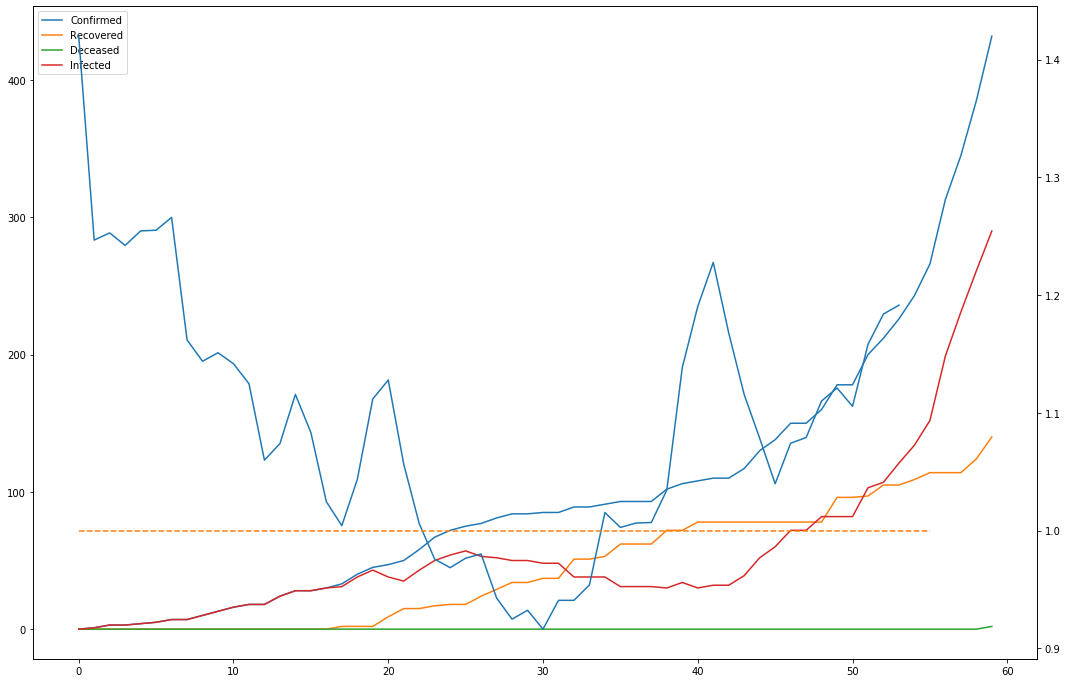

Days since first infected for Thailand: 60


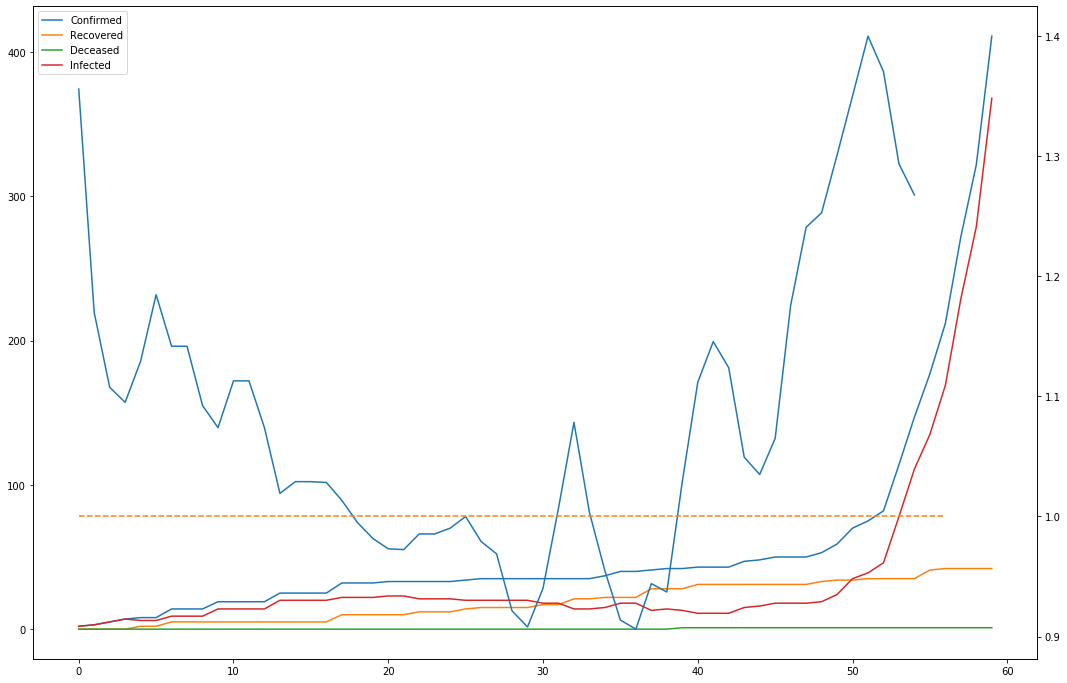

Days since first infected for Saudi Arabia: 20


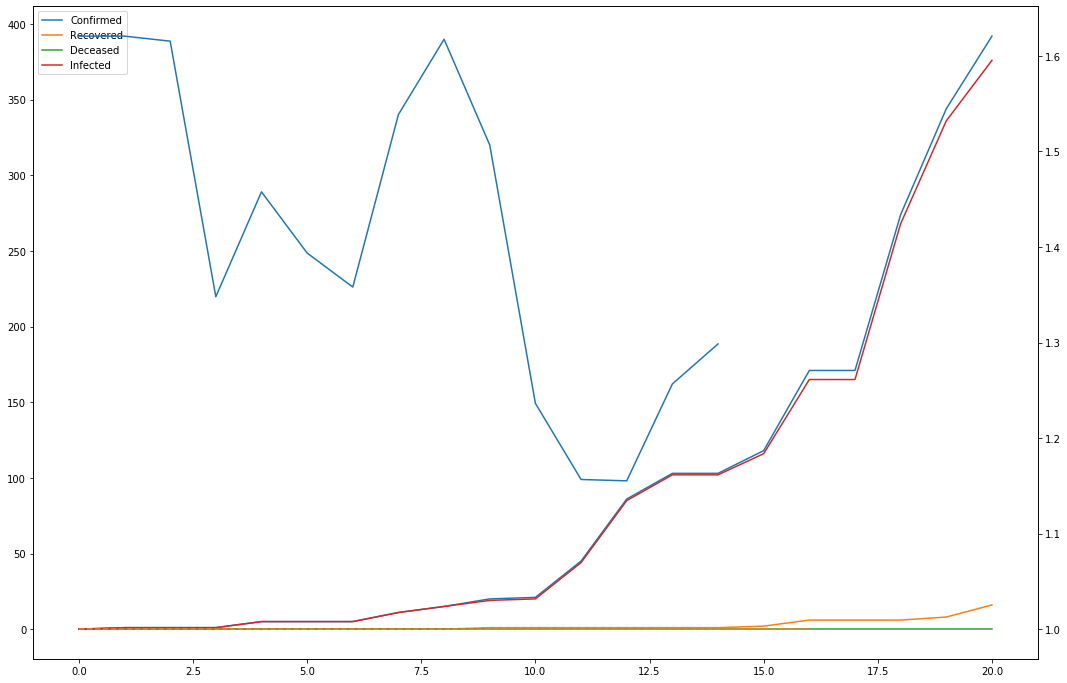

Days since first infected for Slovenia: 17


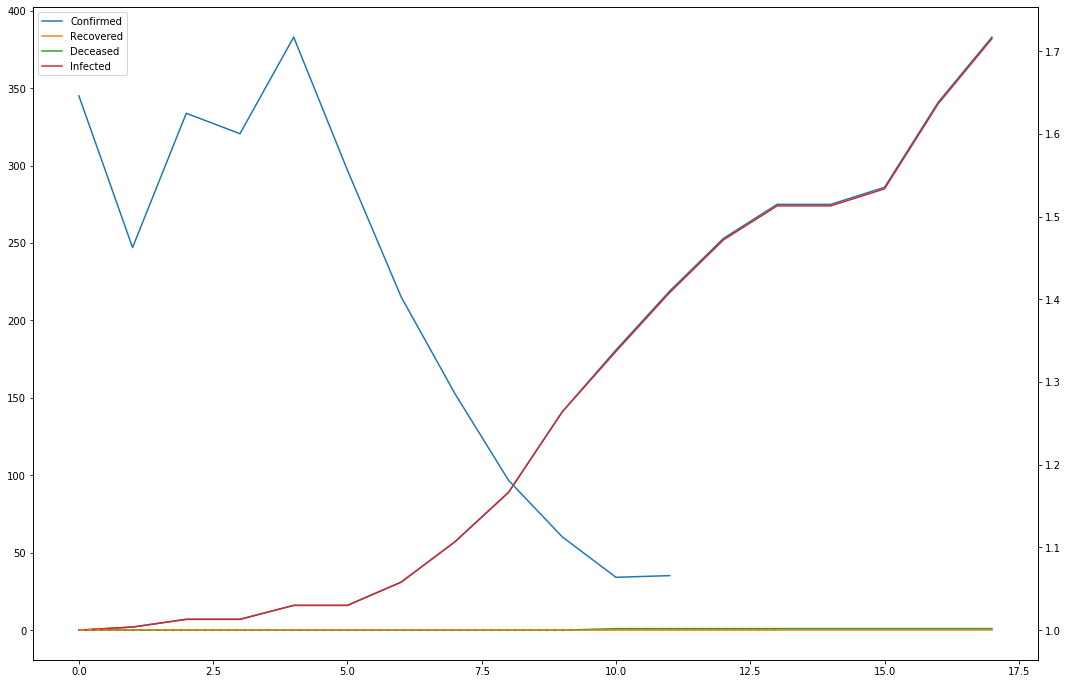

Days since first infected for Romania: 25


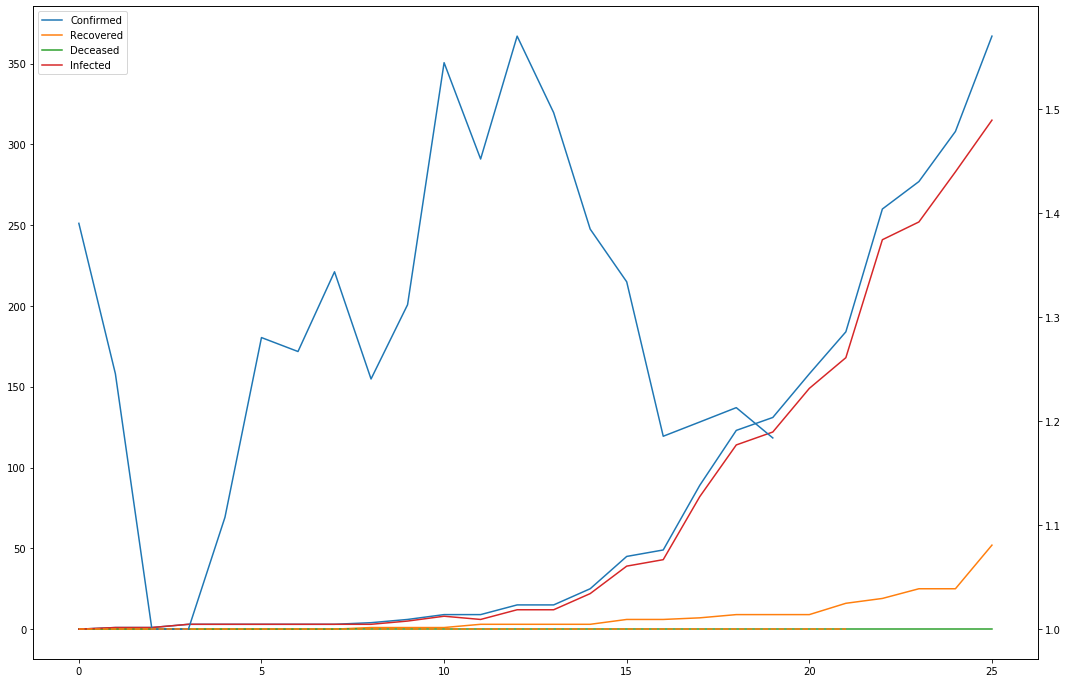

Days since first infected for India: 52


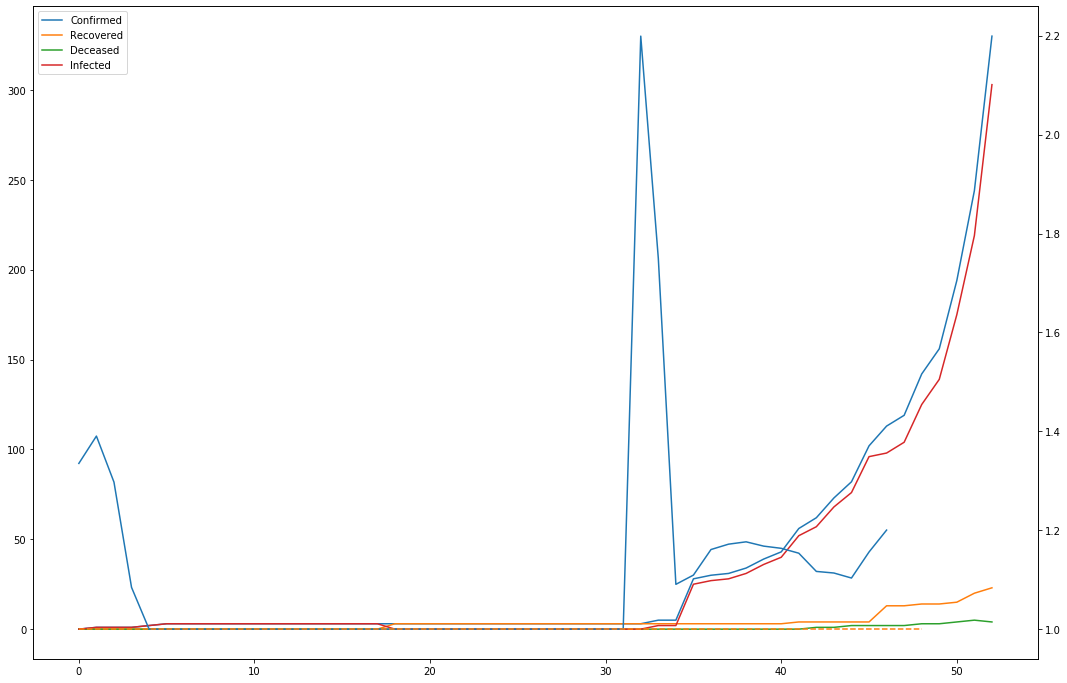

Days since first infected for Peru: 16


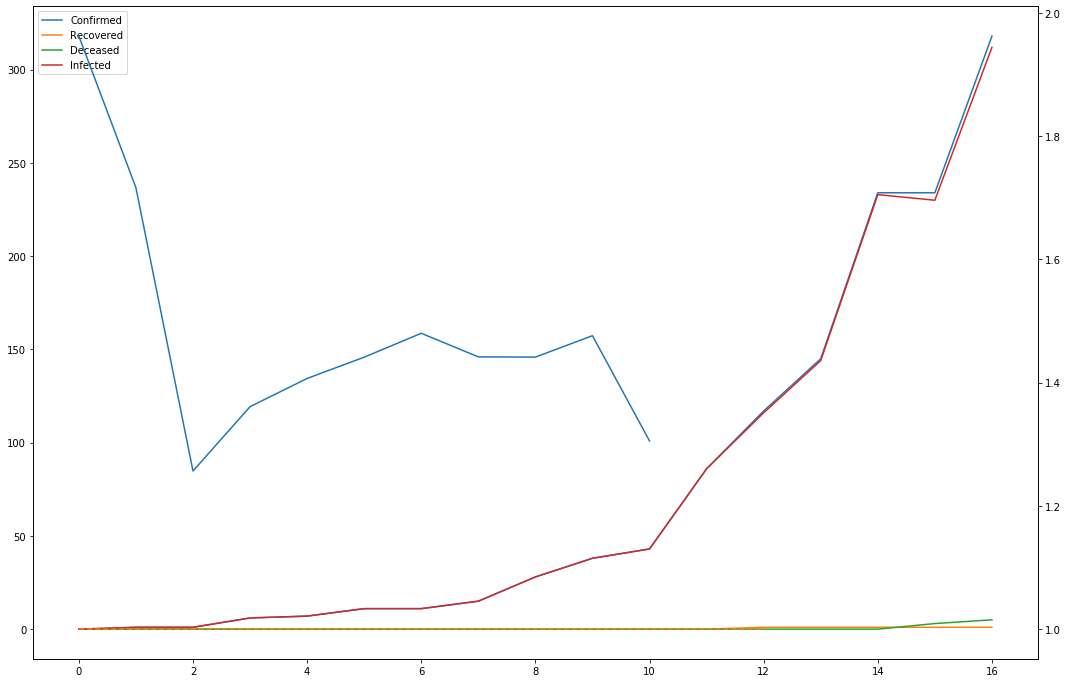

Days since first infected for Philippines: 52


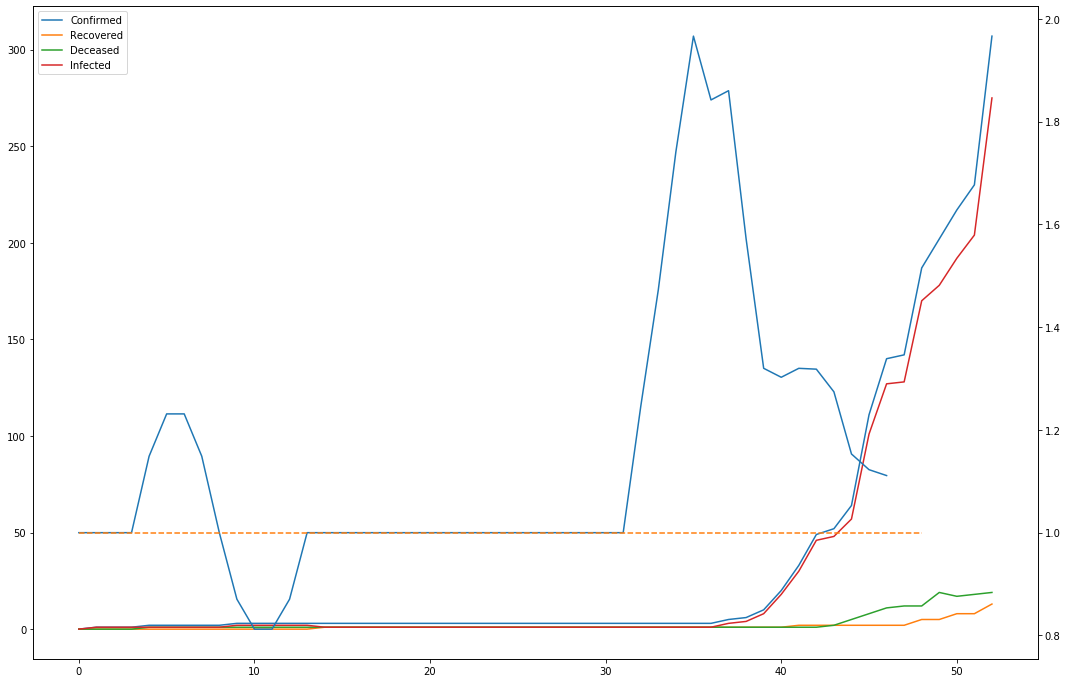

Days since first infected for Estonia: 24


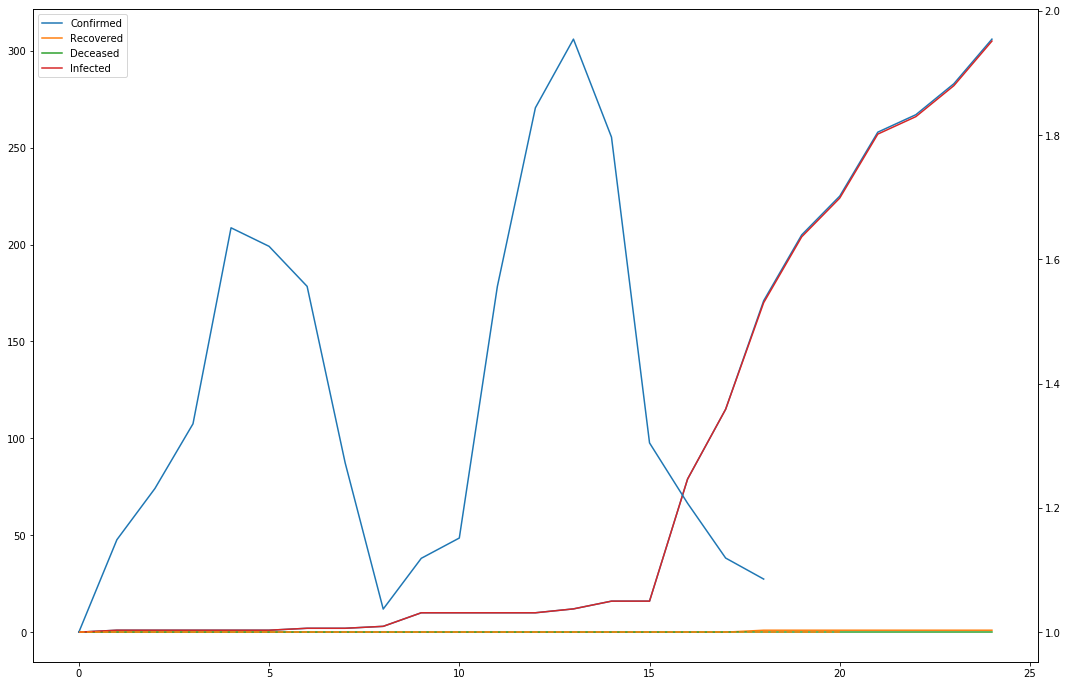

Days since first infected for Russia: 51


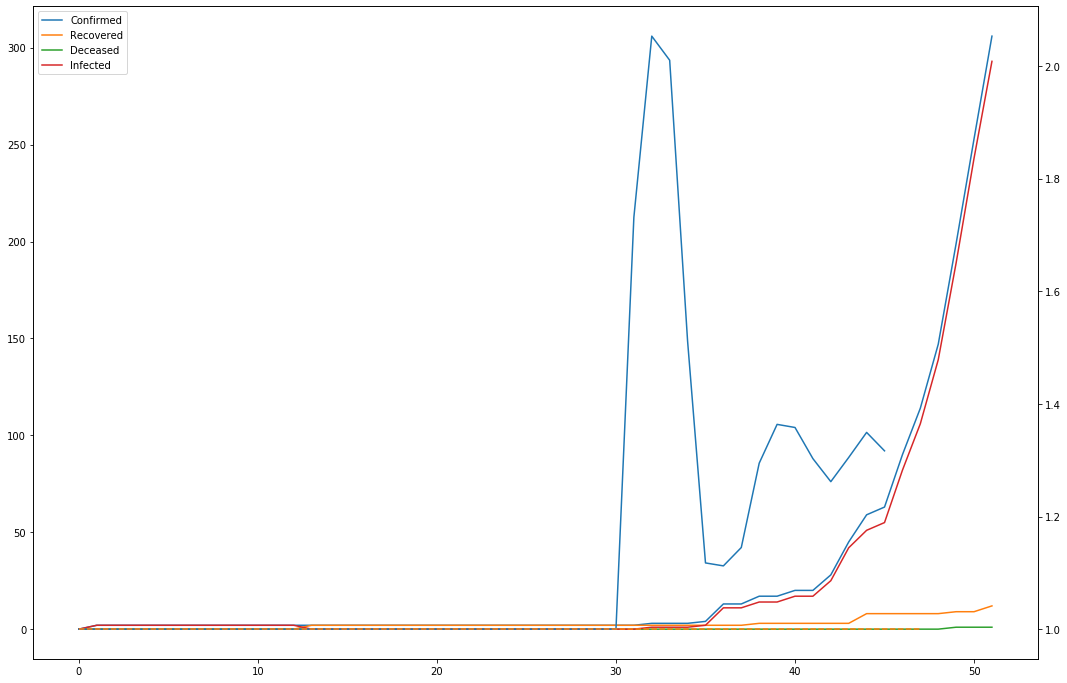

Days since first infected for Bahrain: 27


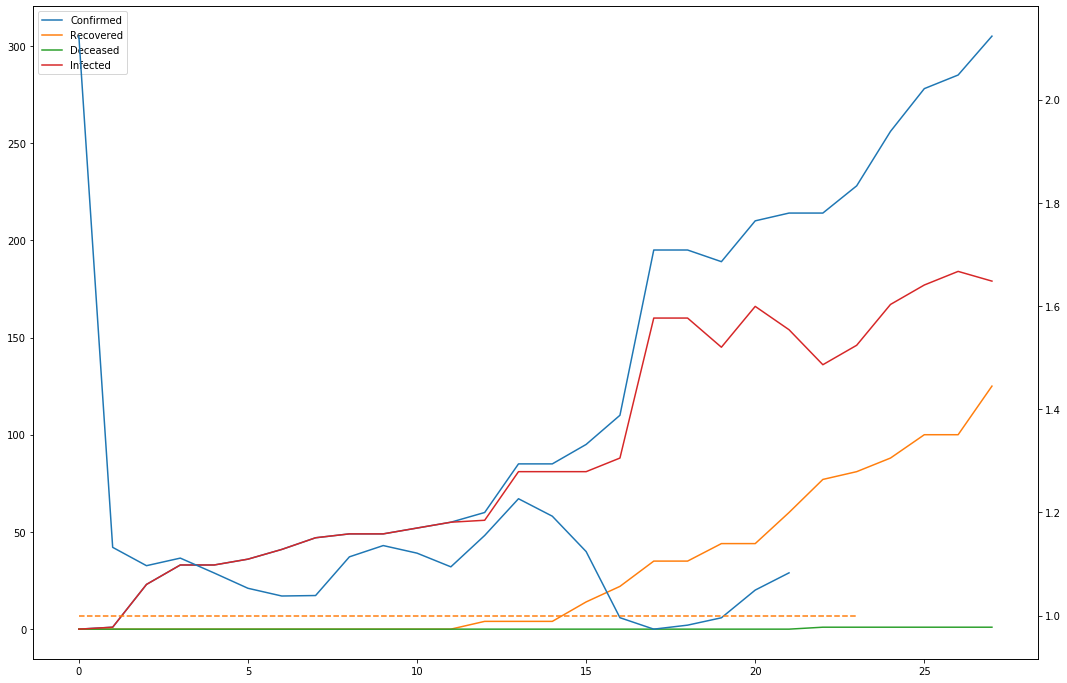

Days since first infected for Egypt: 37


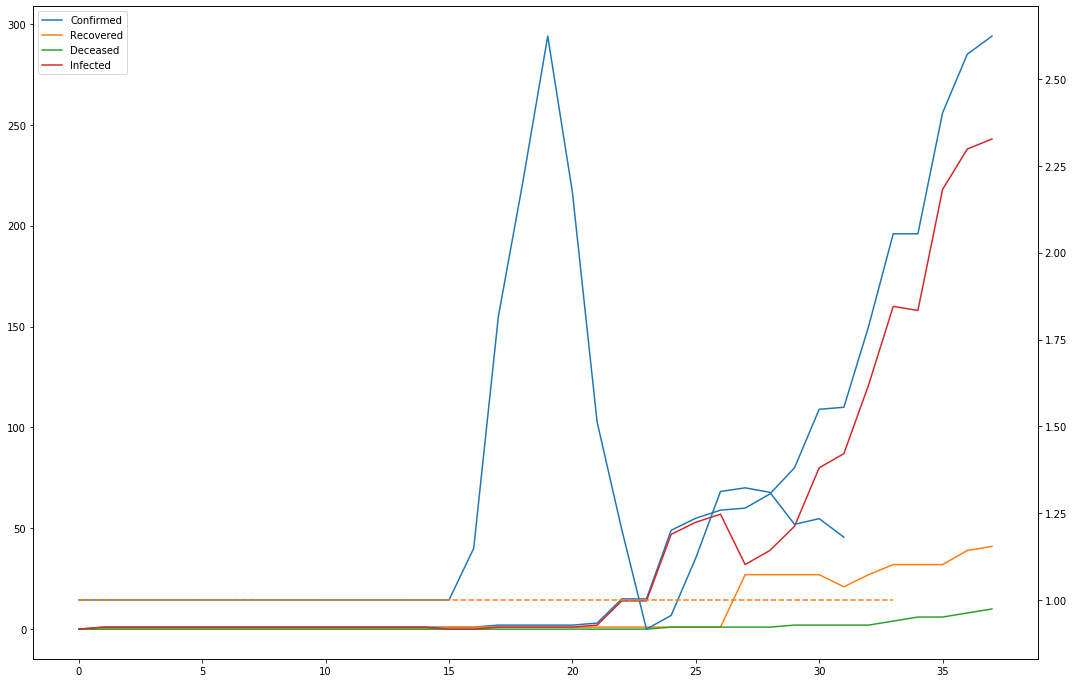

Days since first infected for South Africa: 17


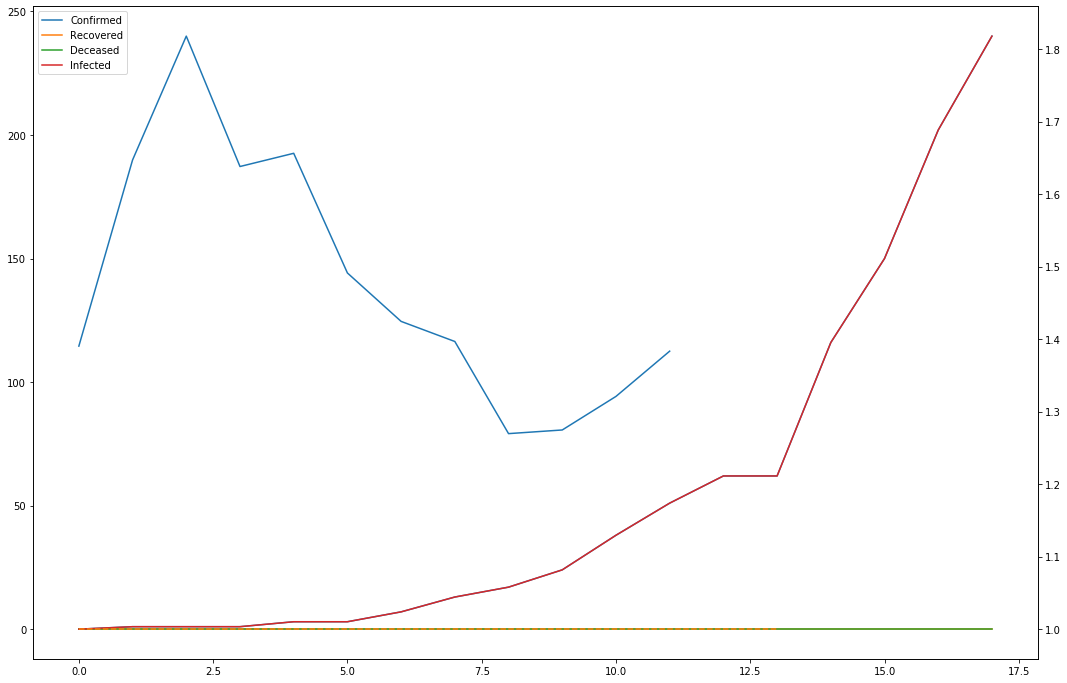

Days since first infected for Iraq: 27


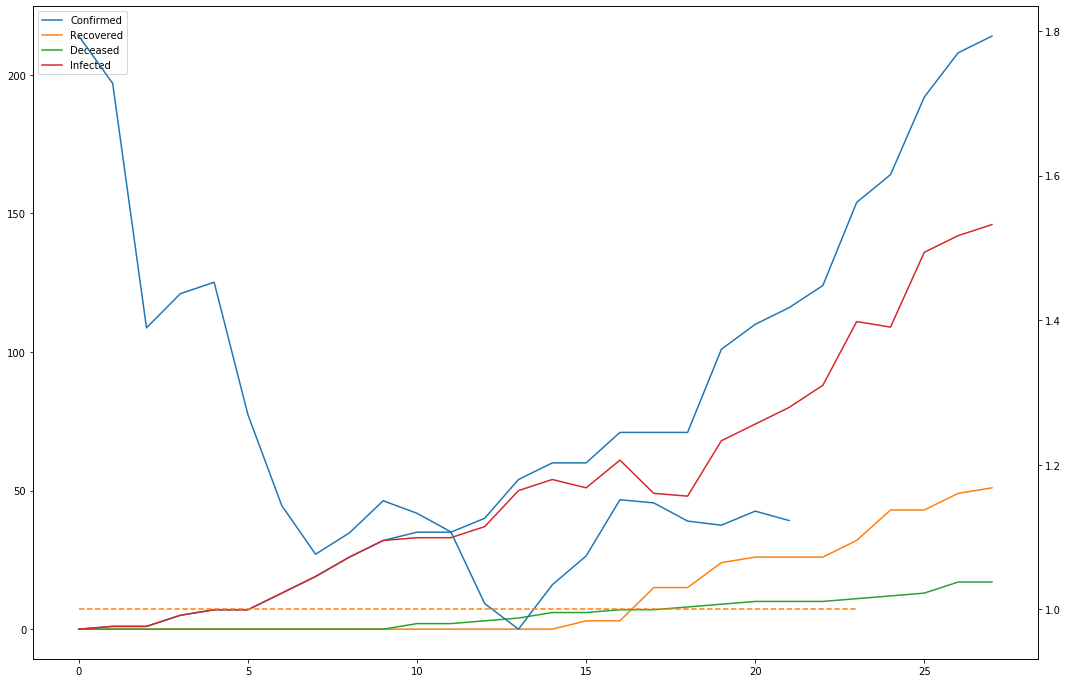

Days since first infected for Croatia: 26


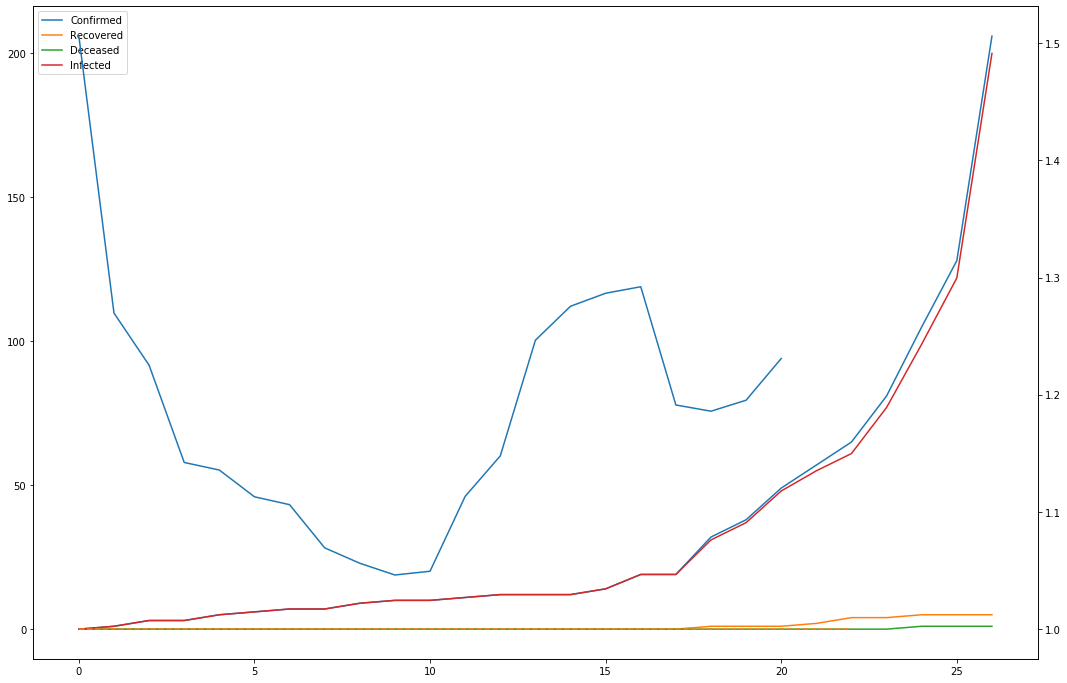

Days since first infected for Mexico: 23


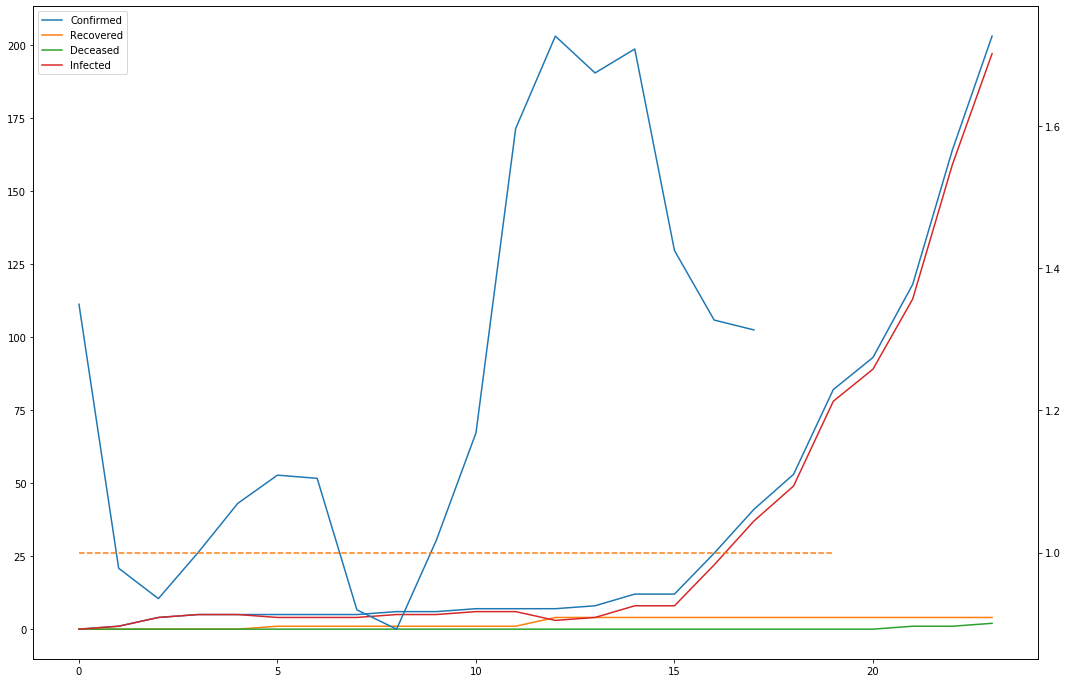

Days since first infected for Panama: 12


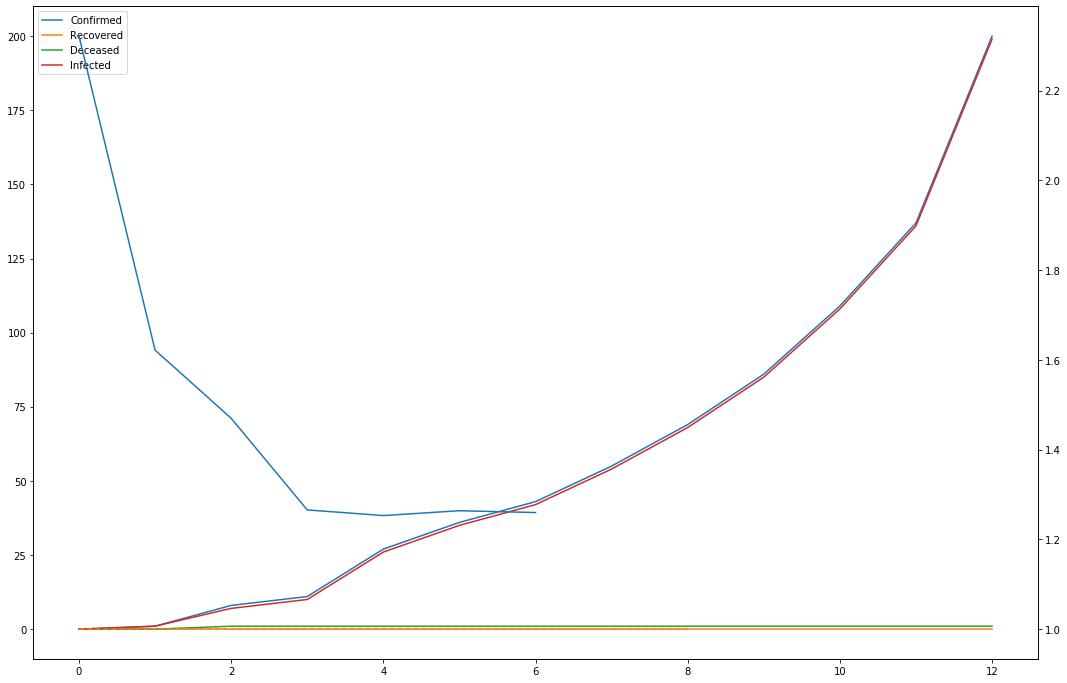

Days since first infected for Colombia: 16


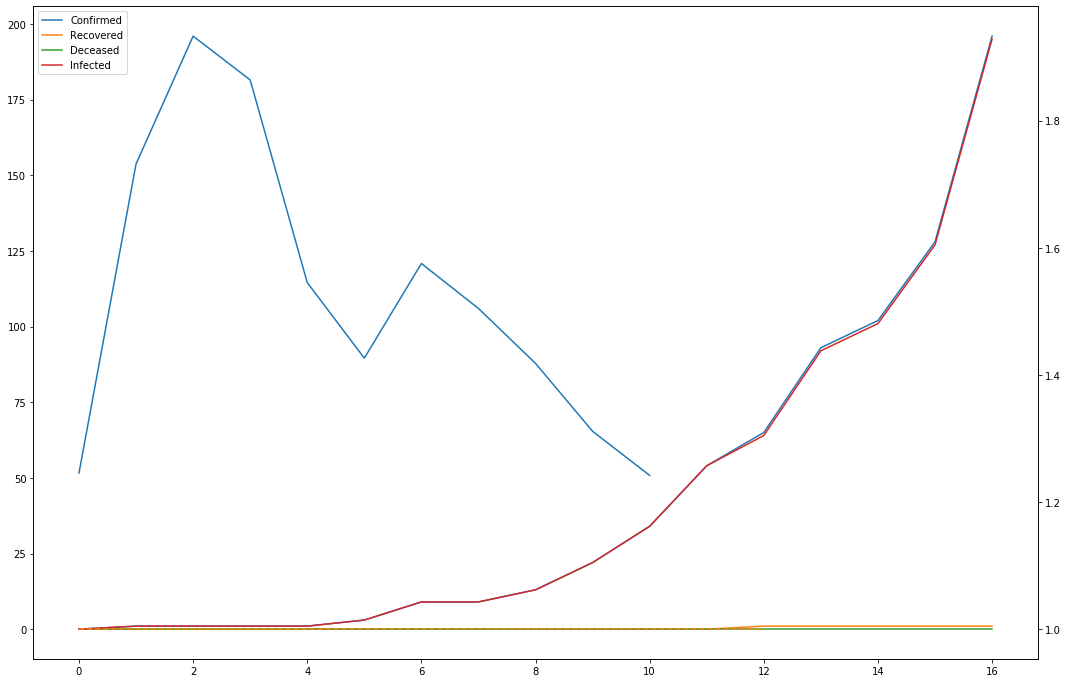

Days since first infected for Lebanon: 30


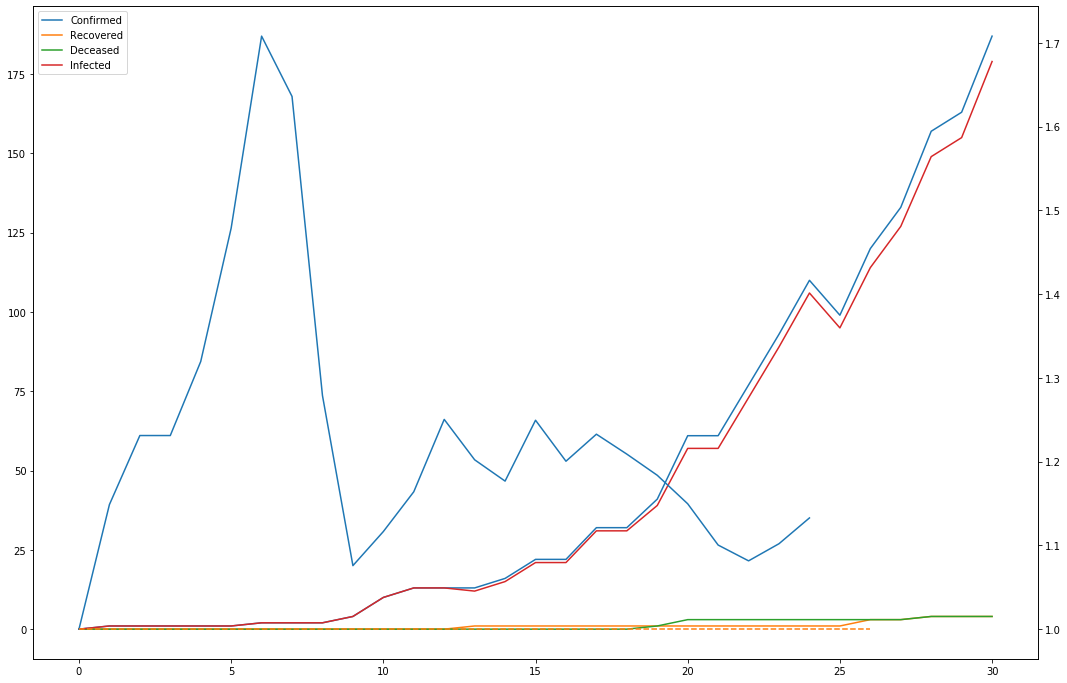

Days since first infected for Slovakia: 16


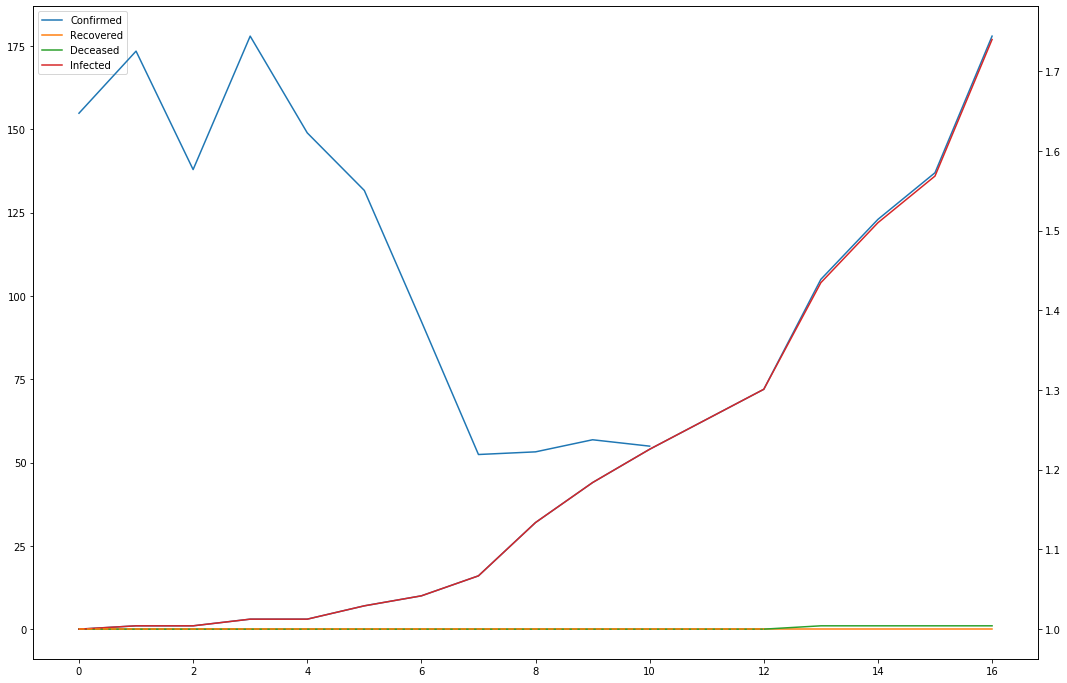

Days since first infected for Kuwait: 27


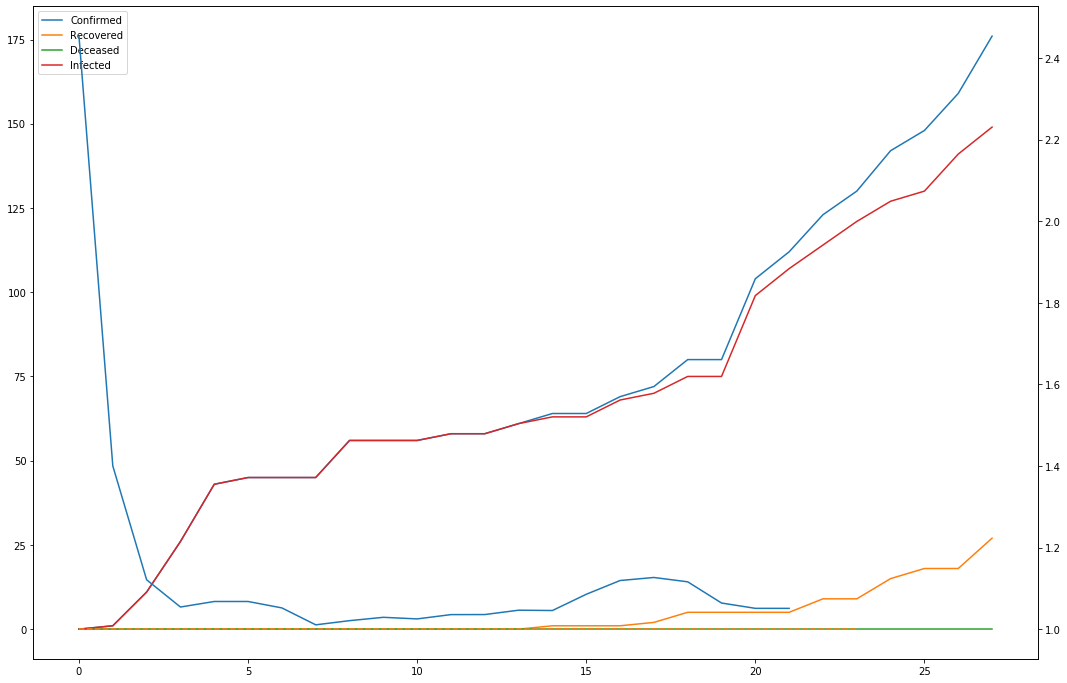

Days since first infected for Serbia: 16


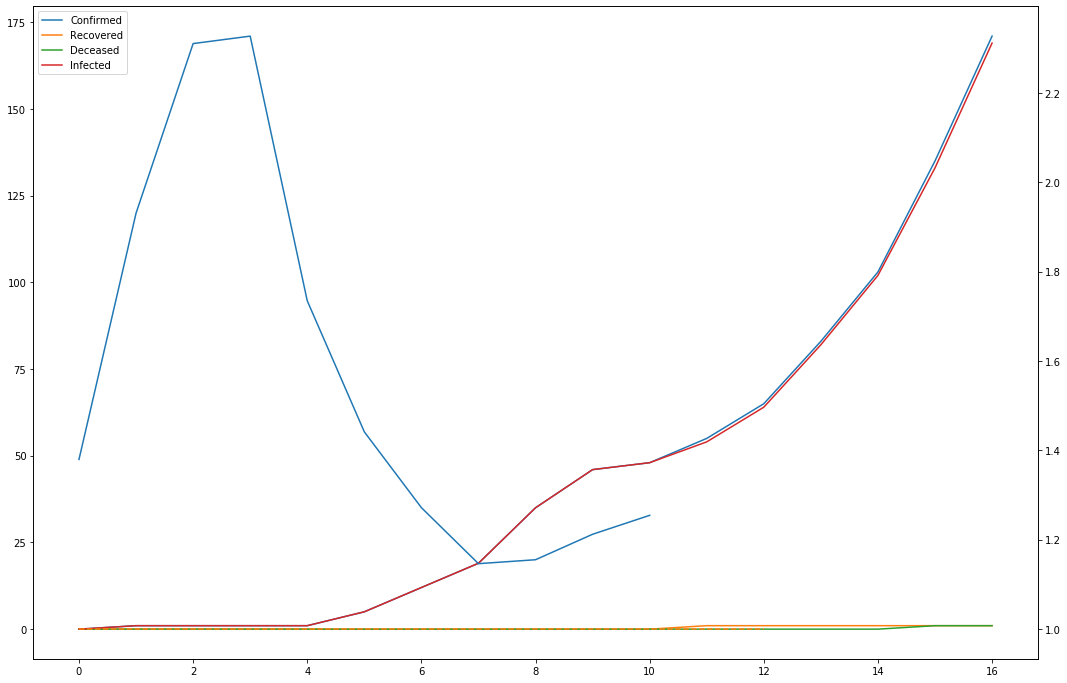

Days since first infected for Bulgaria: 14


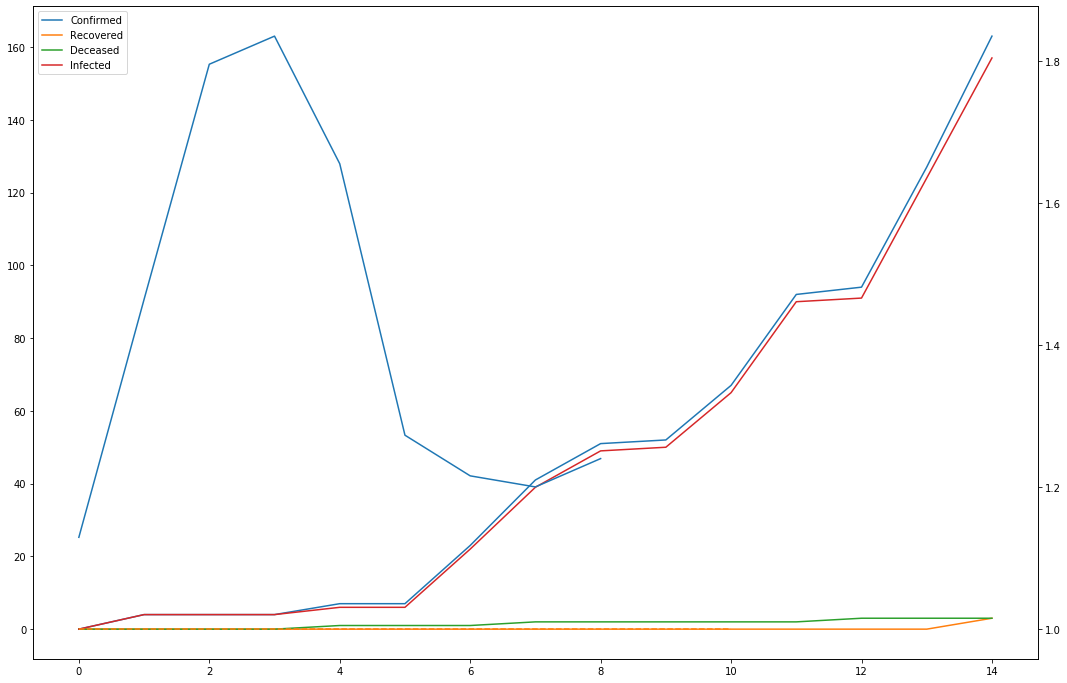

Days since first infected for Armenia: 21


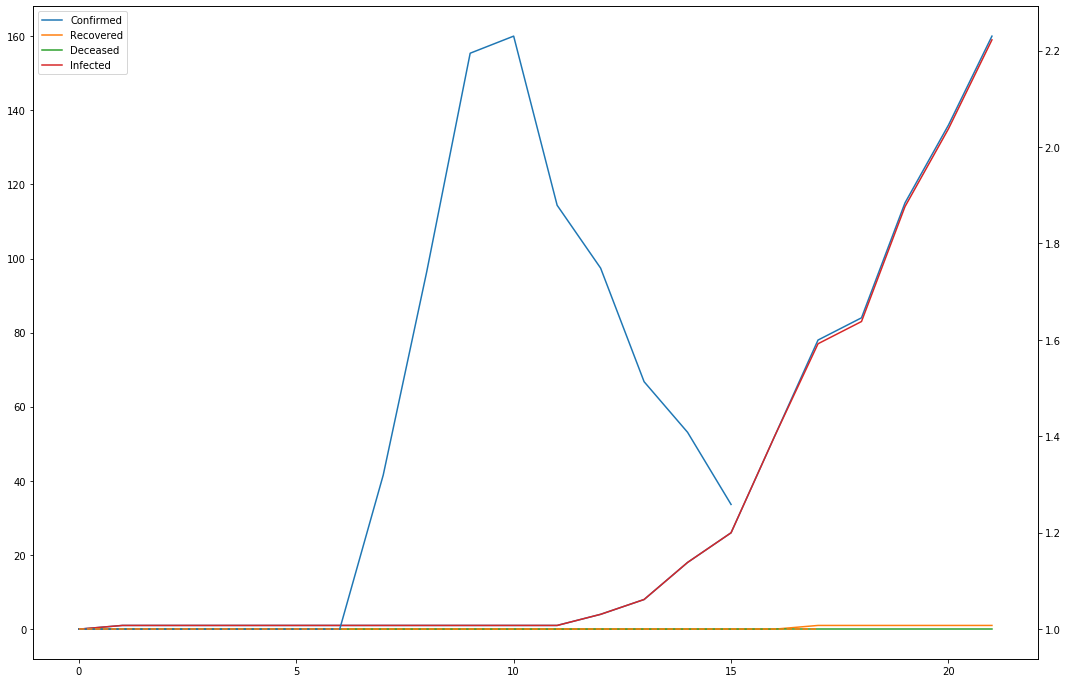

Days since first infected for Argentina: 19


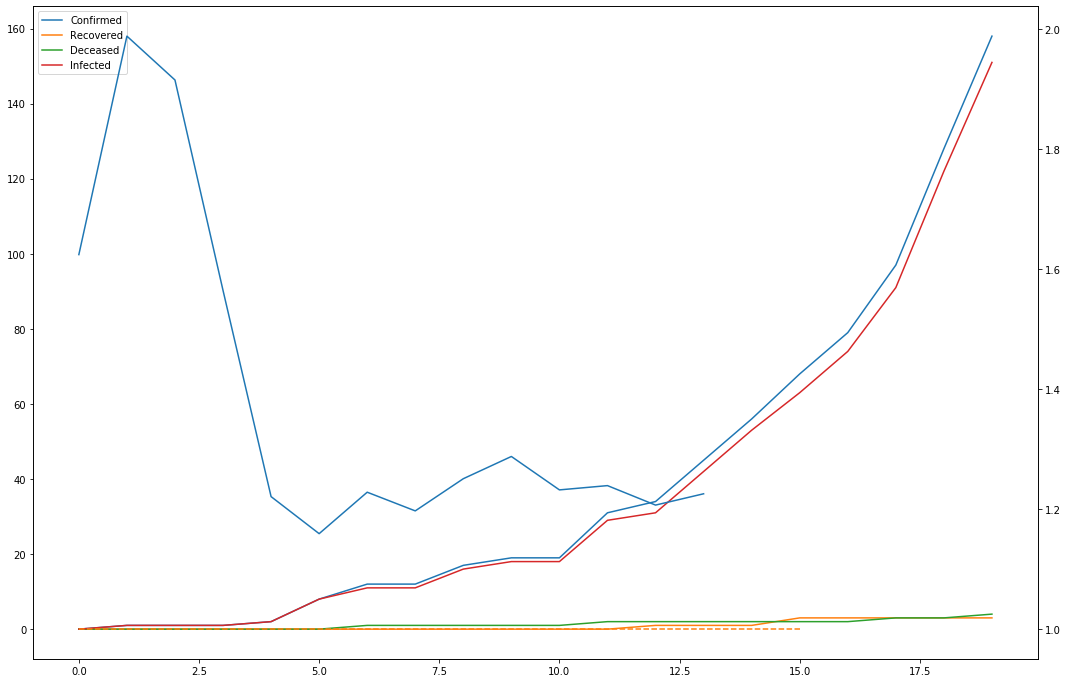

Days since first infected for Taiwan*: 60


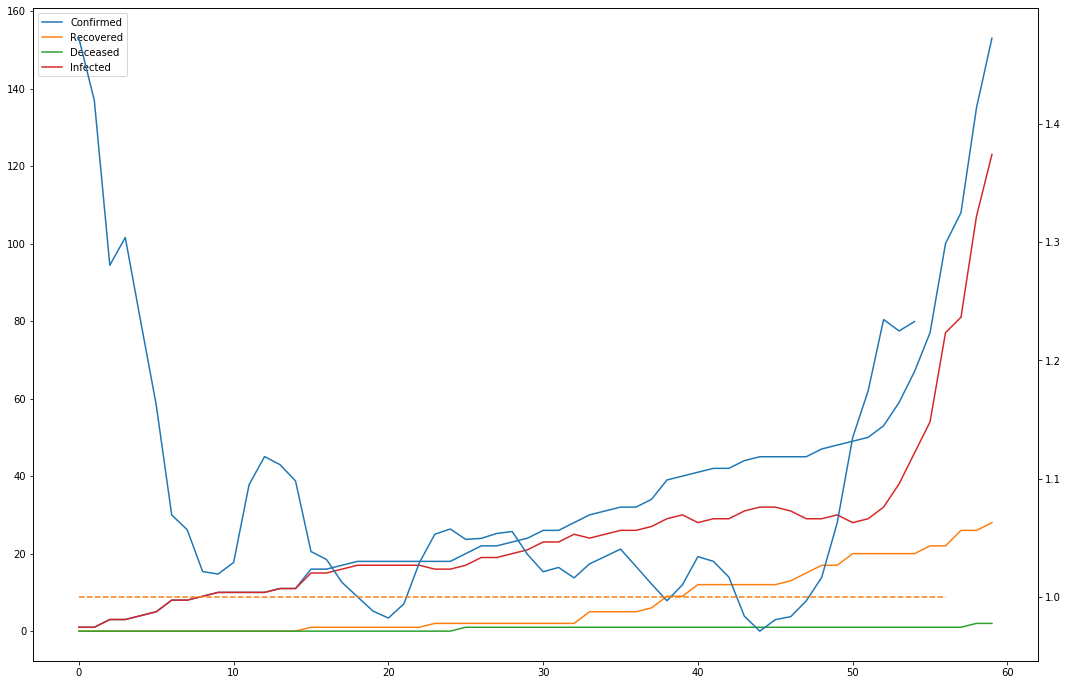

Days since first infected for United Arab Emirates: 53


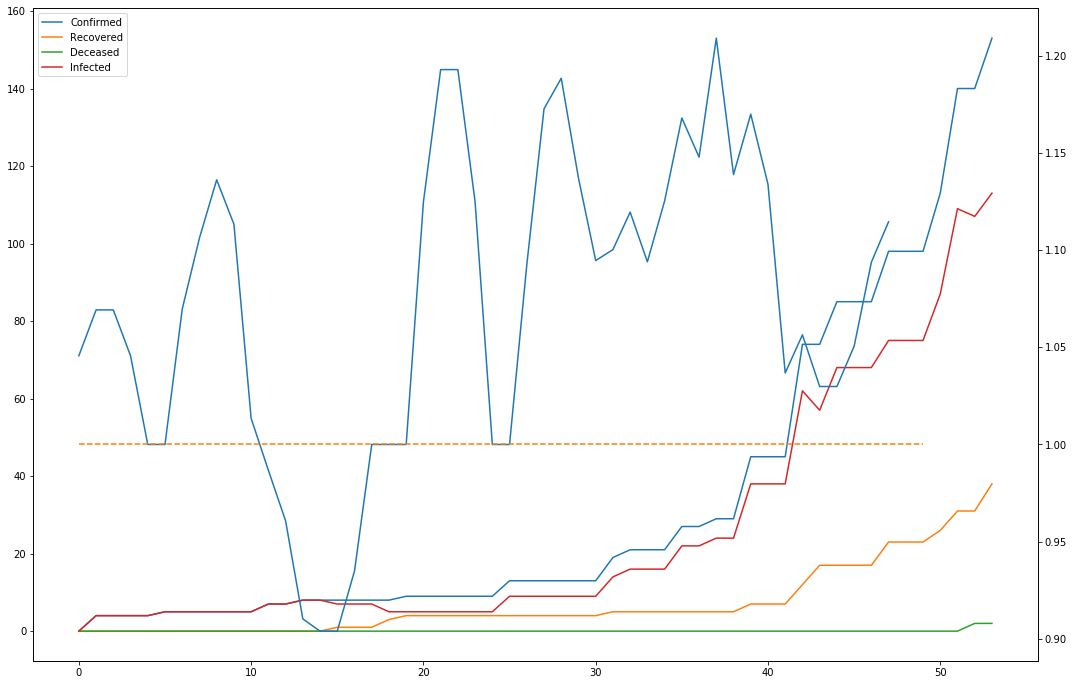

Days since first infected for San Marino: 24


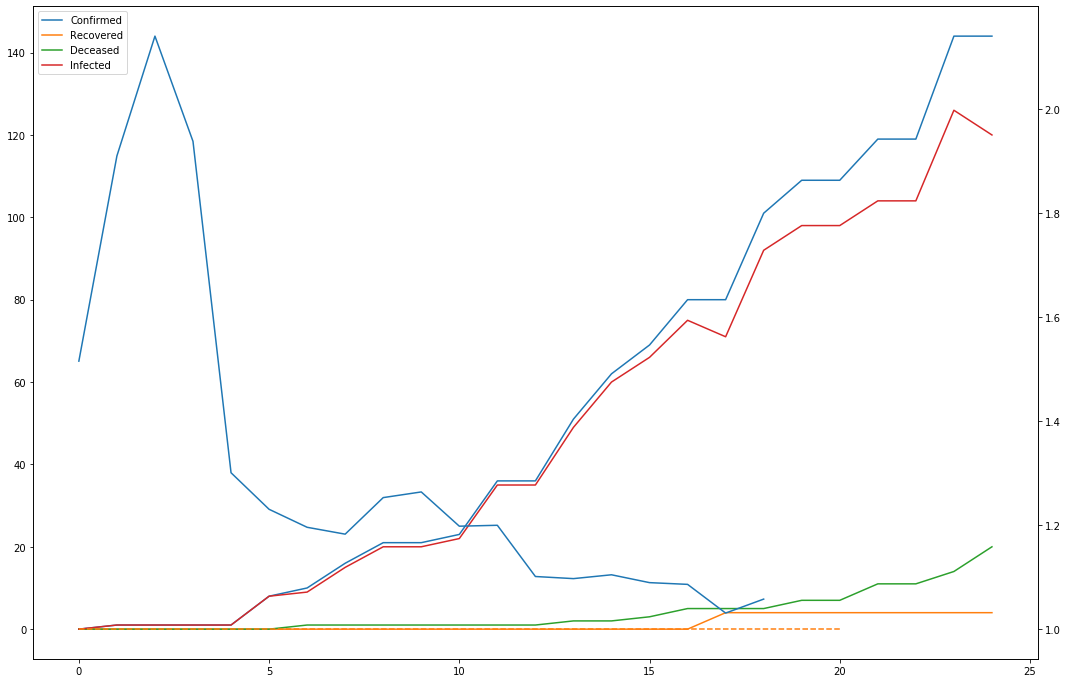

Days since first infected for Algeria: 26


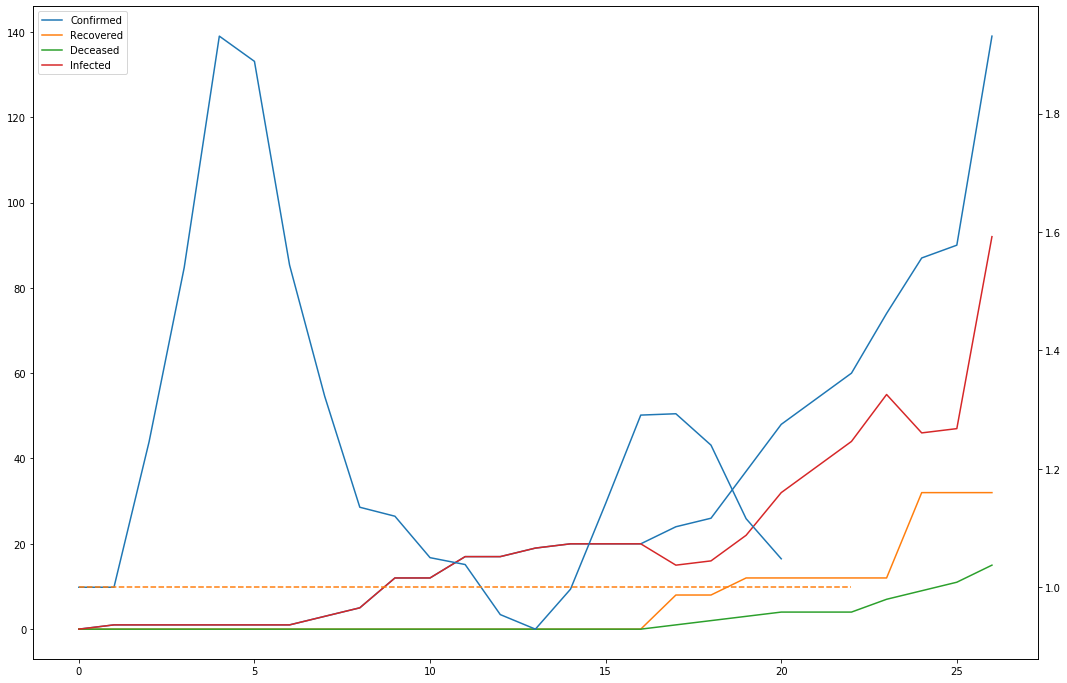

Days since first infected for Latvia: 20


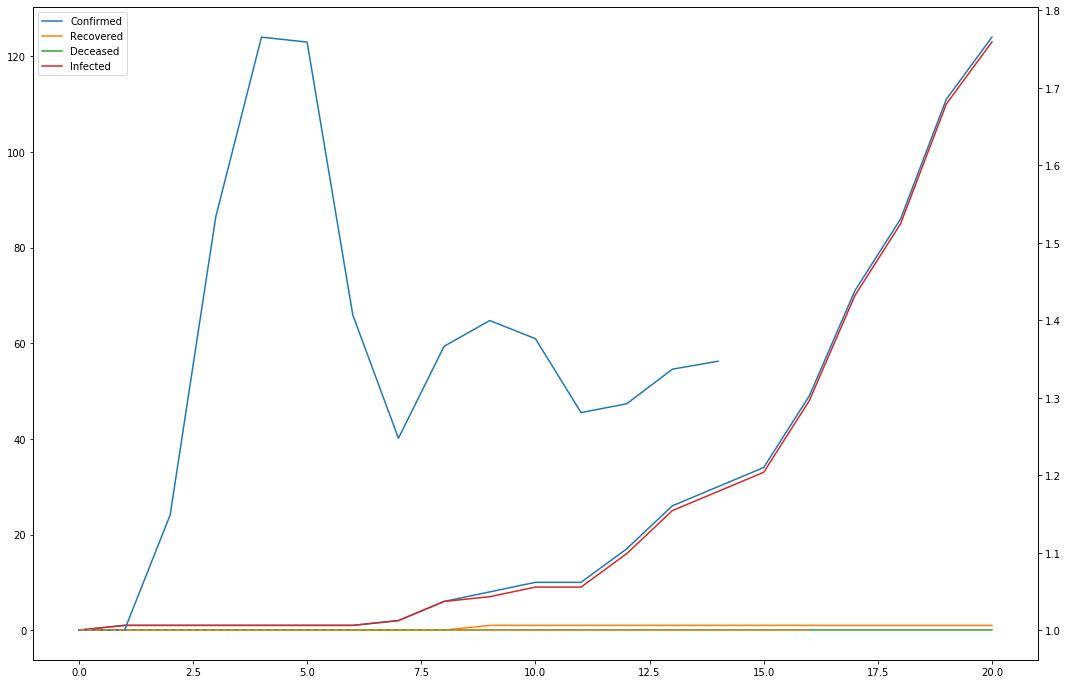

Days since first infected for Costa Rica: 16


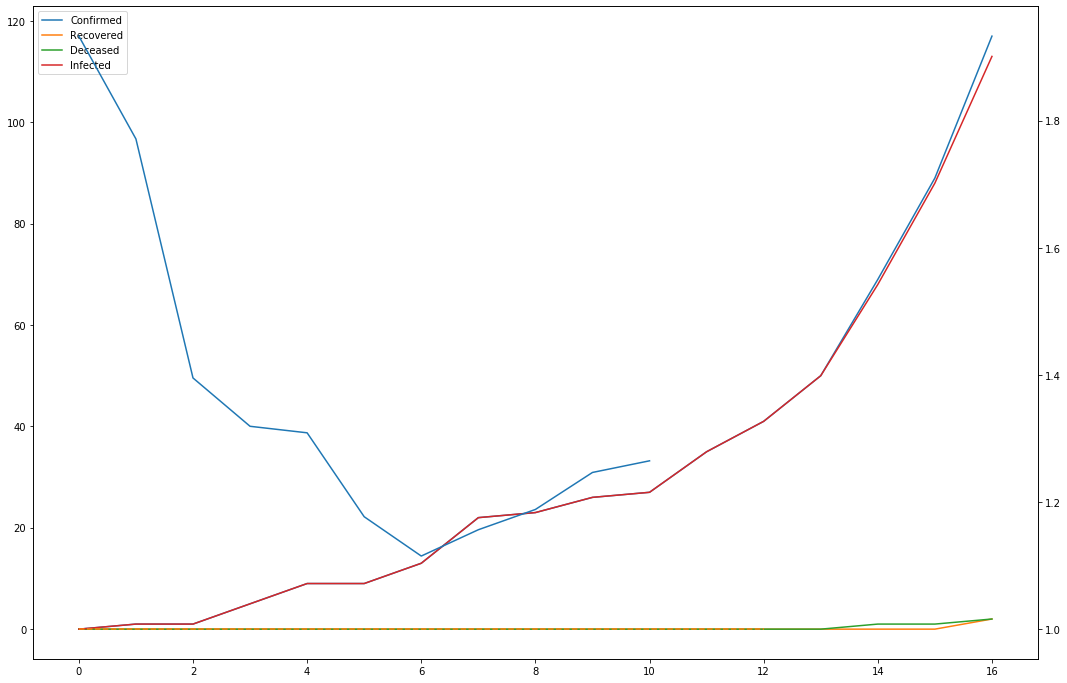

Days since first infected for Dominican Republic: 21


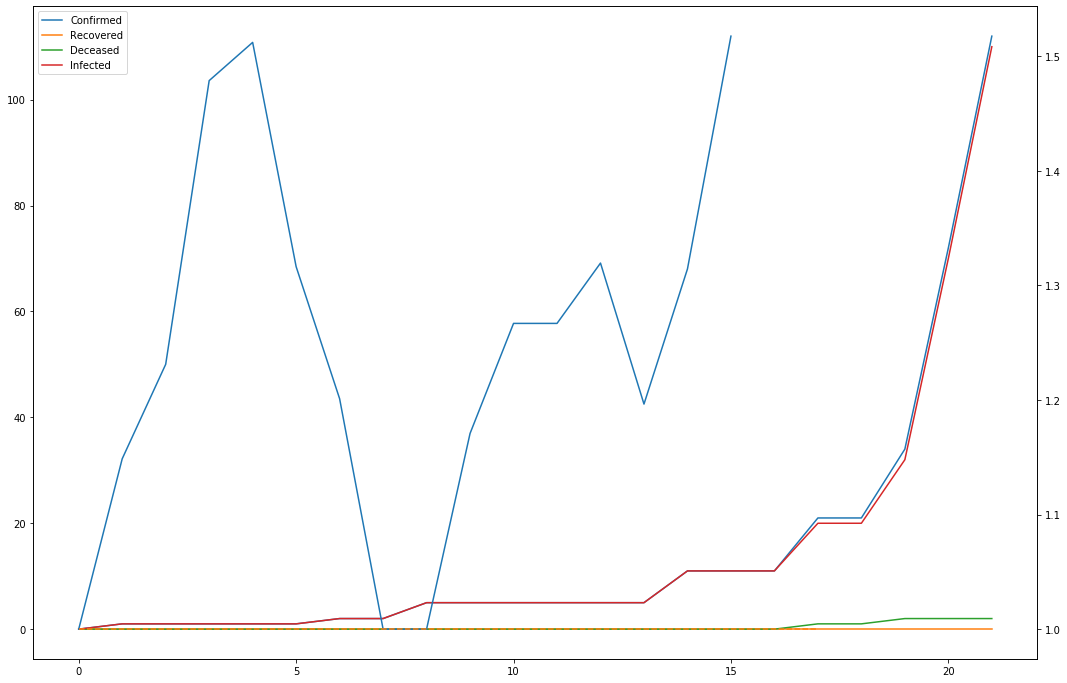

Days since first infected for Uruguay: 8


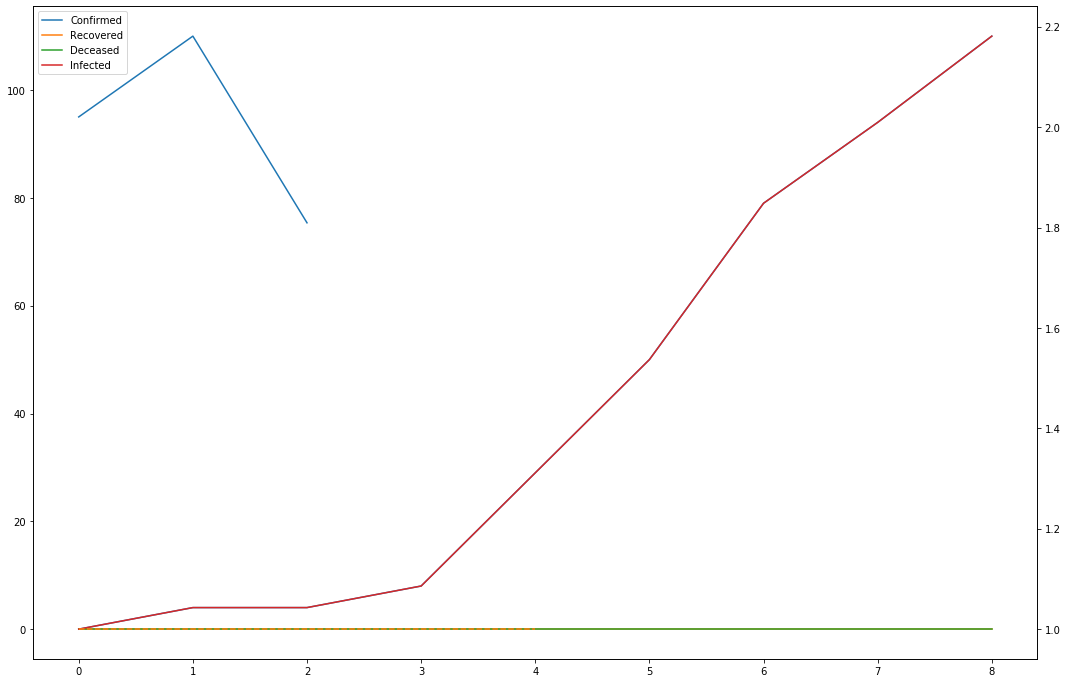

Days since first infected for Hungary: 18


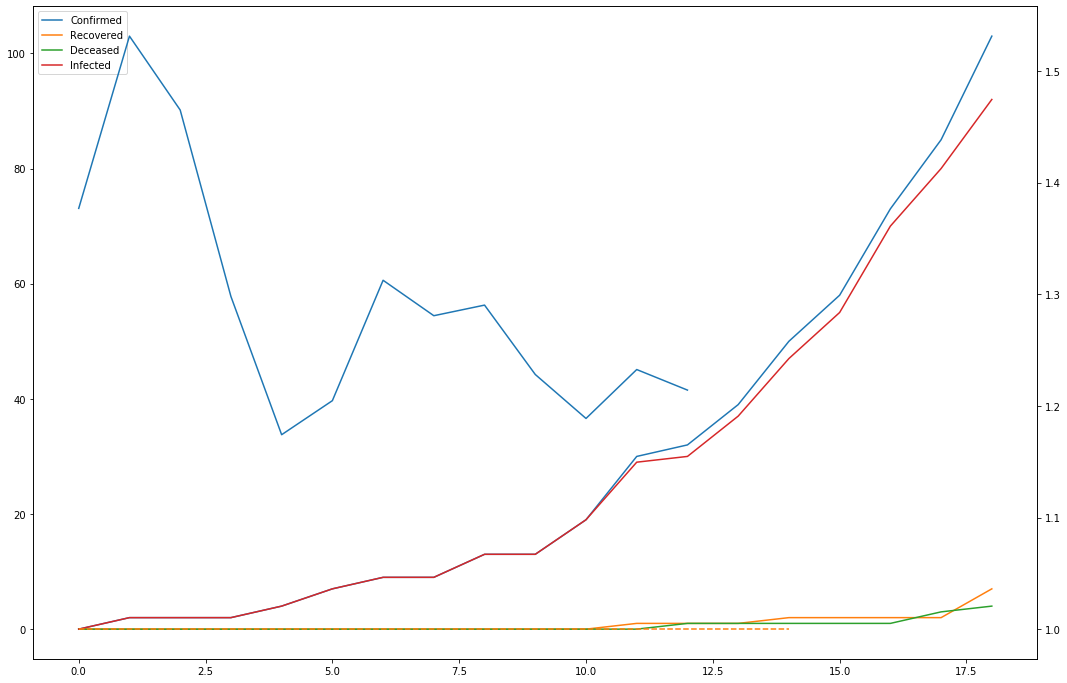

Days since first infected for Morocco: 20


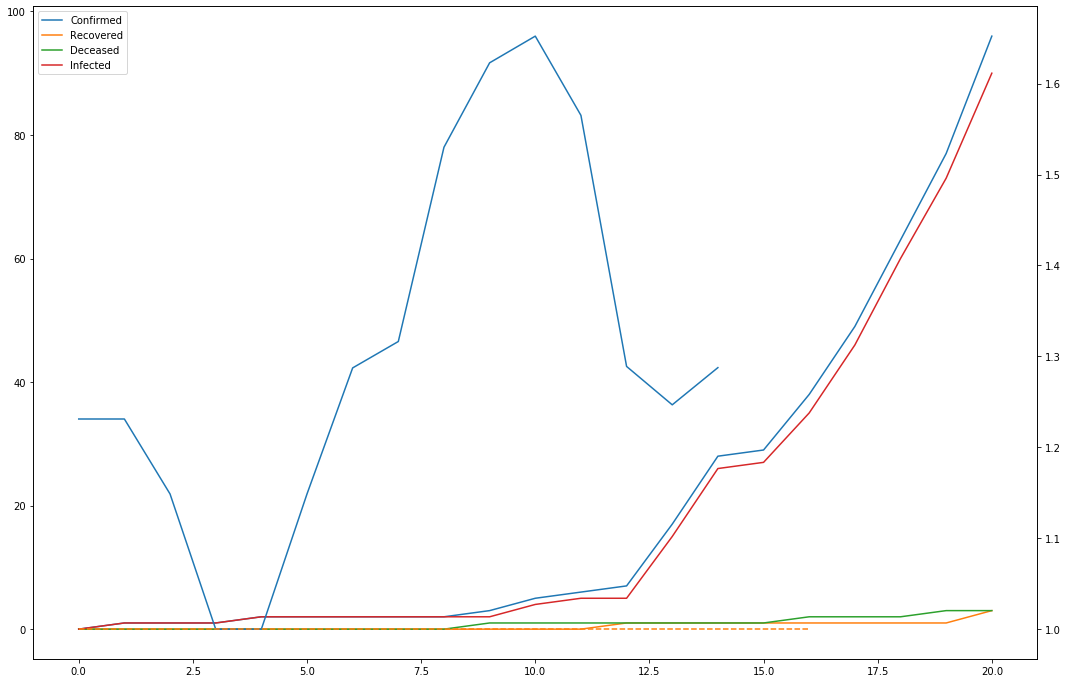

Days since first infected for Vietnam: 59


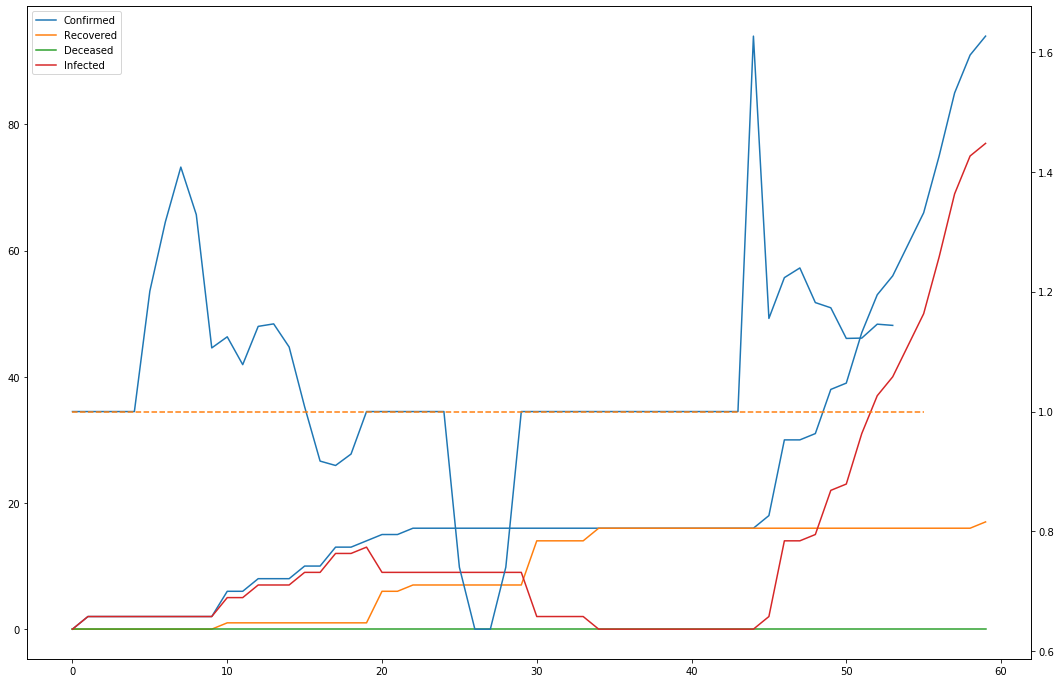

Days since first infected for Bosnia and Herzegovina: 17


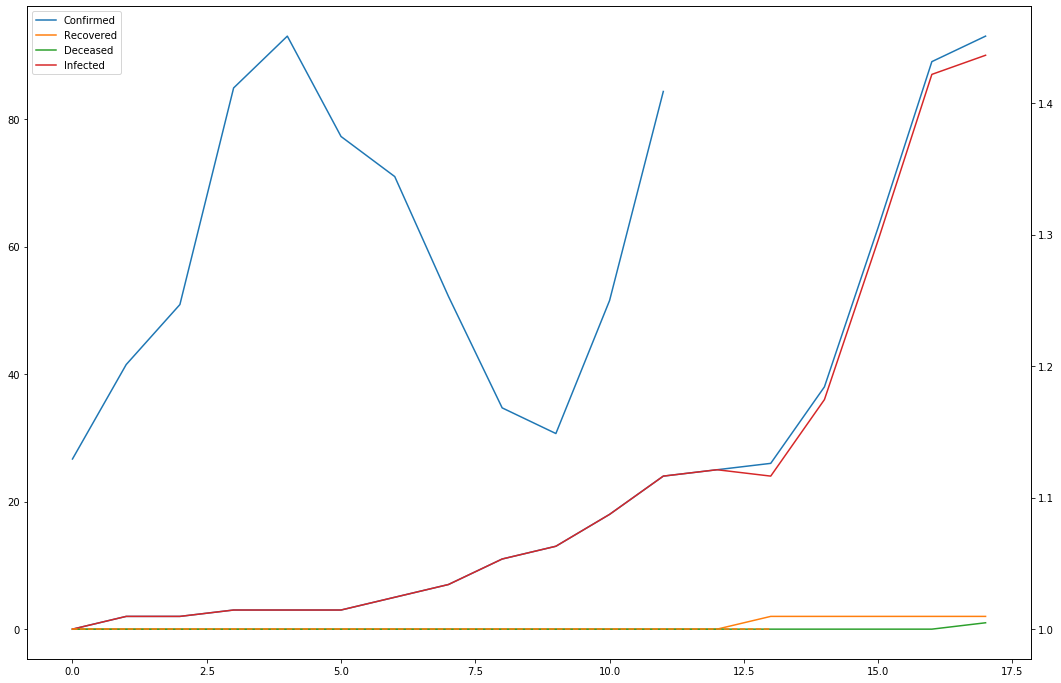

Days since first infected for Andorra: 20


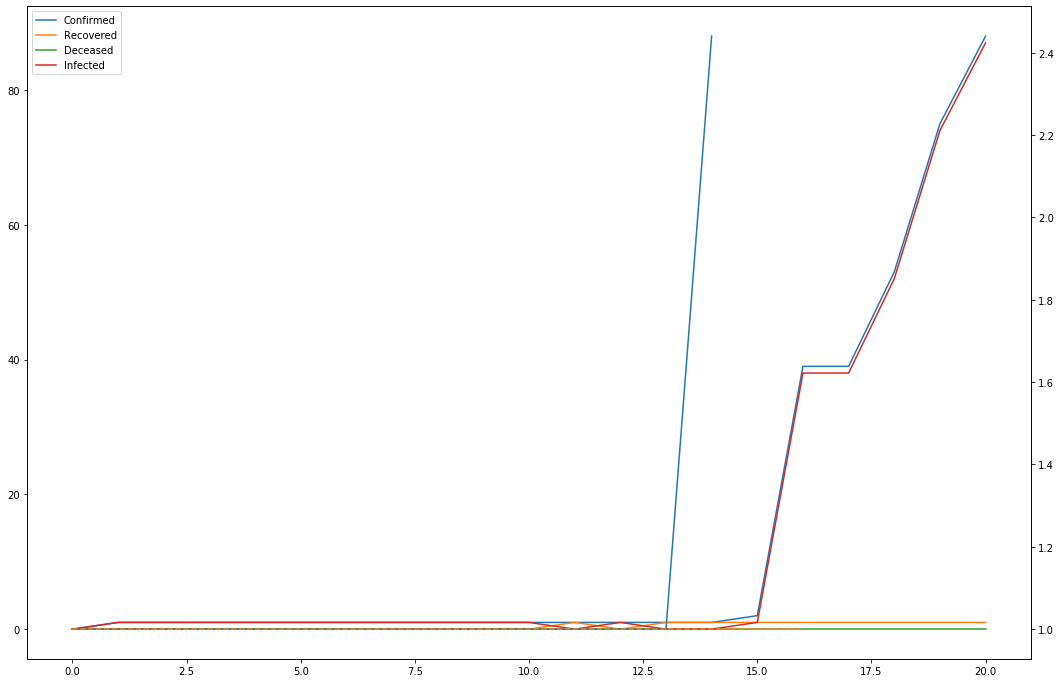

Days since first infected for Jordan: 19


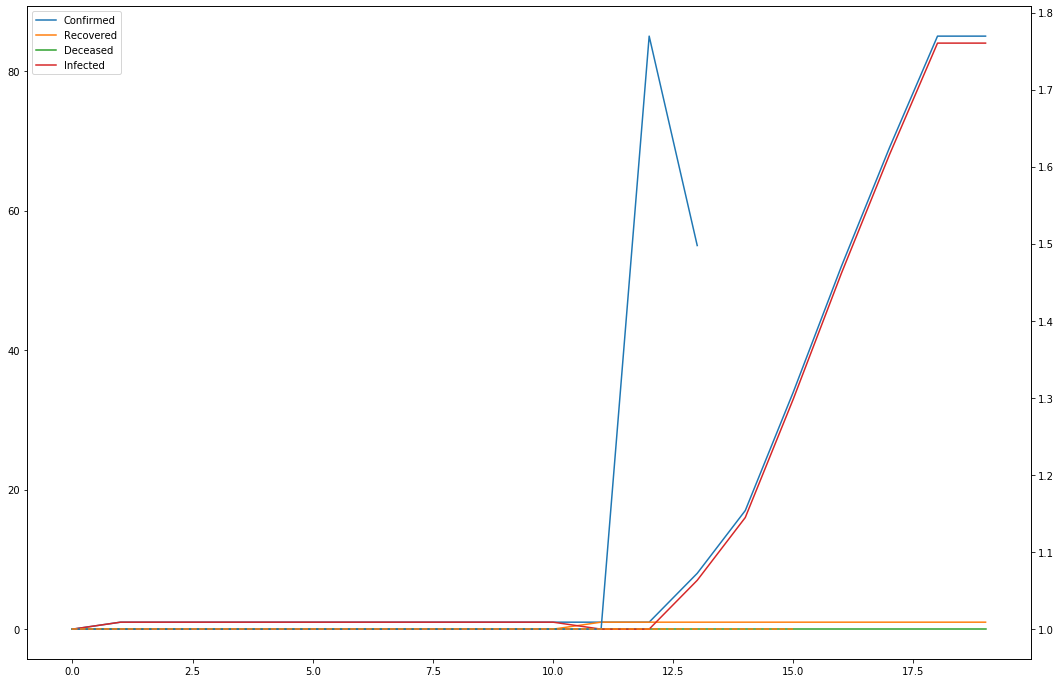

Days since first infected for North Macedonia: 25


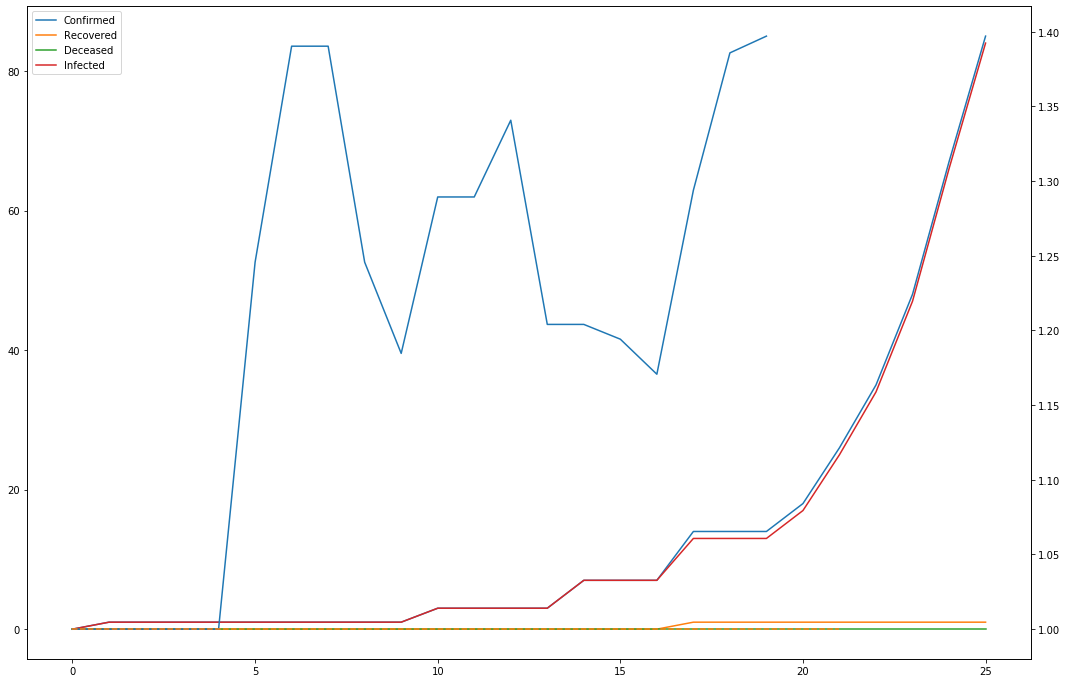

Days since first infected for Cyprus: 13


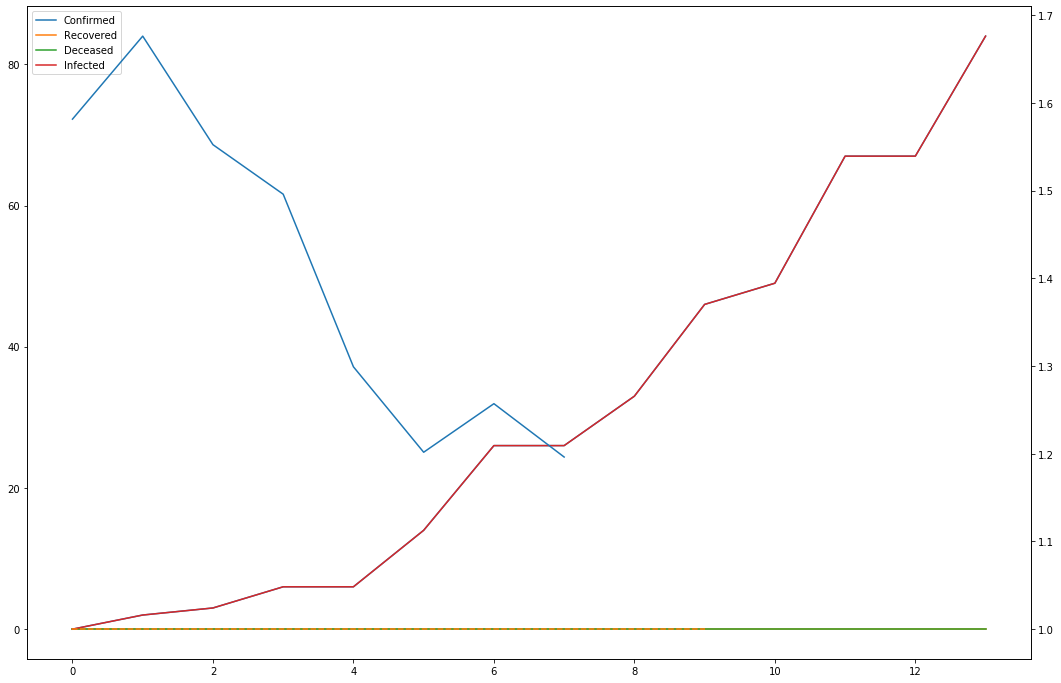

Days since first infected for Brunei: 13


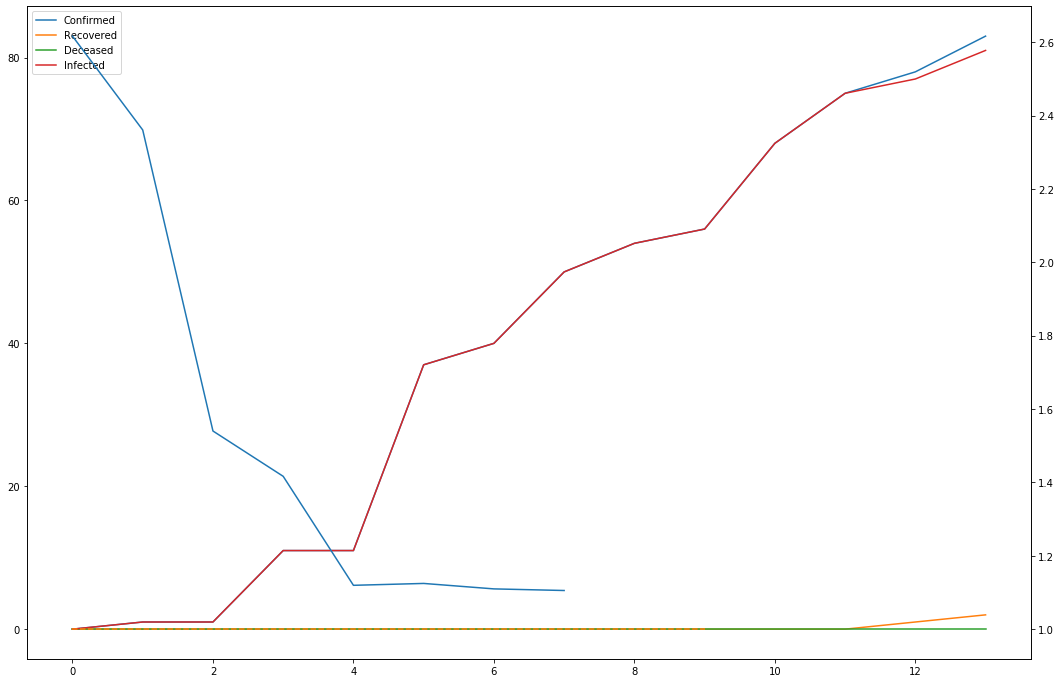

Days since first infected for Lithuania: 23


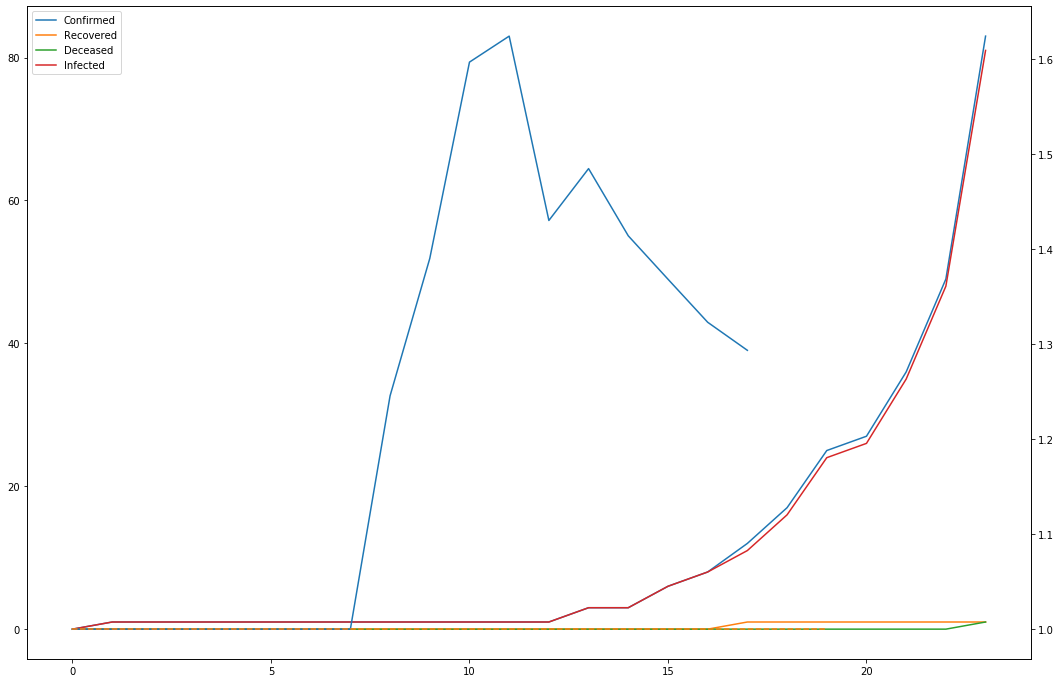

Days since first infected for Moldova: 14


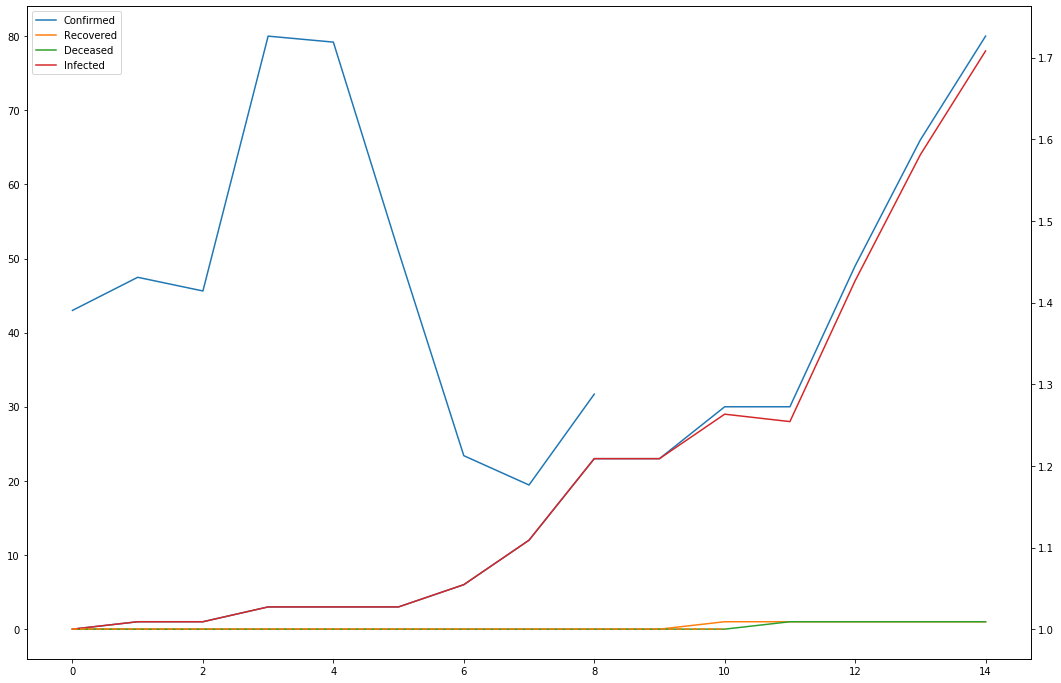

Days since first infected for Sri Lanka: 55


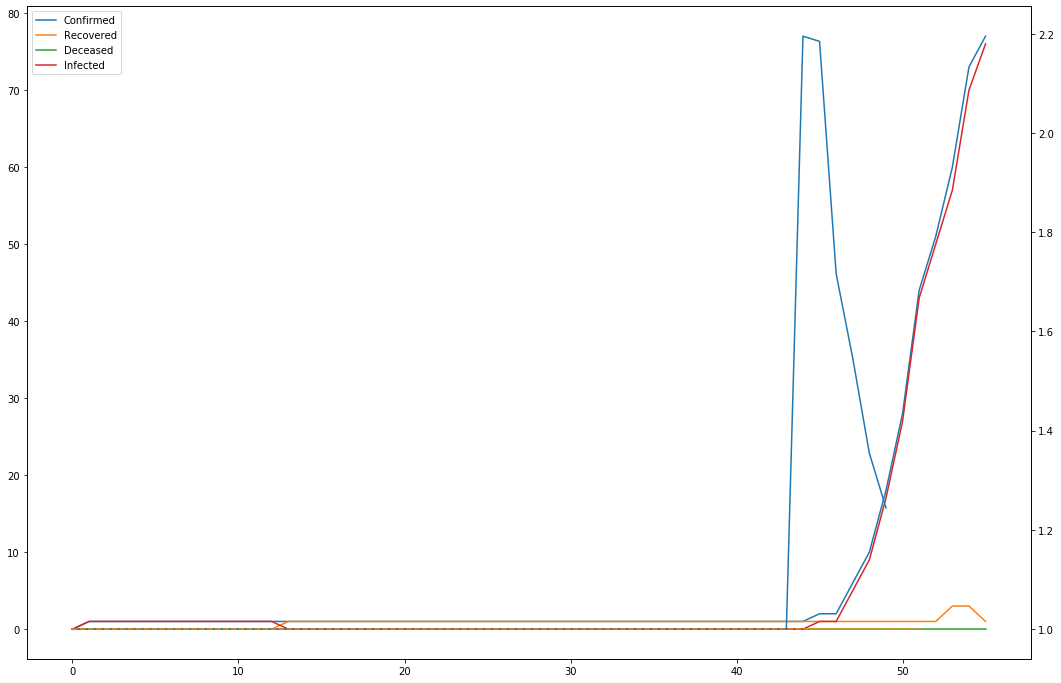

Days since first infected for Albania: 13


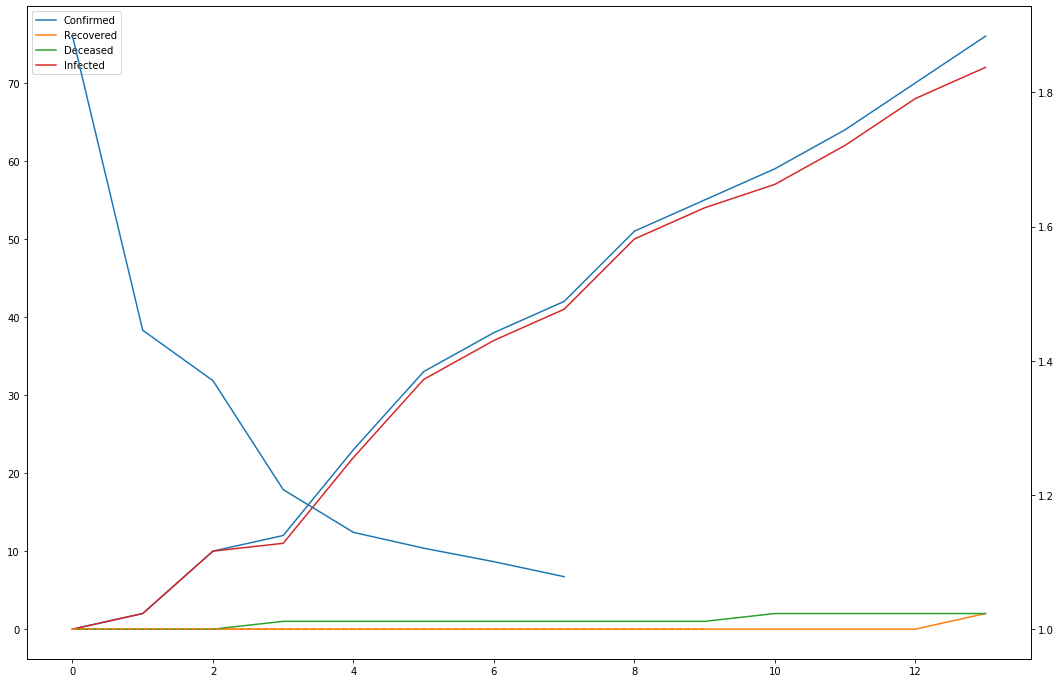

Days since first infected for Belarus: 23


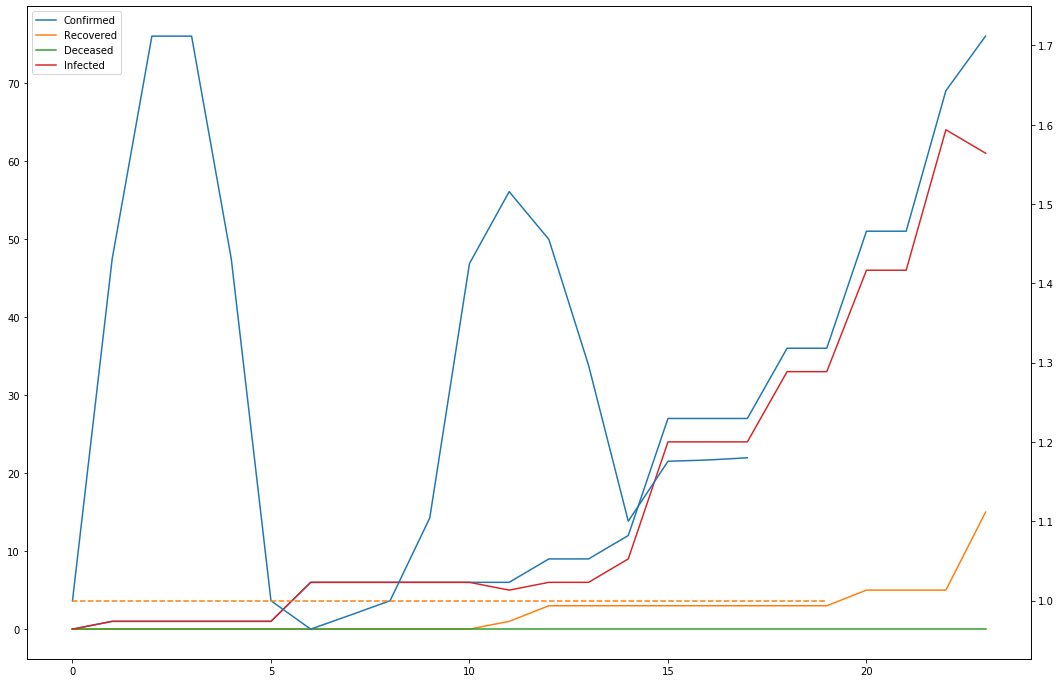

Days since first infected for Malta: 15


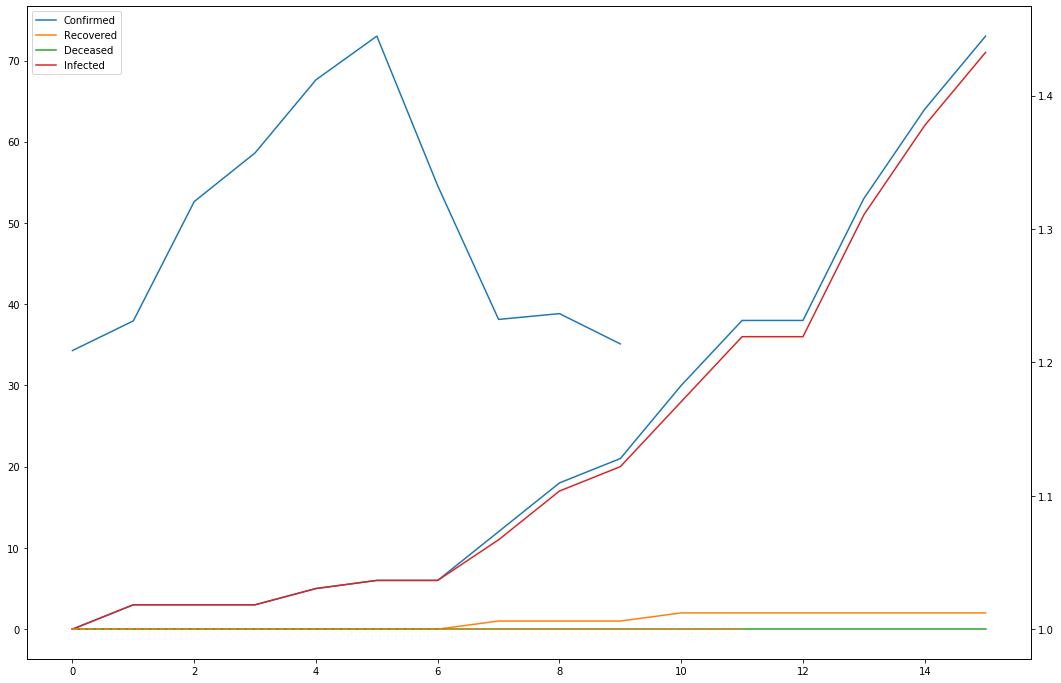

Days since first infected for Venezuela: 8


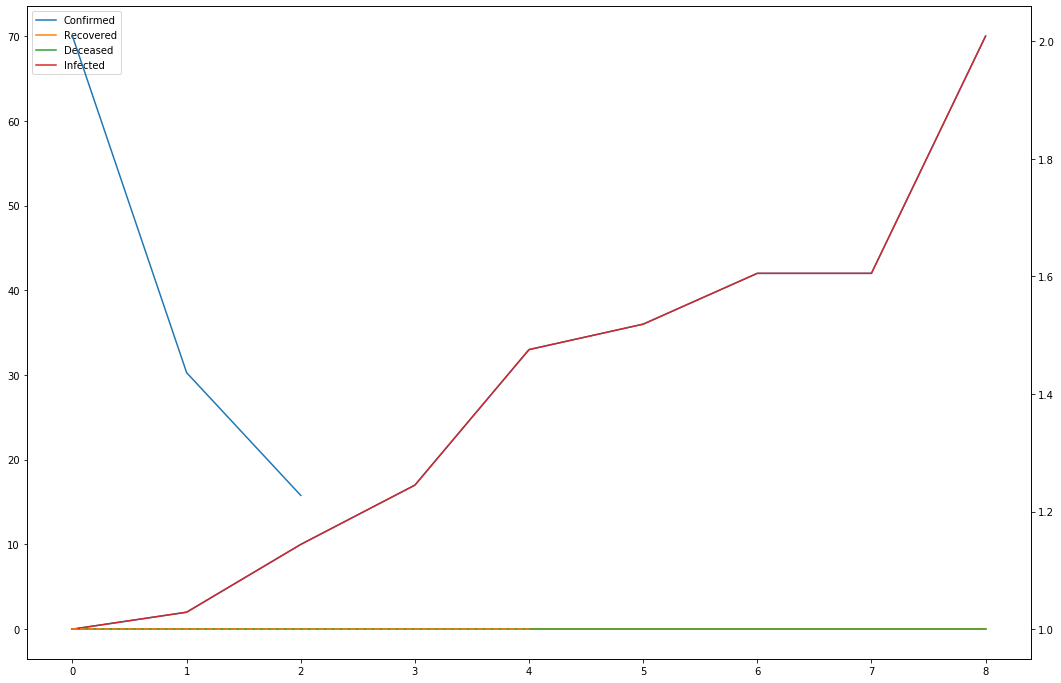

Days since first infected for Burkina Faso: 12


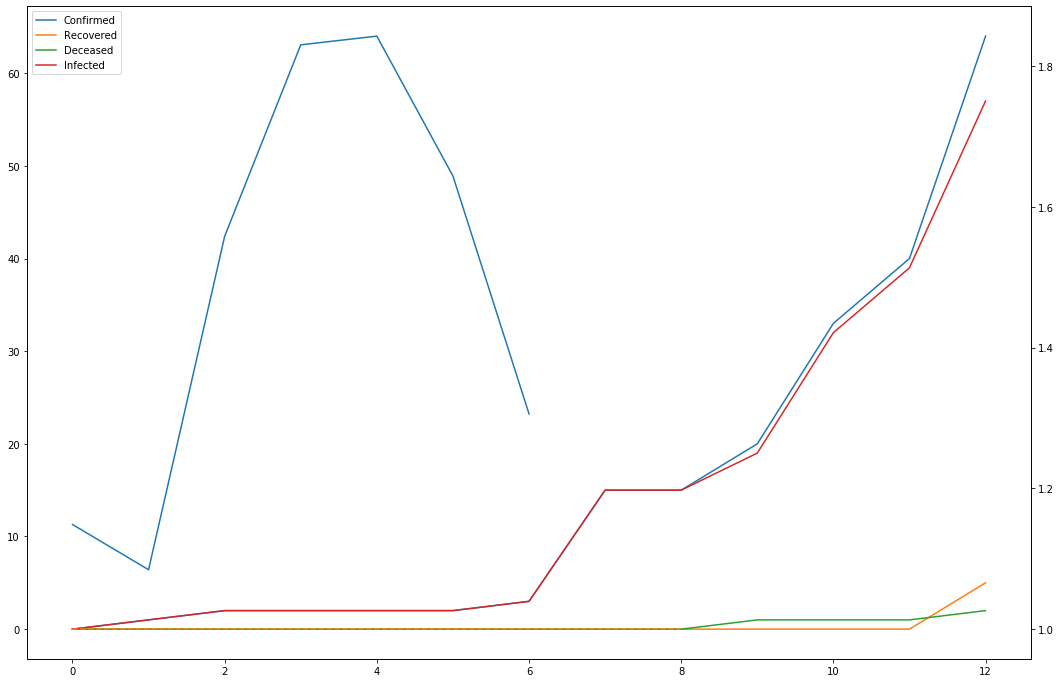

Days since first infected for Tunisia: 18


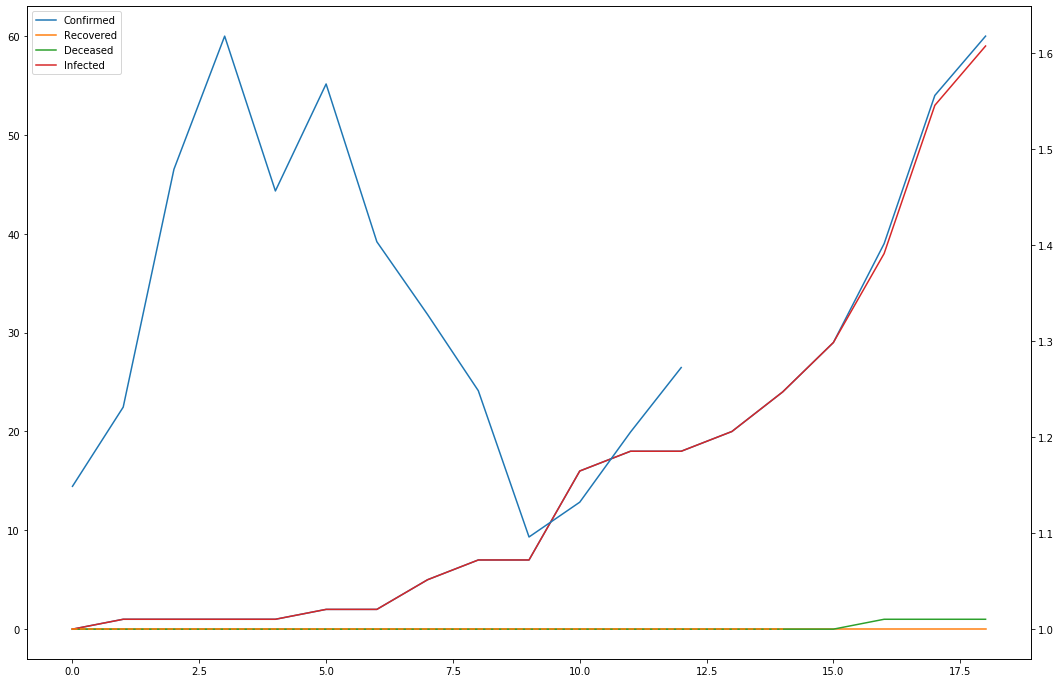

Days since first infected for Kazakhstan: 9


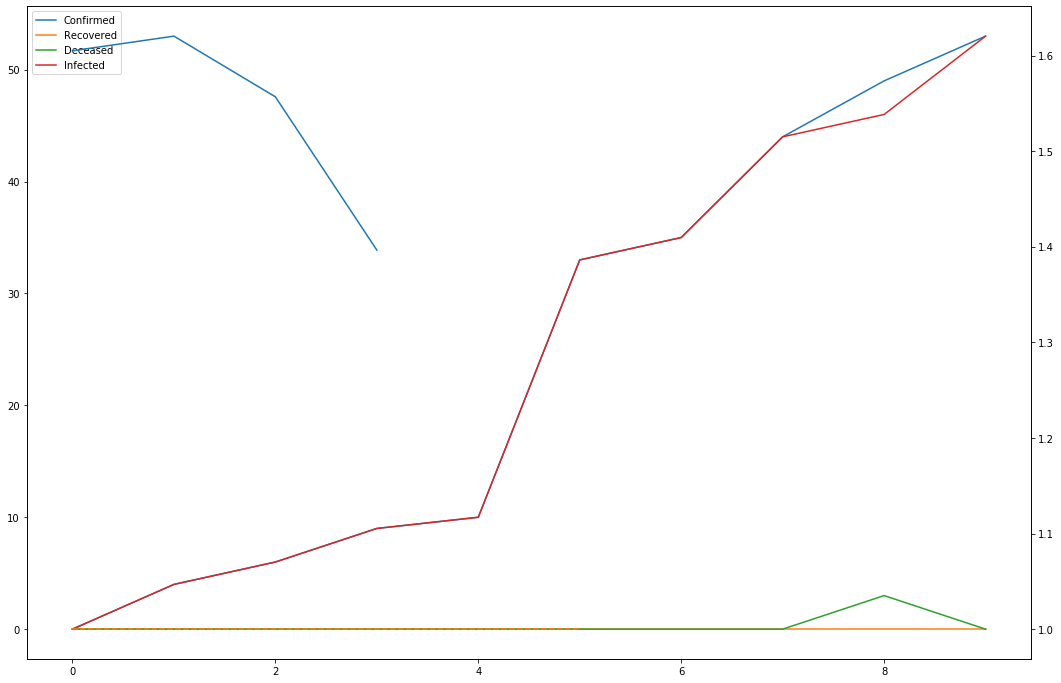

Days since first infected for Cambodia: 55


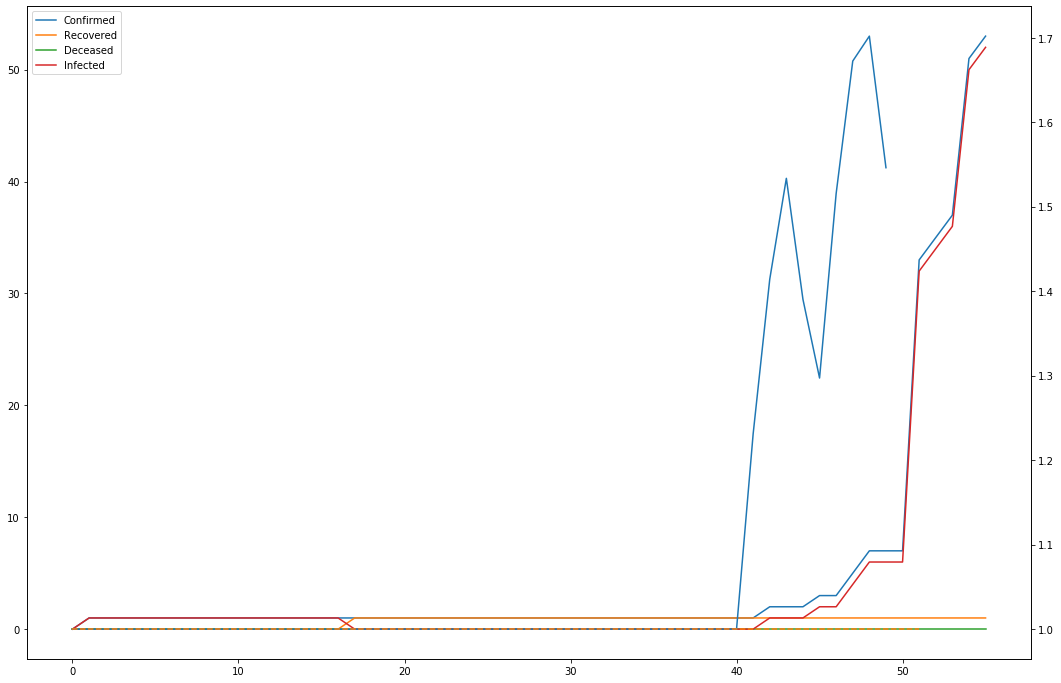

Days since first infected for Azerbaijan: 21


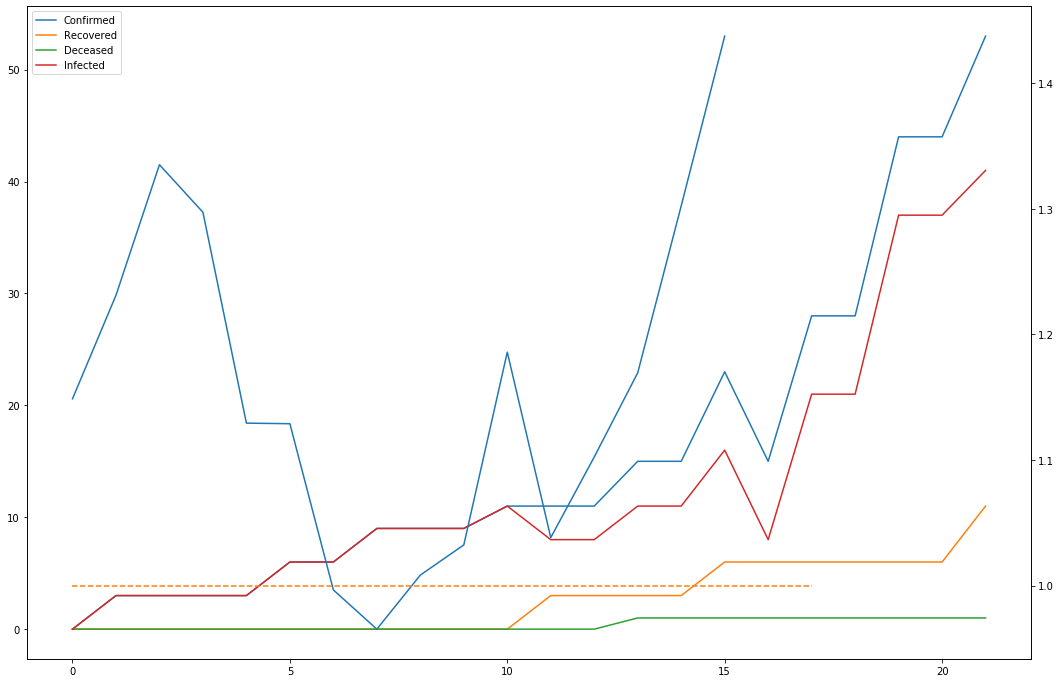

Days since first infected for New Zealand: 23


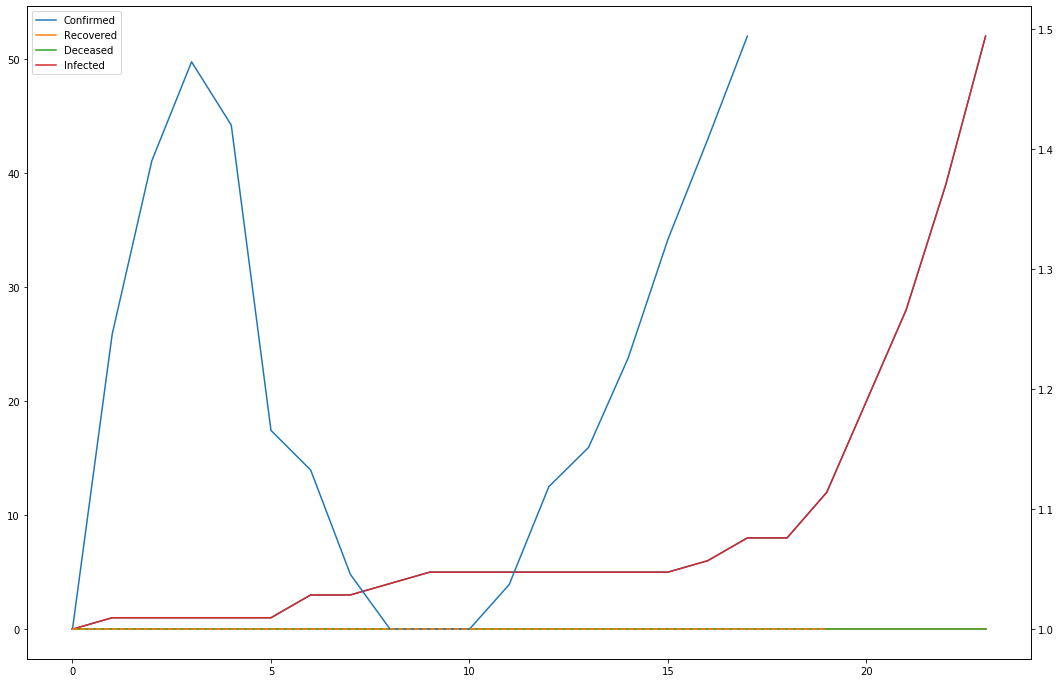

Days since first infected for Oman: 27


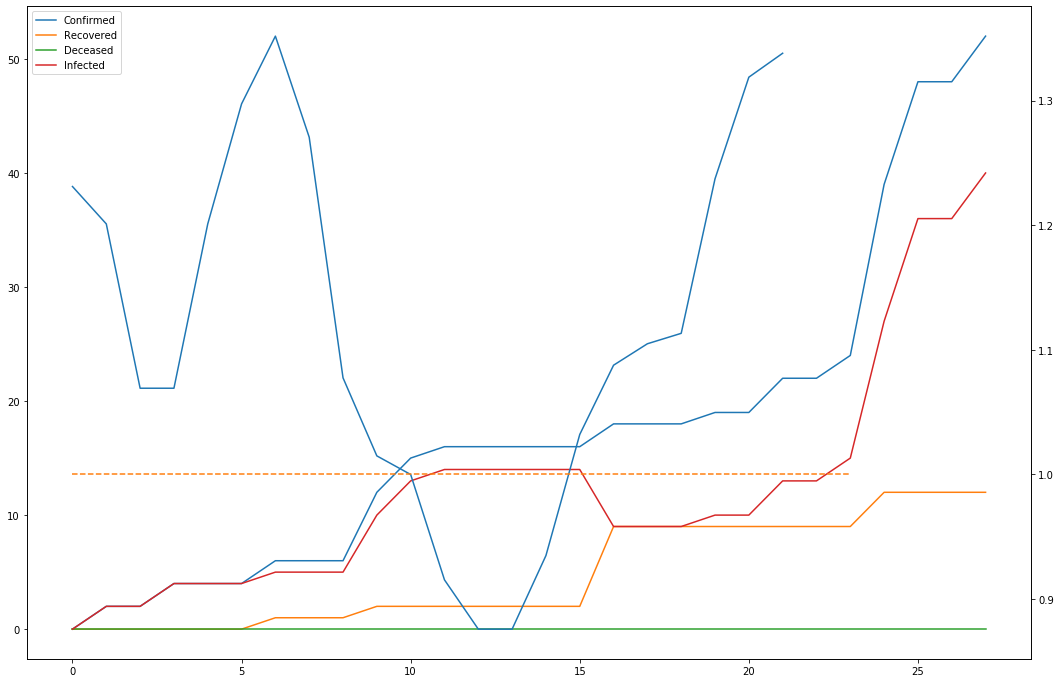

Days since first infected for Georgia: 25


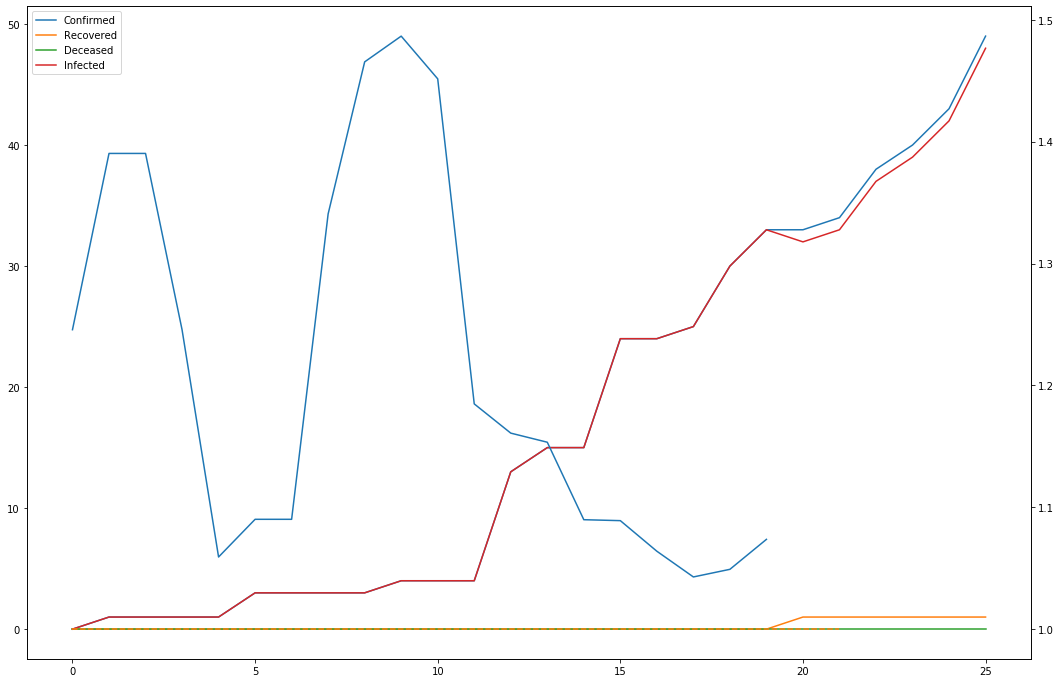

Days since first infected for Trinidad and Tobago: 8


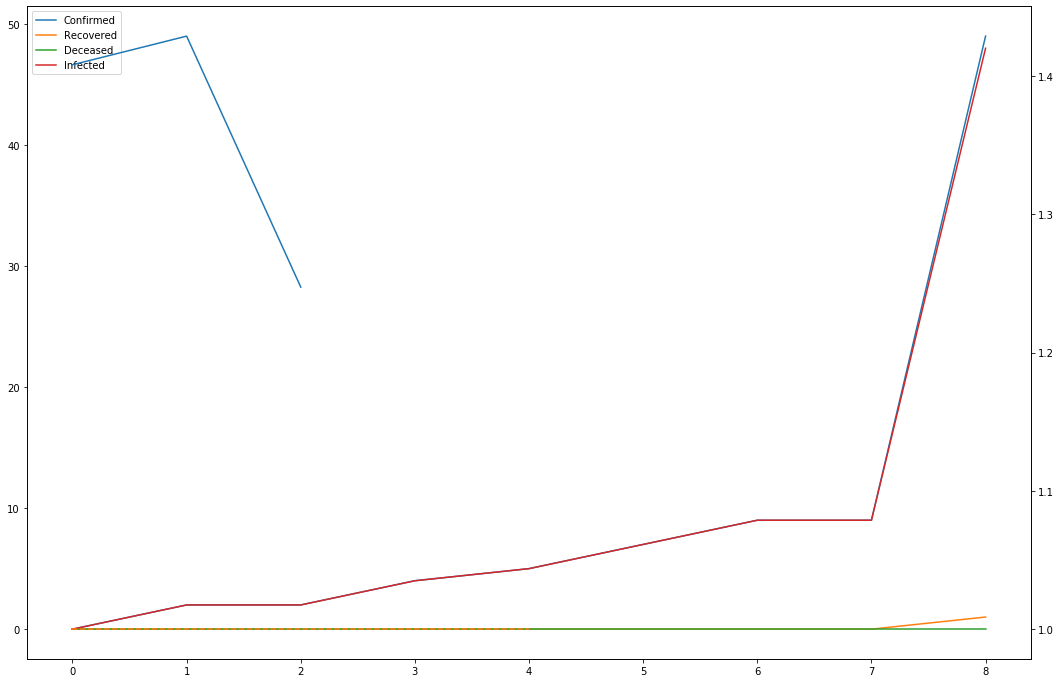

Days since first infected for Senegal: 20


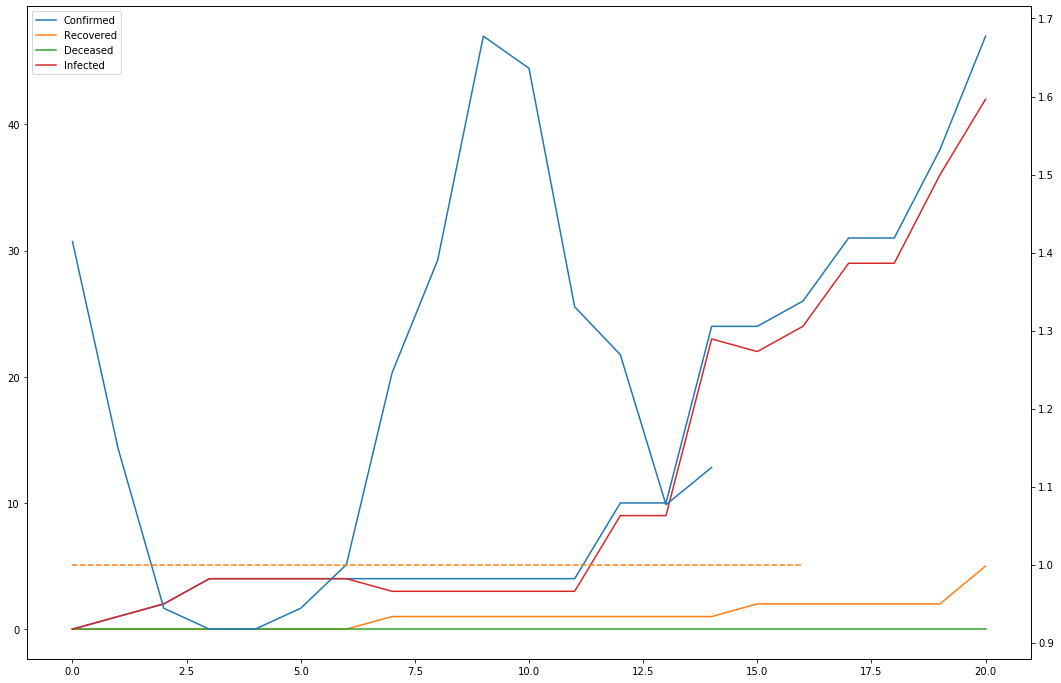

Days since first infected for Ukraine: 19


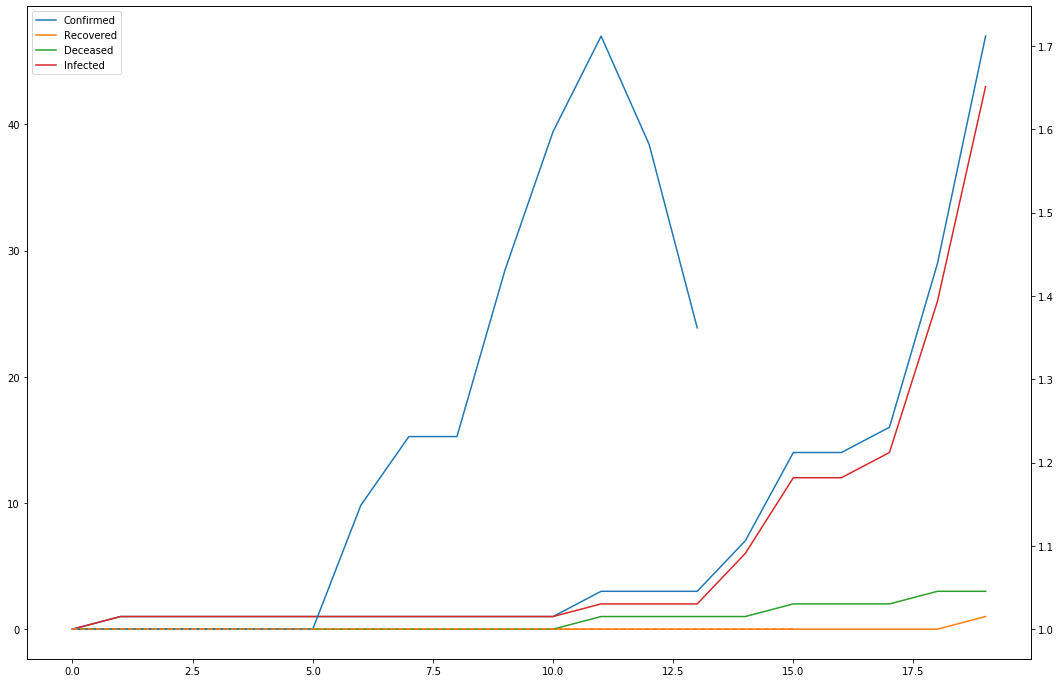

Days since first infected for Uzbekistan: 7


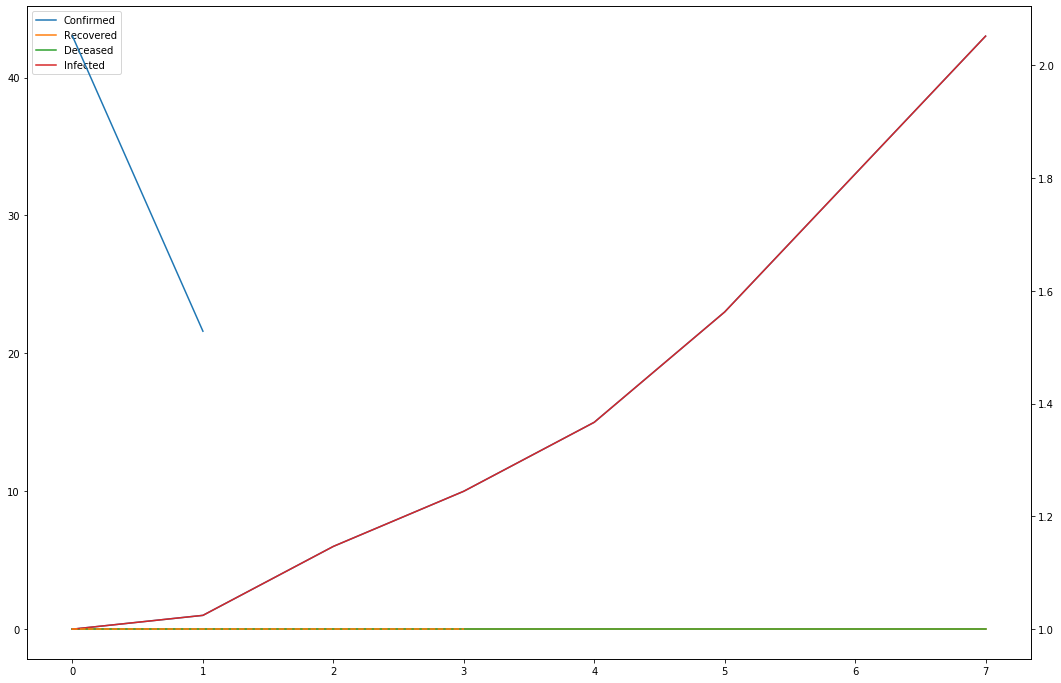

Days since first infected for Liechtenstein: 18


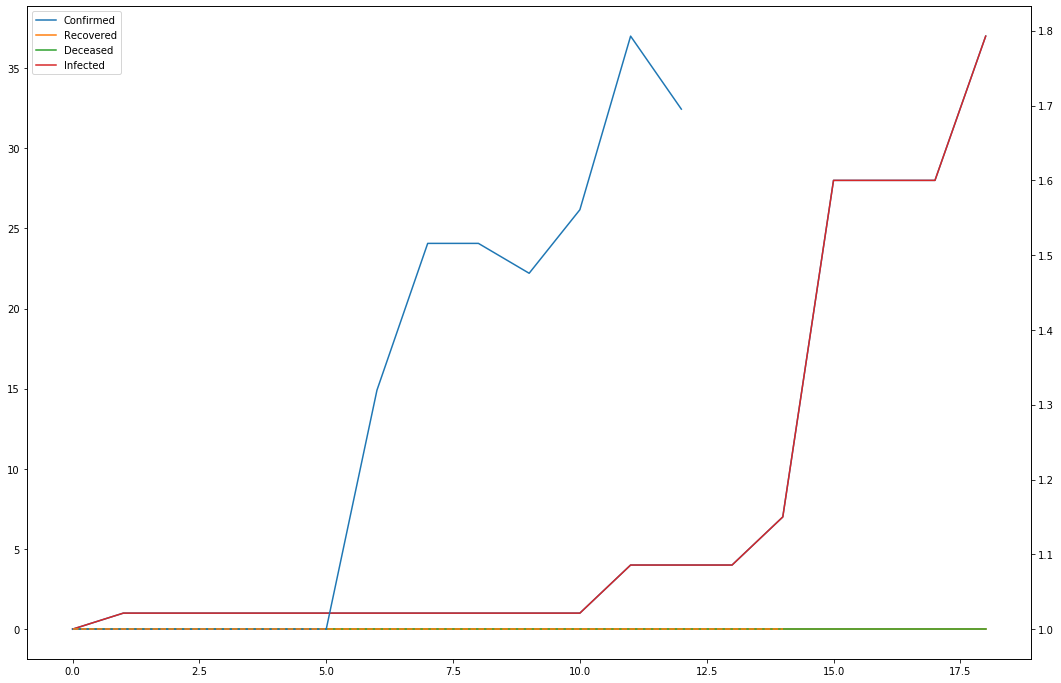

Days since first infected for Martinique: 15


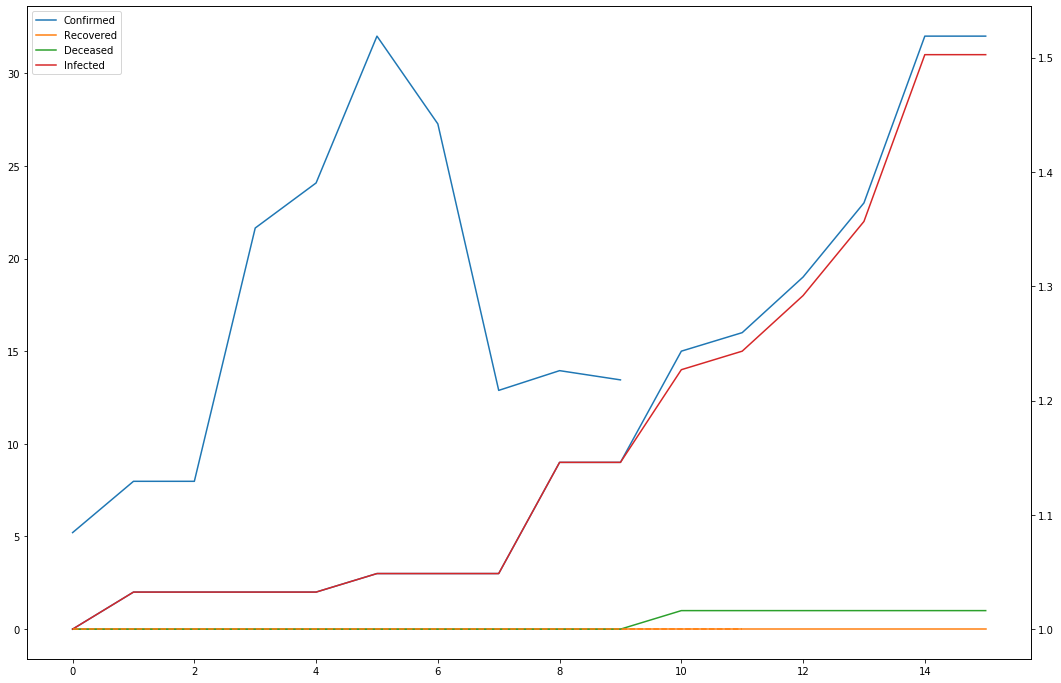

Days since first infected for Cameroon: 16


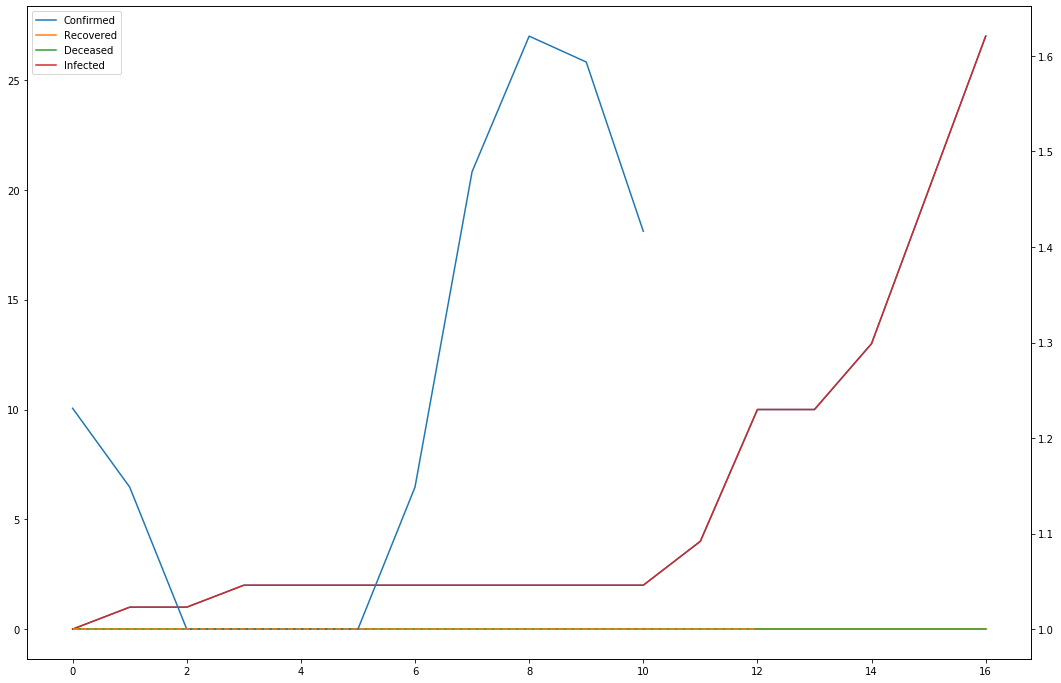

Days since first infected for Bangladesh: 14


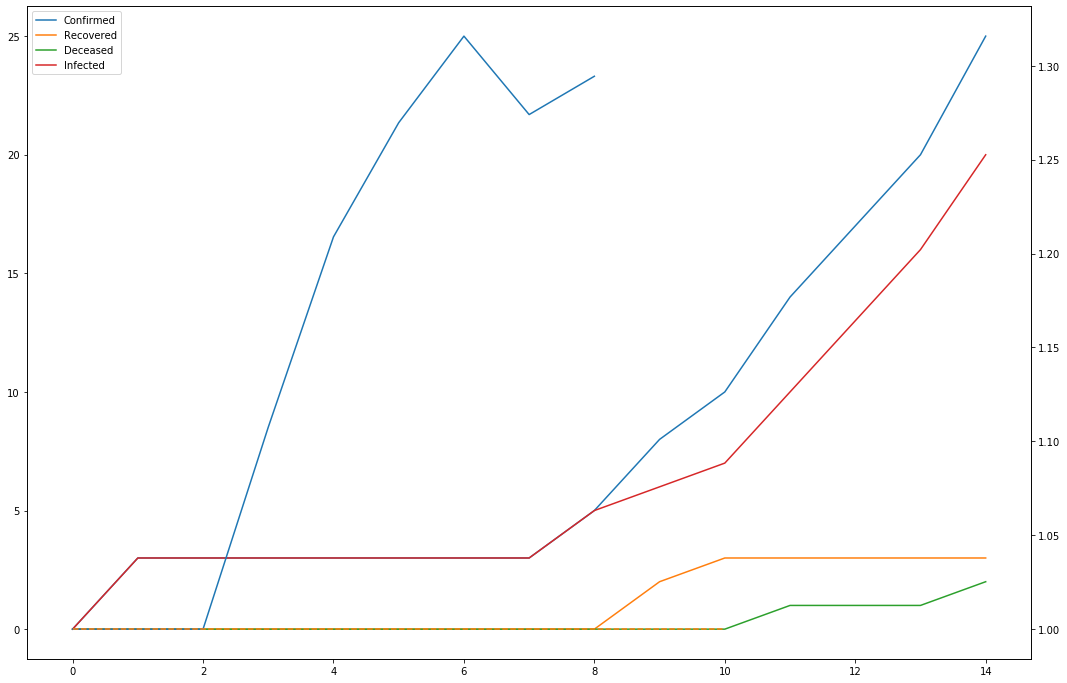

Days since first infected for Afghanistan: 27


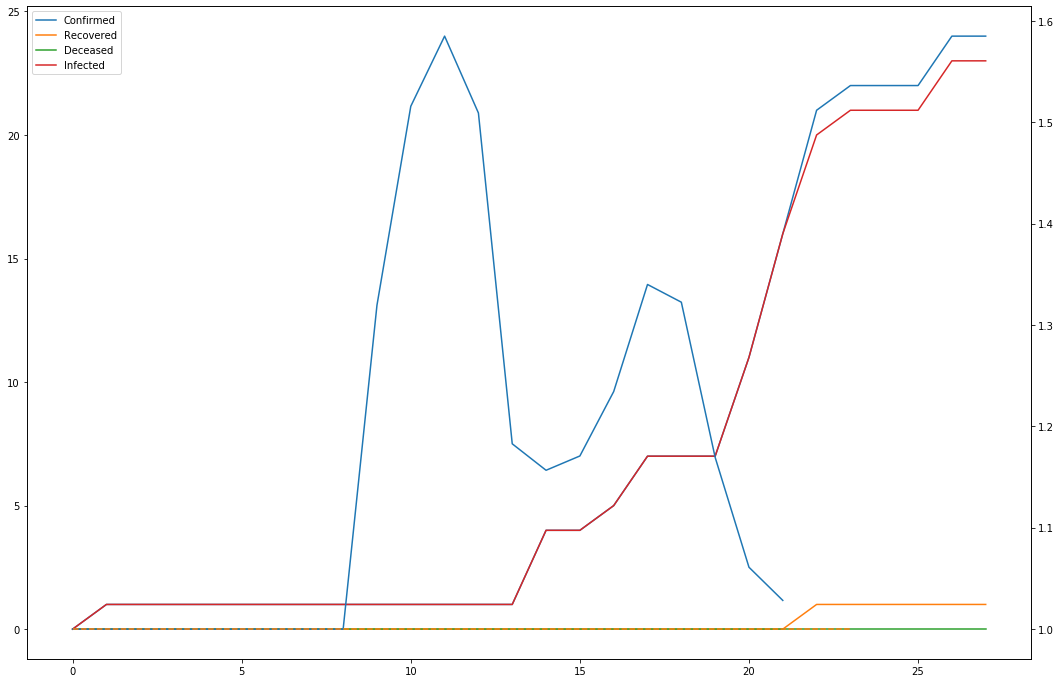

Days since first infected for Honduras: 11


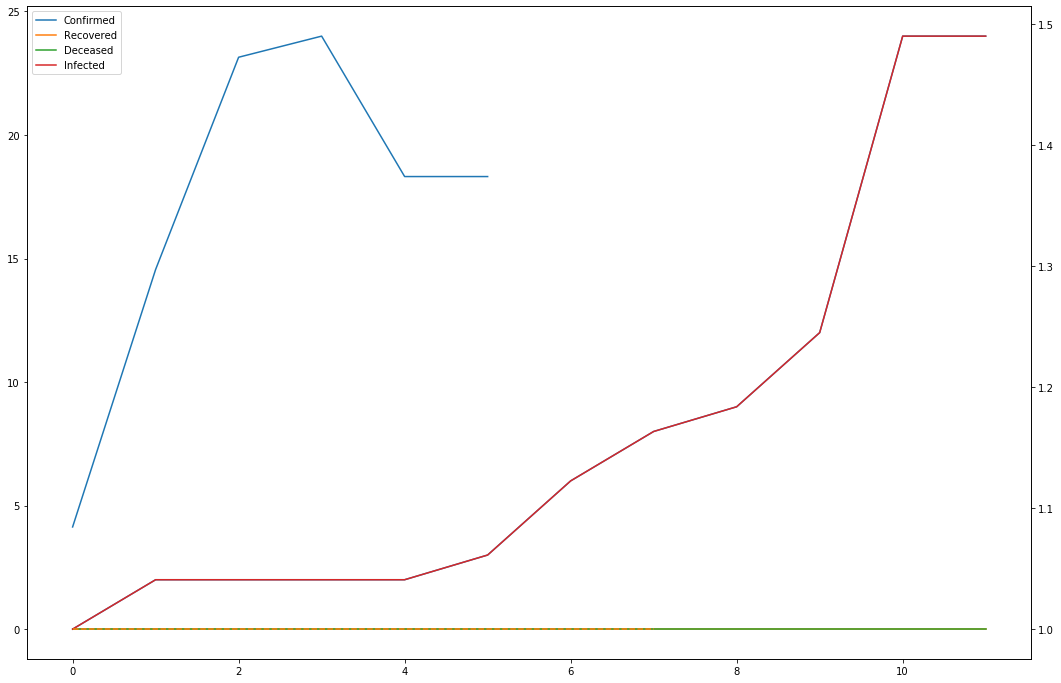

Days since first infected for Congo (Kinshasa): 11


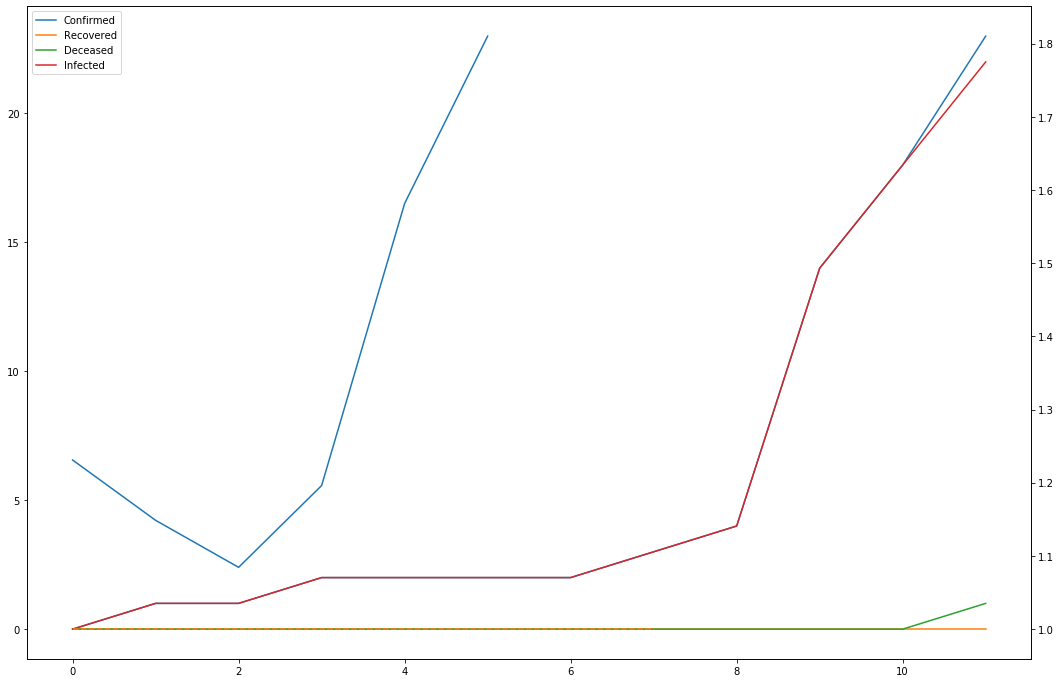

Days since first infected for Nigeria: 23


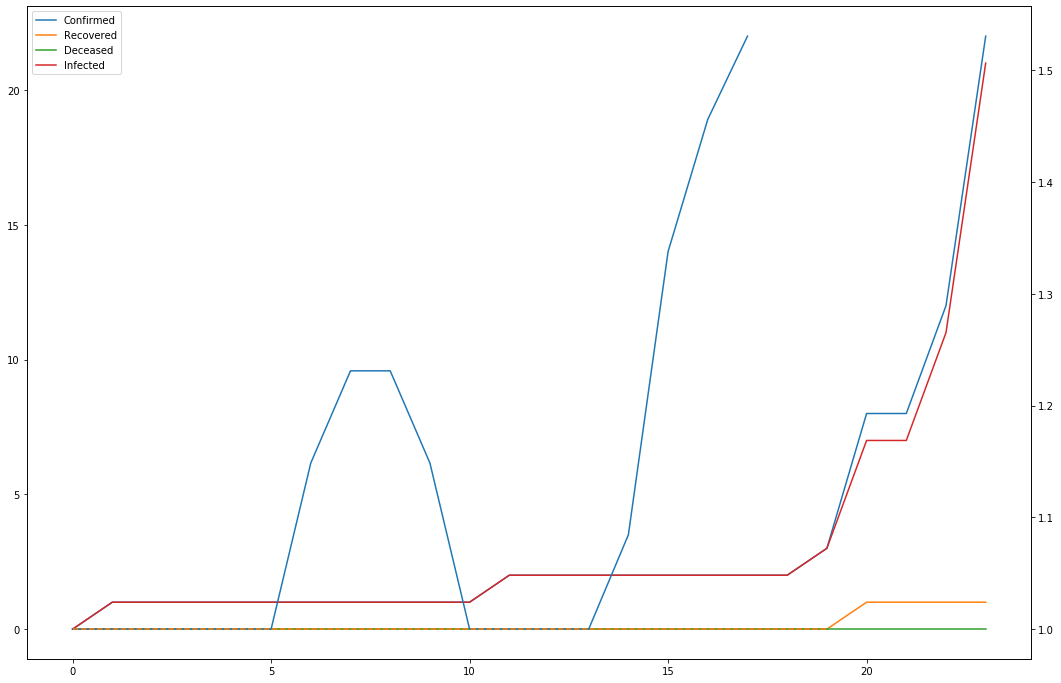

Days since first infected for Cuba: 10


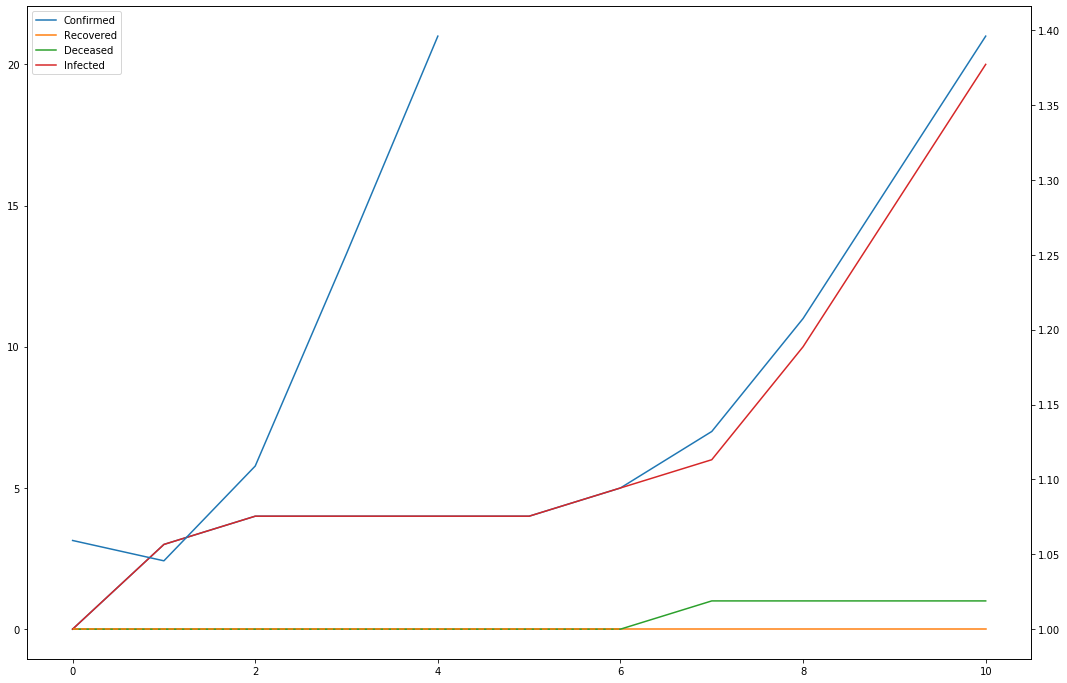

Days since first infected for Ghana: 8


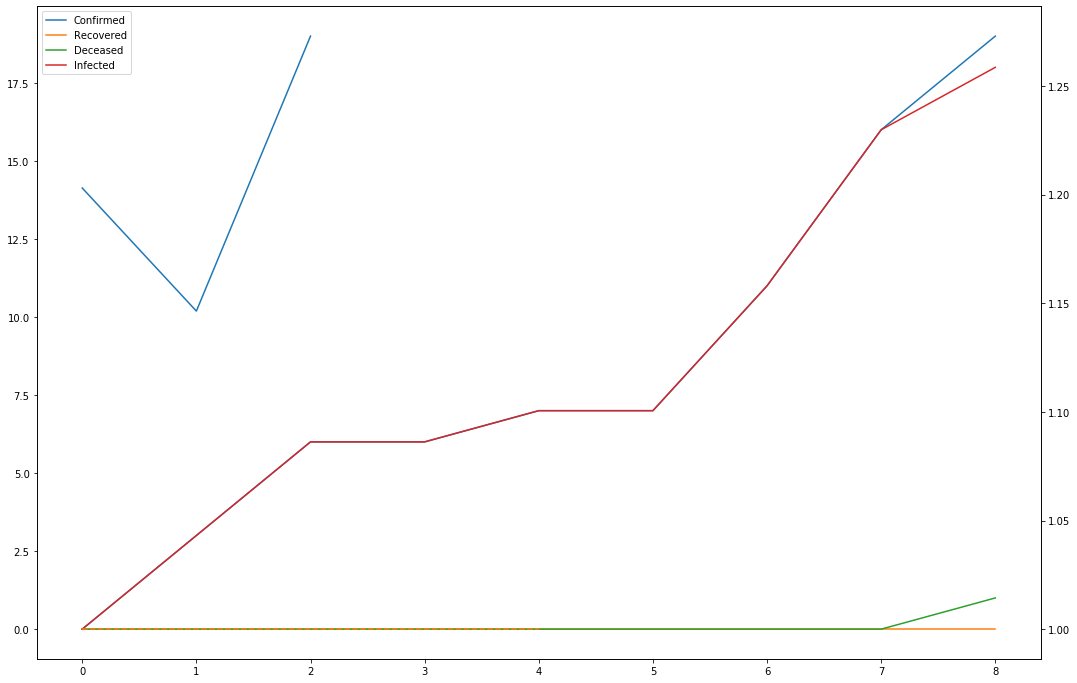

Days since first infected for Bolivia: 11


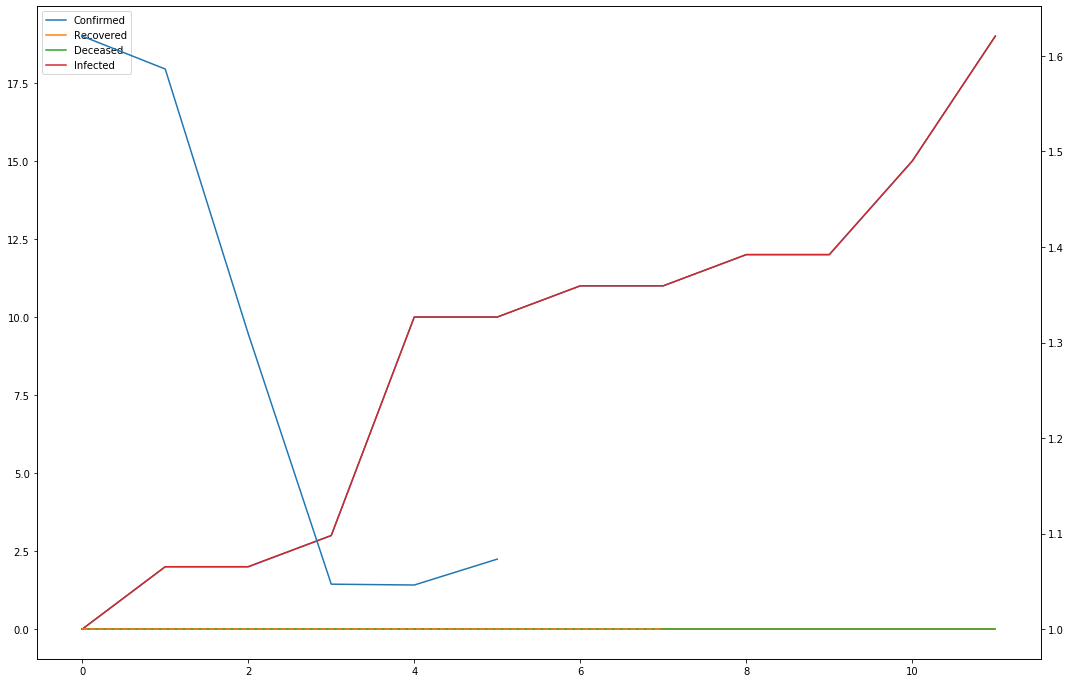

Days since first infected for Paraguay: 14


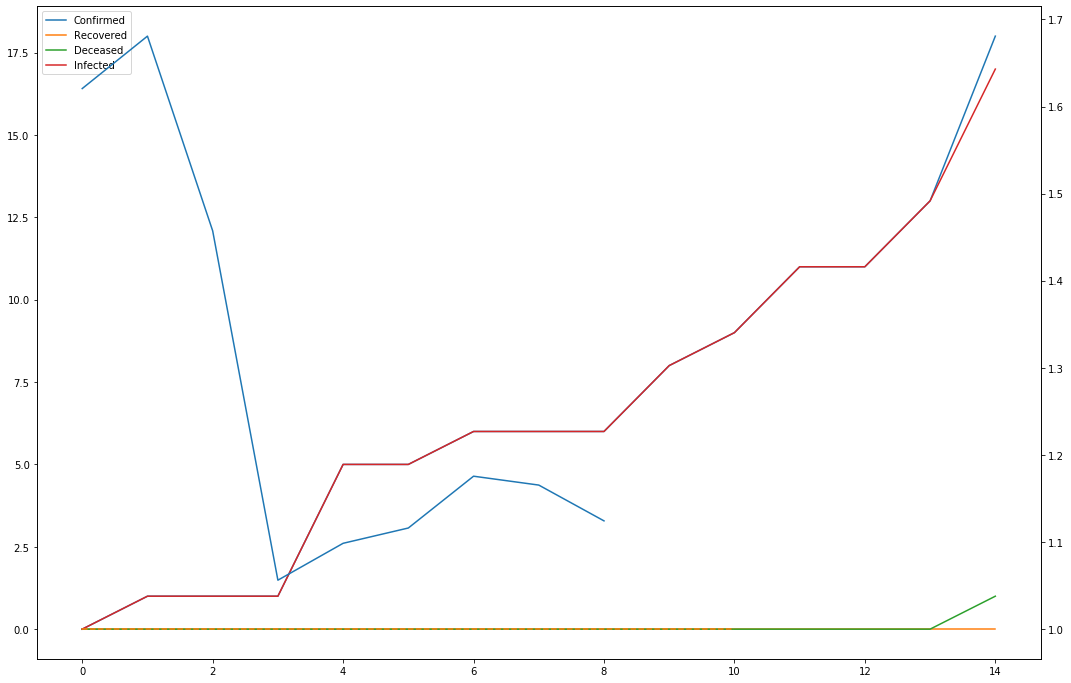

Days since first infected for Guatemala: 8


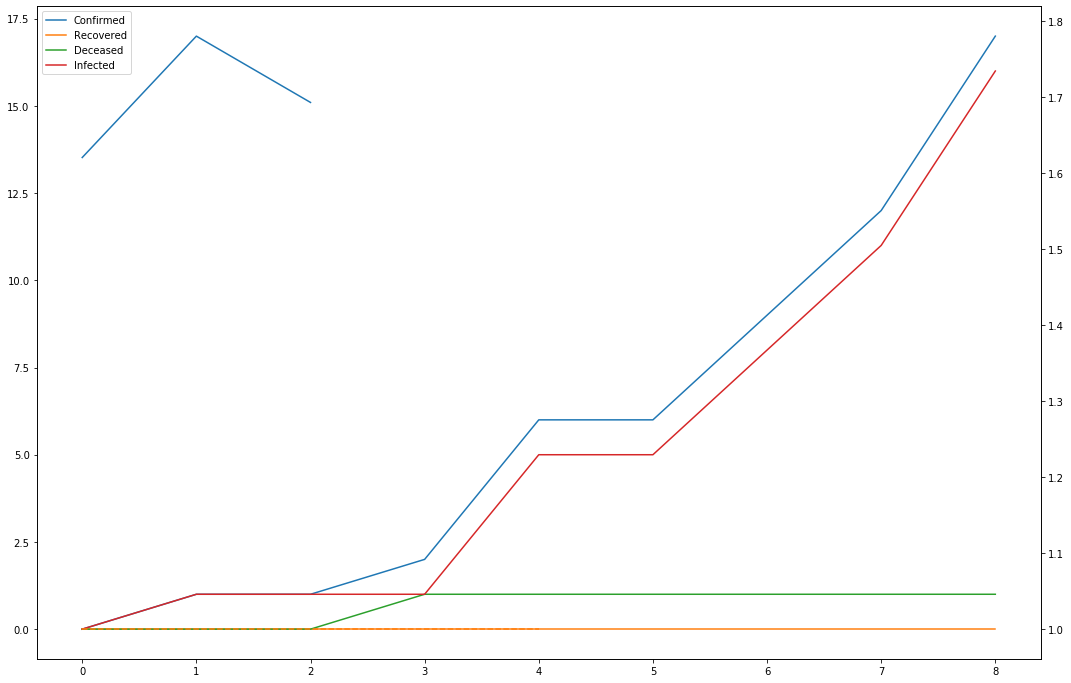

Days since first infected for Rwanda: 8


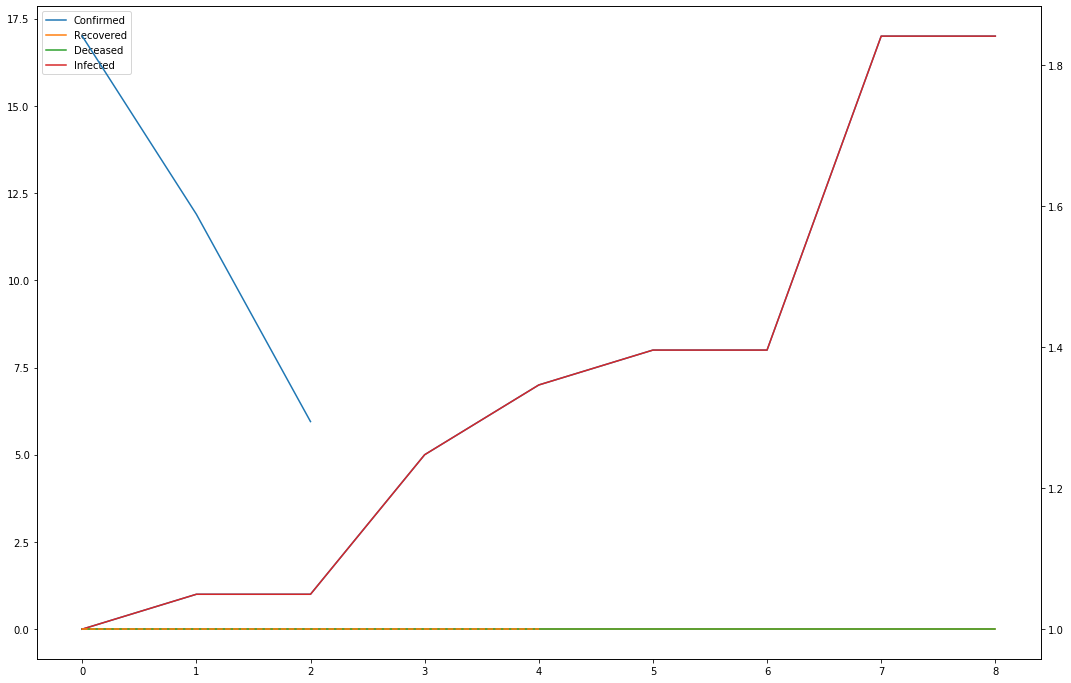

Days since first infected for Togo: 16


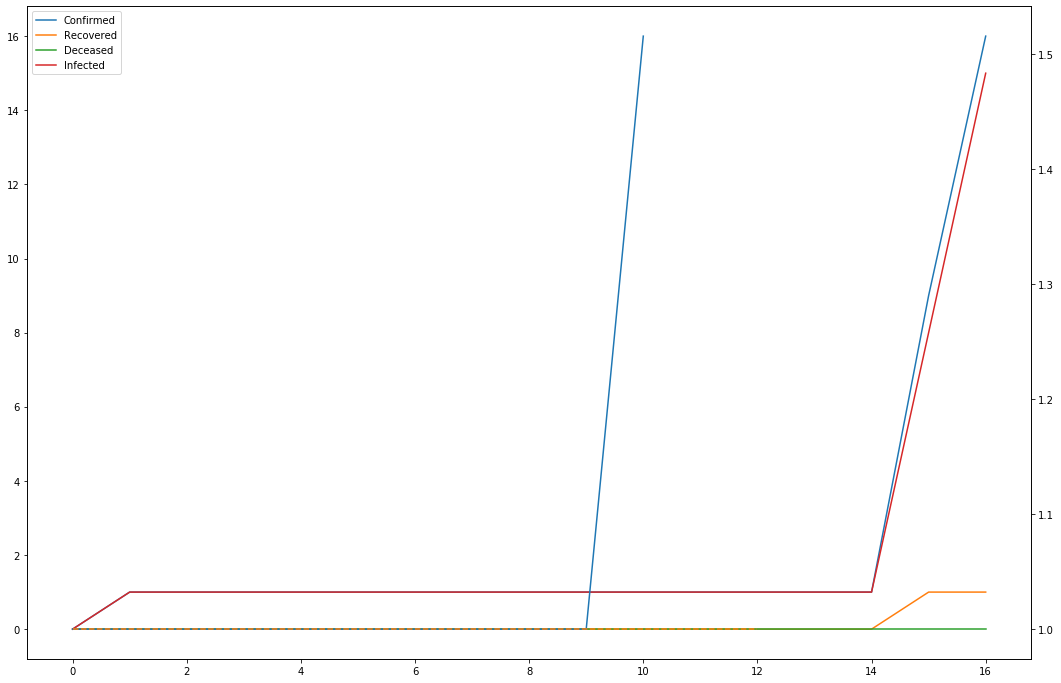

Days since first infected for Jamaica: 11


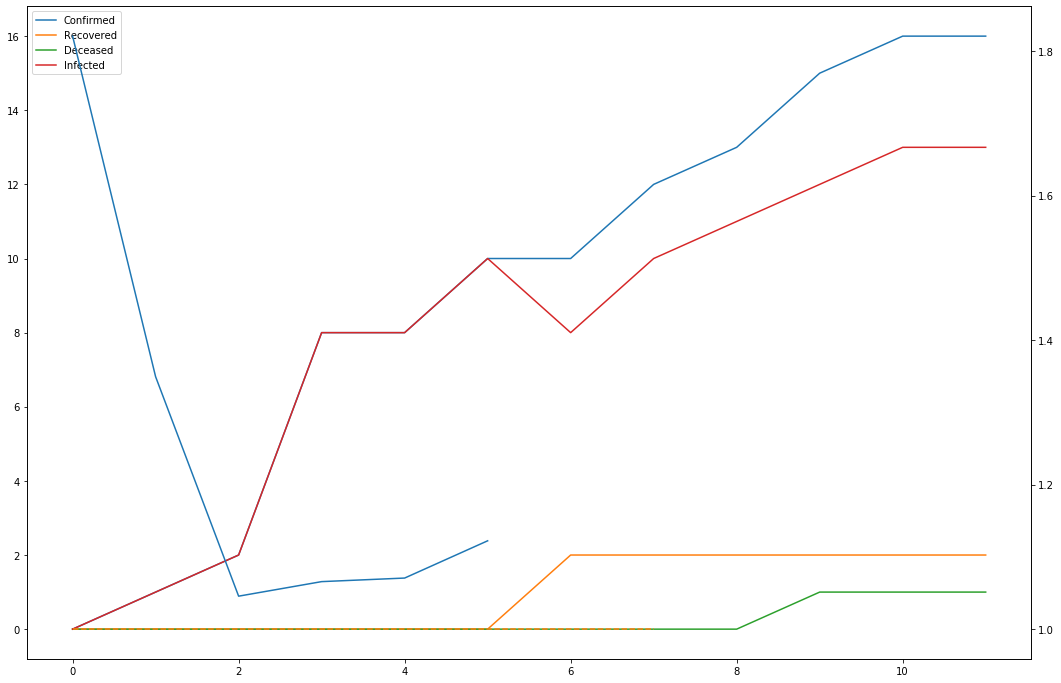

Days since first infected for Montenegro: 5


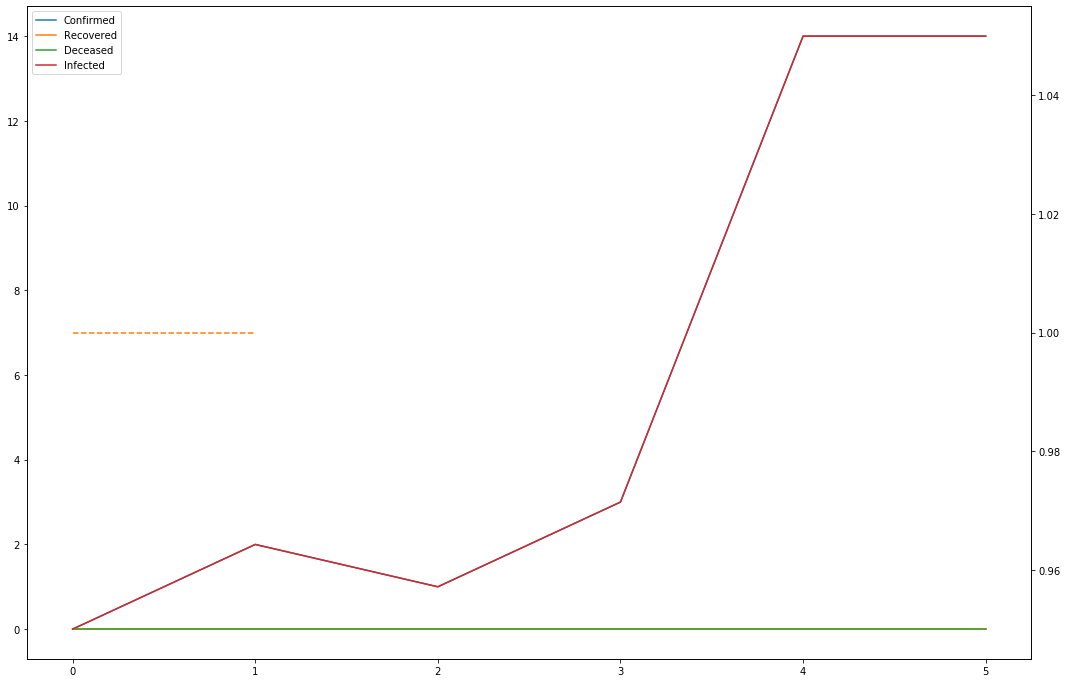

Days since first infected for Kyrgyzstan: 4


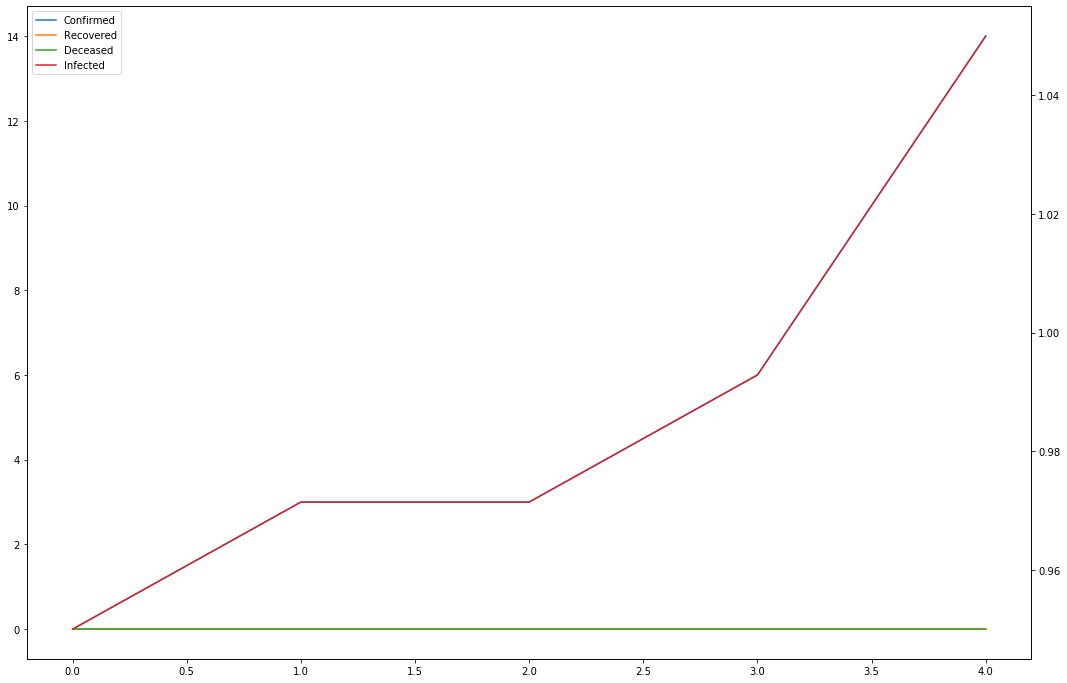

Days since first infected for Mauritius: 4


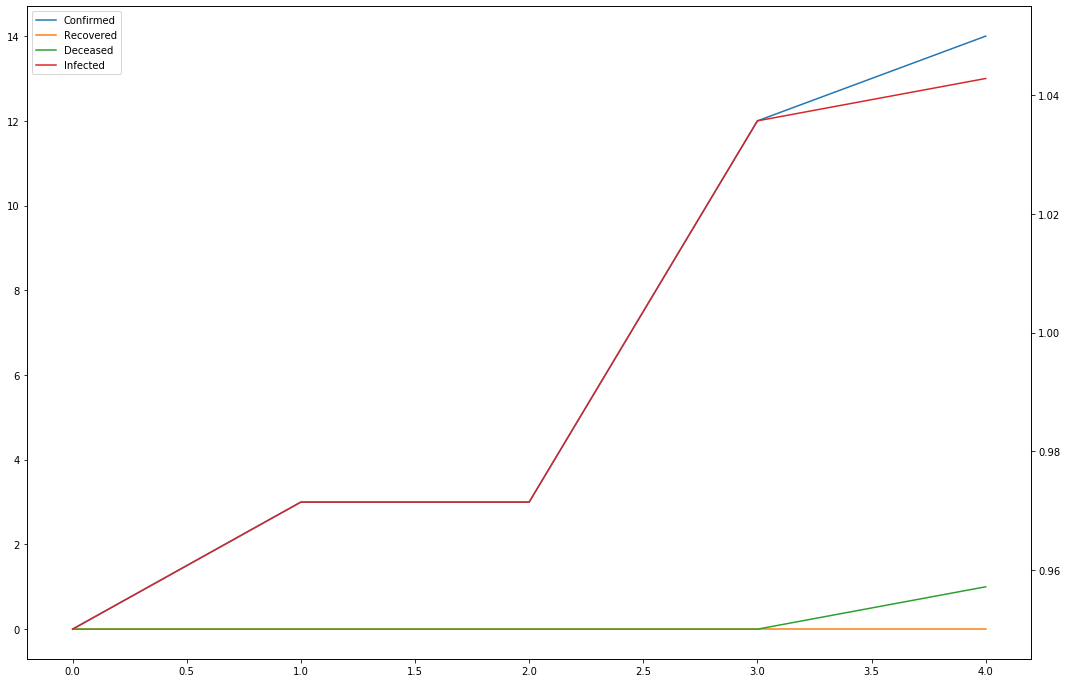

Days since first infected for Cote d'Ivoire: 11


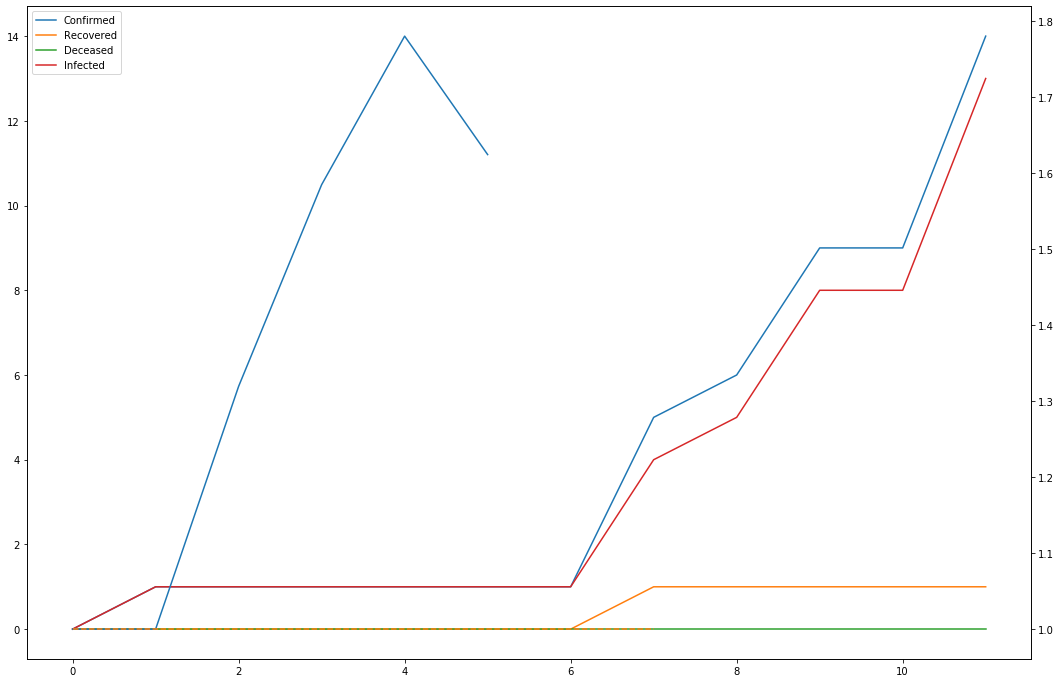

Days since first infected for Maldives: 14


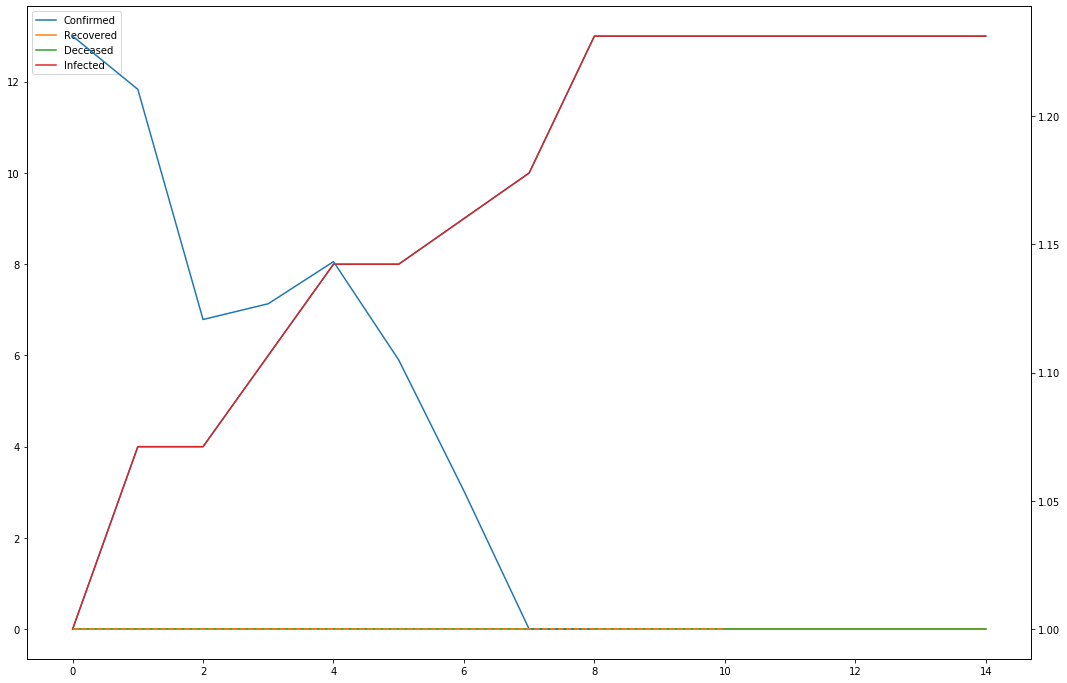

Days since first infected for Monaco: 22


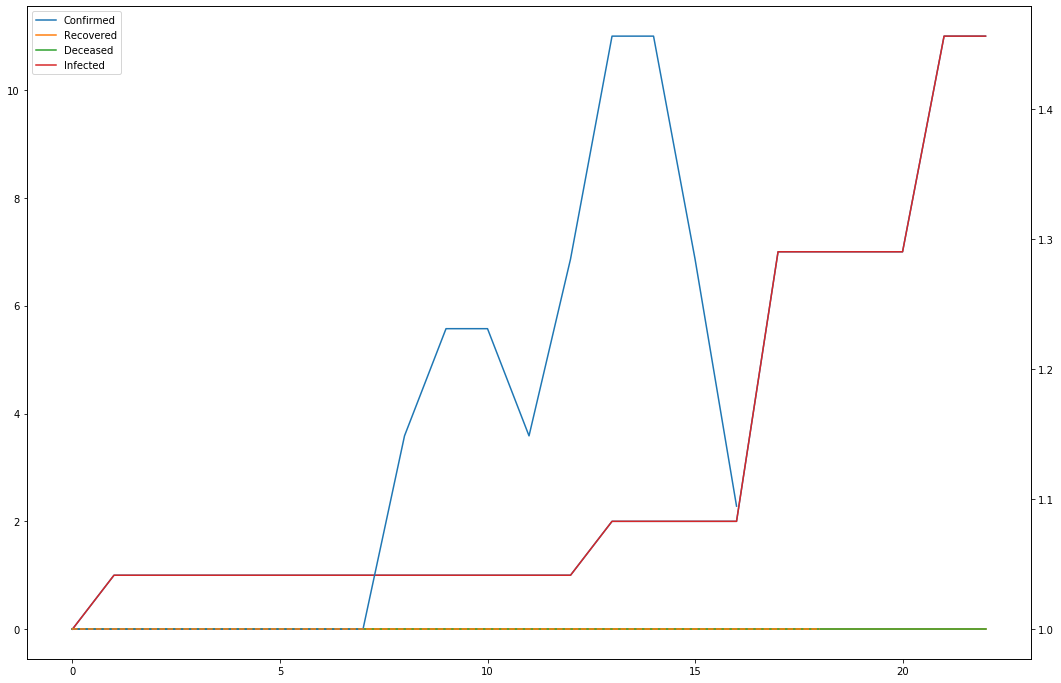

Days since first infected for Mongolia: 12


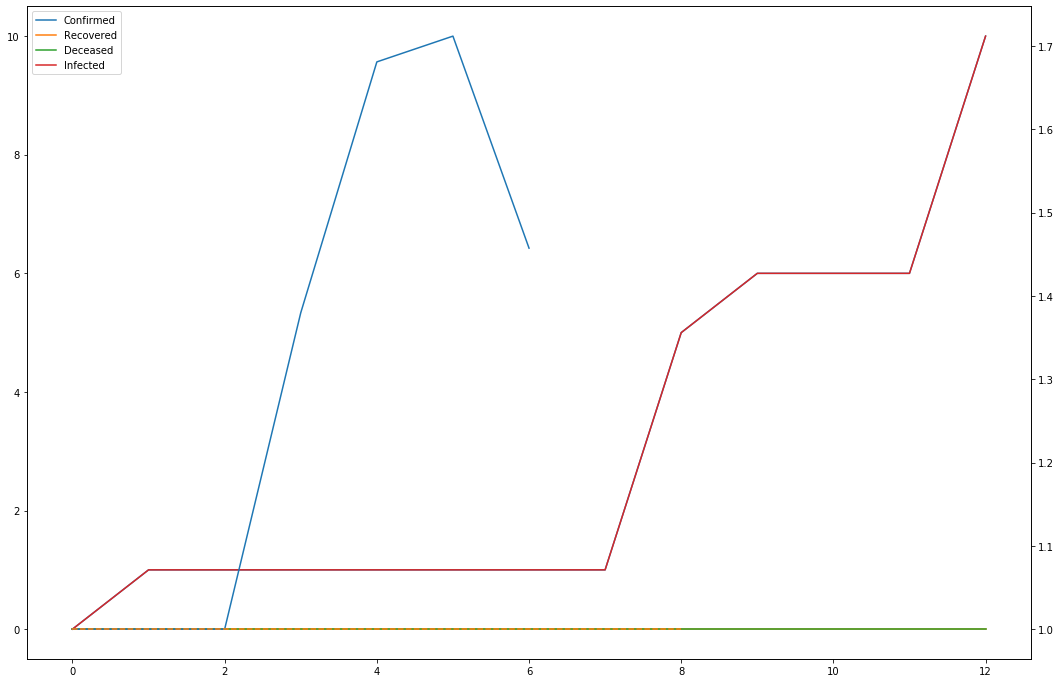

Days since first infected for Ethiopia: 9


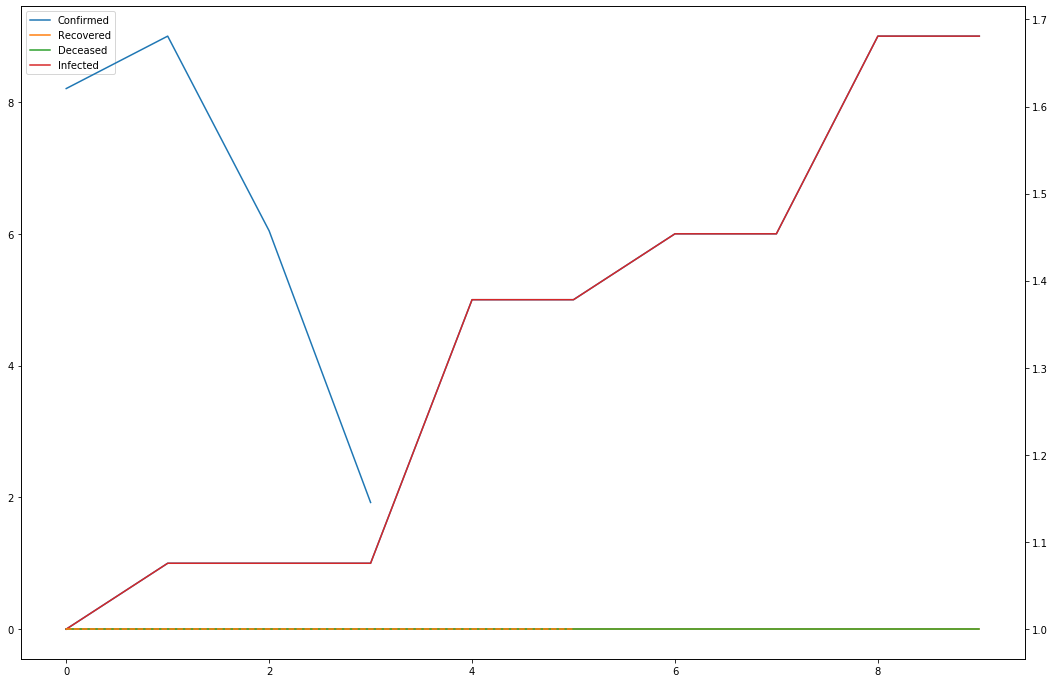

Days since first infected for Guyana: 10


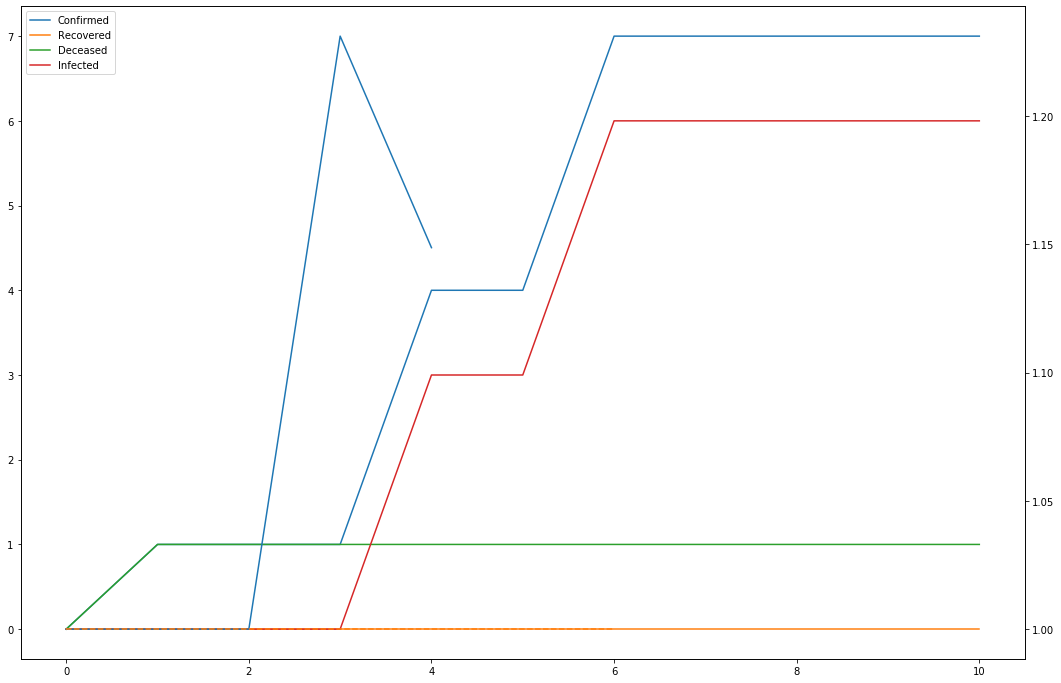

Days since first infected for Kenya: 9


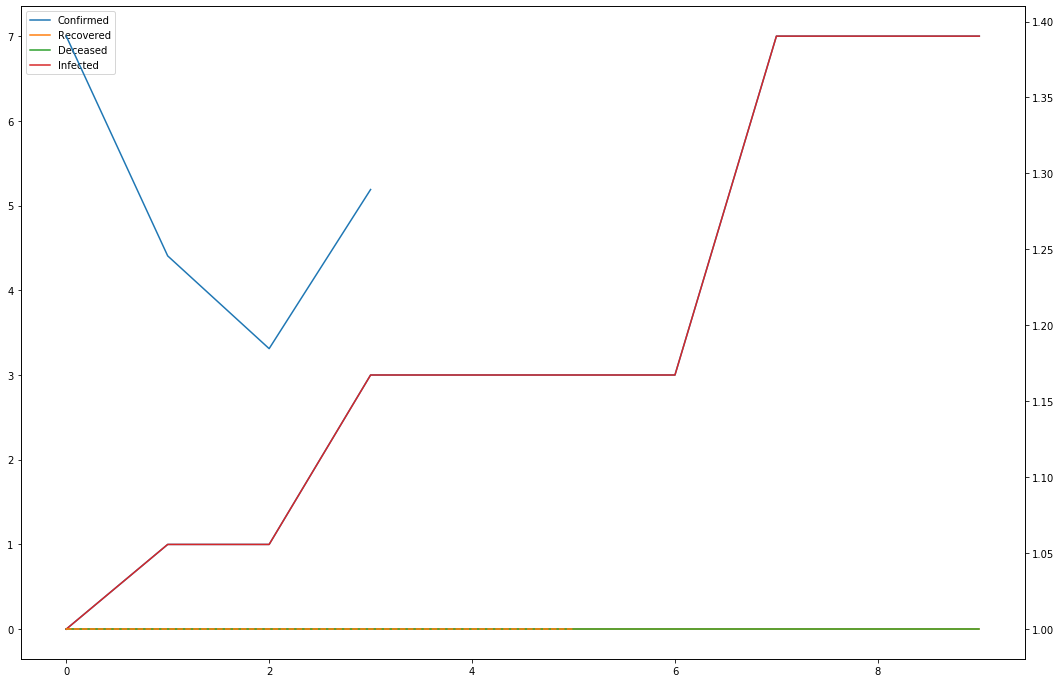

Days since first infected for Seychelles: 8


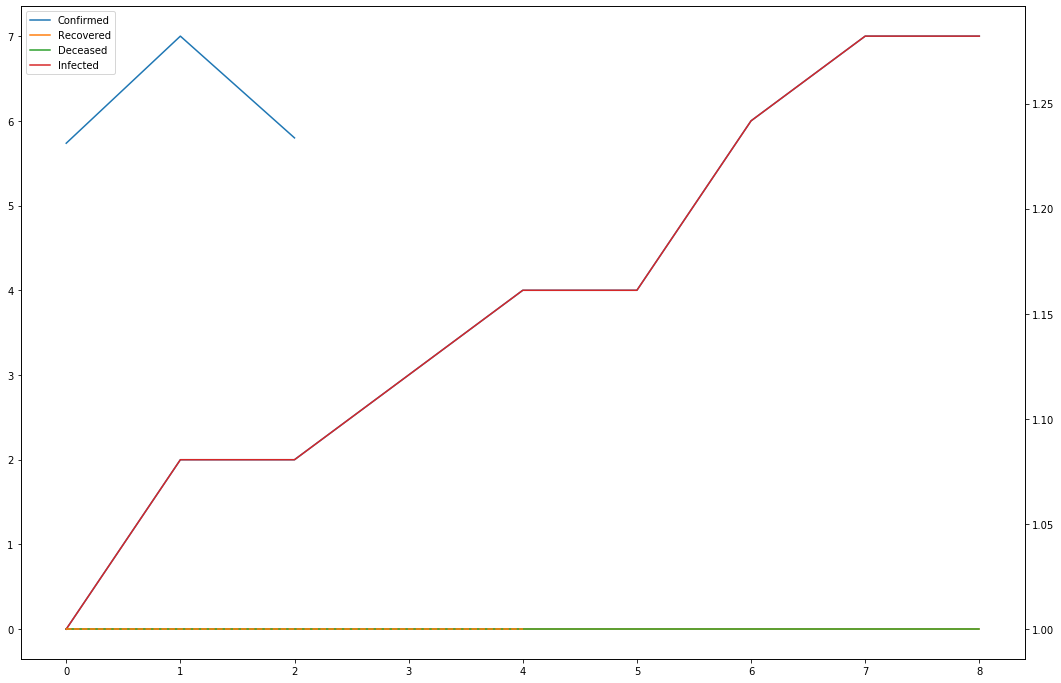

Days since first infected for Barbados: 5


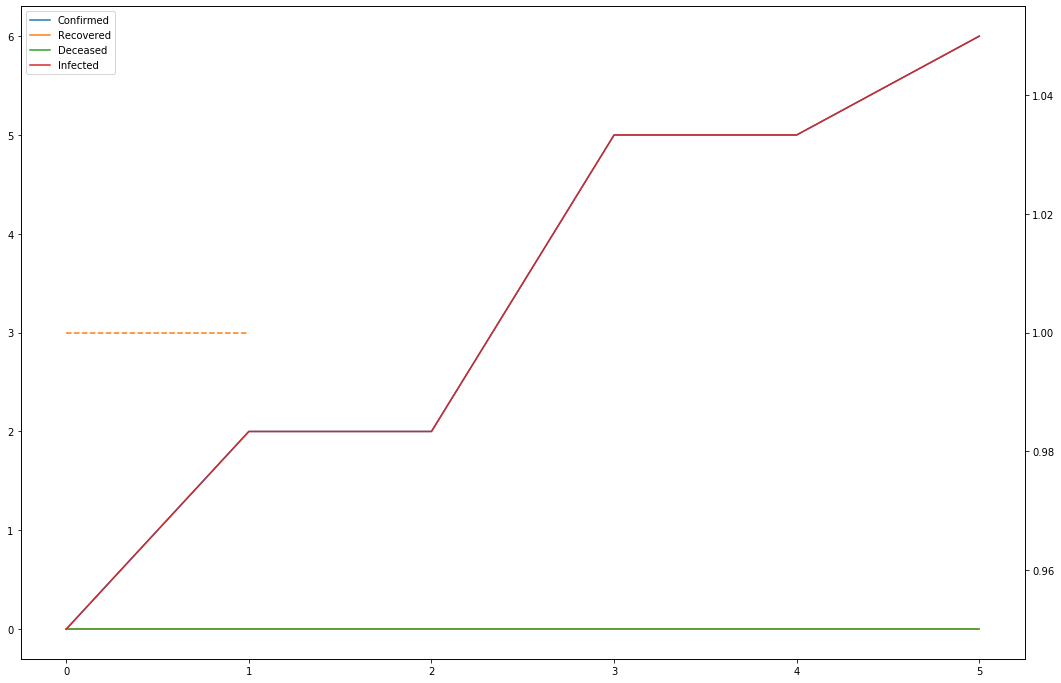

Days since first infected for Tanzania: 6


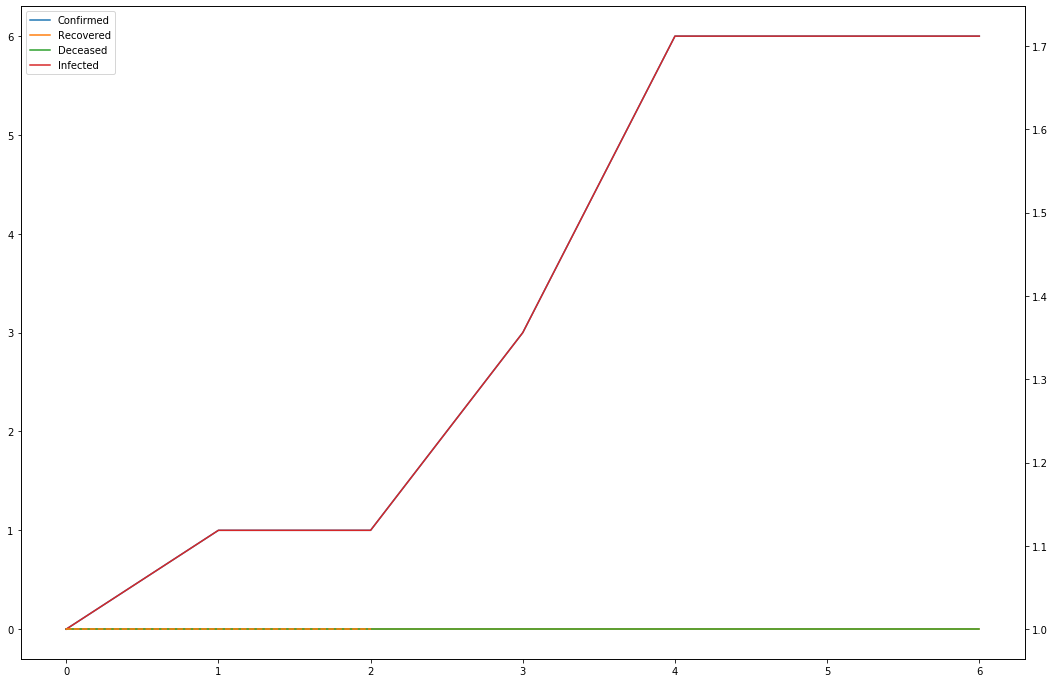

Days since first infected for Equatorial Guinea: 7


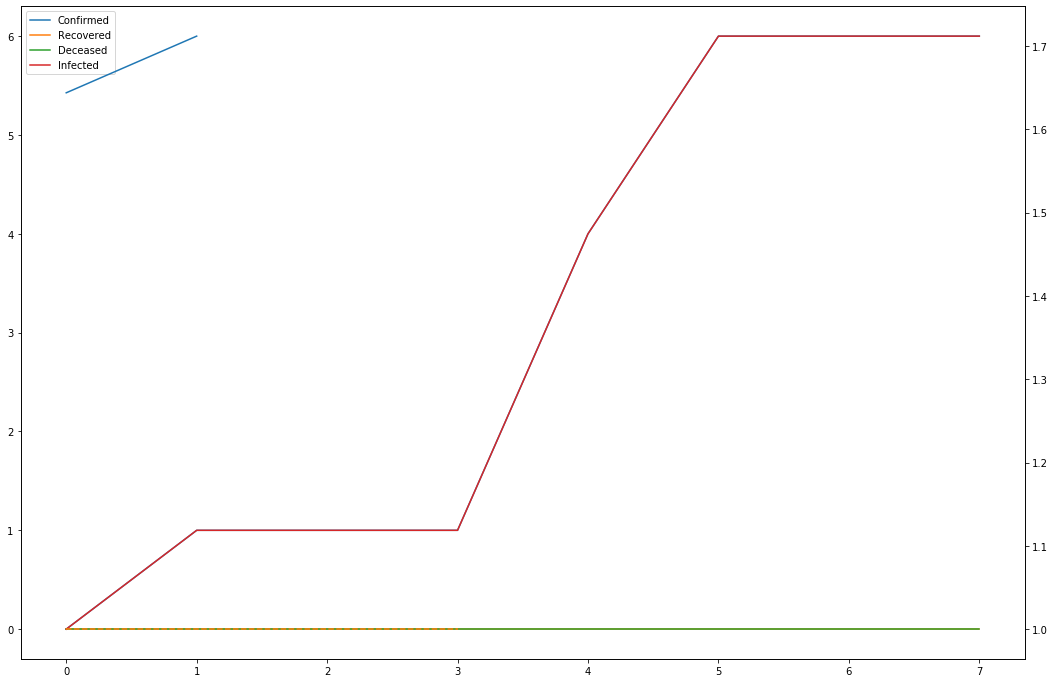

Days since first infected for Suriname: 8


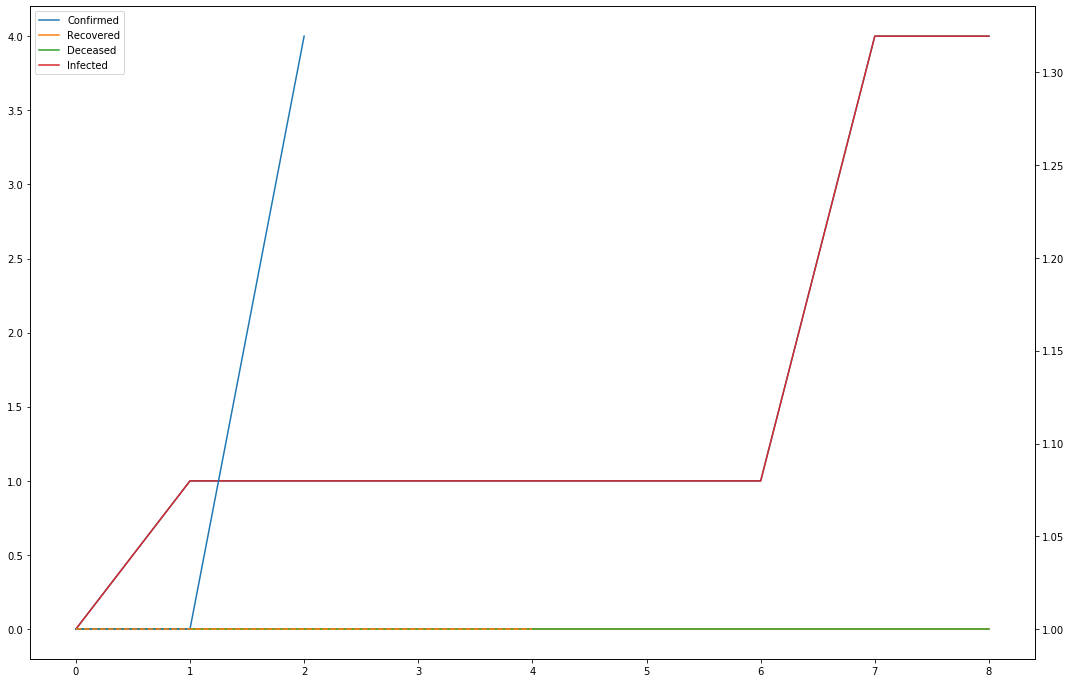

Days since first infected for Gabon: 8


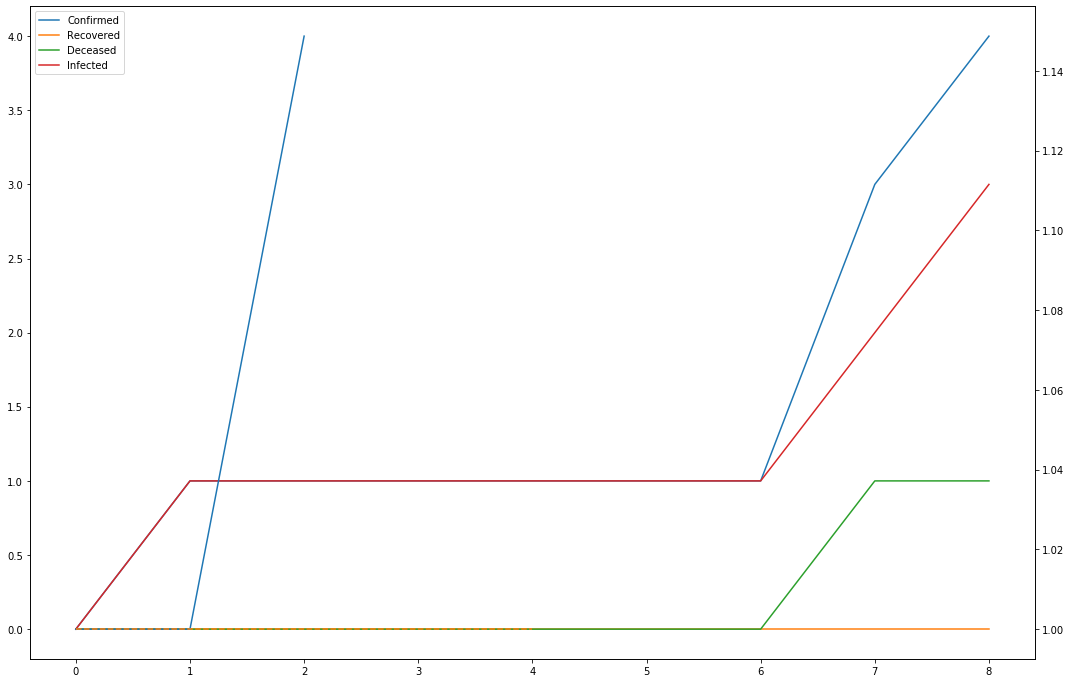

Days since first infected for Bahamas, The: 6


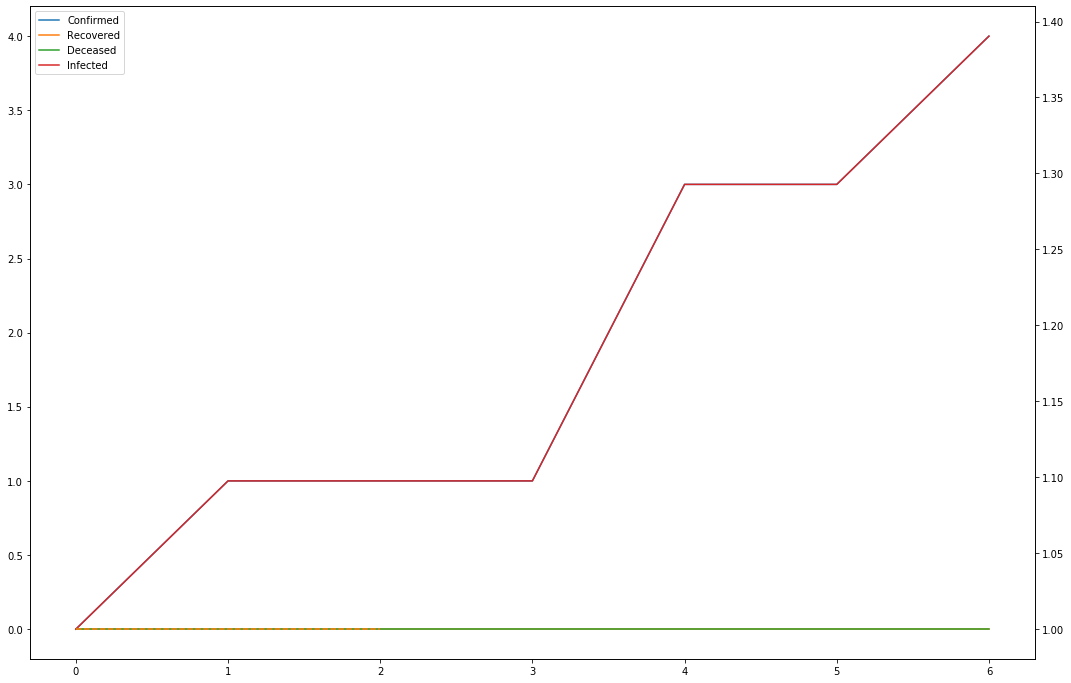

Days since first infected for Cabo Verde: 2


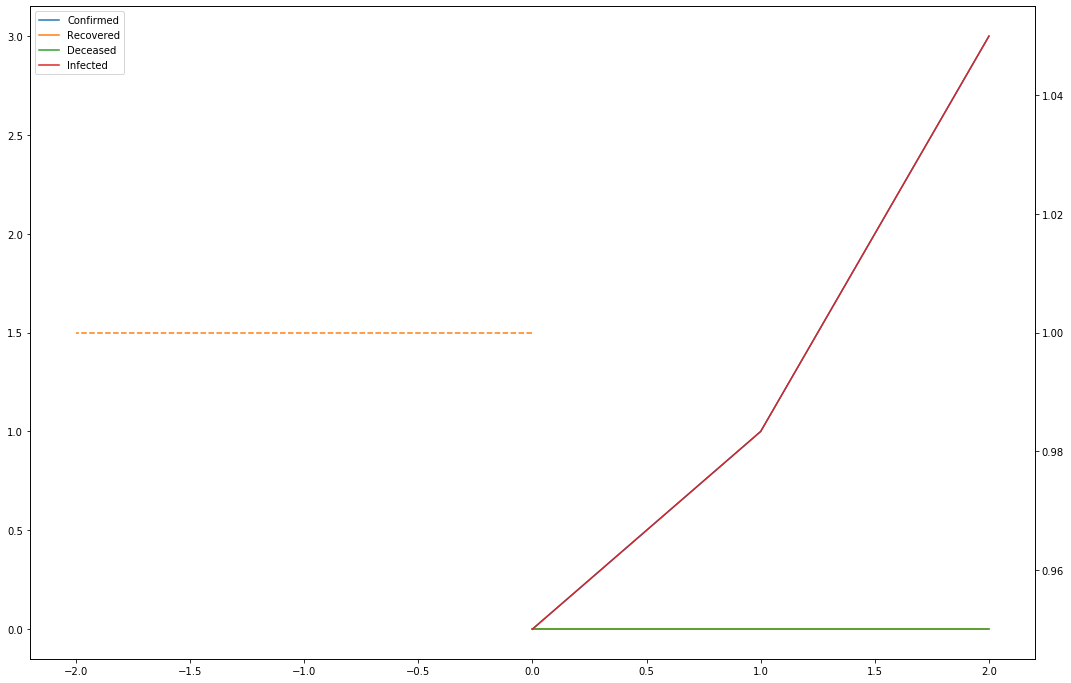

Days since first infected for Central African Republic: 7


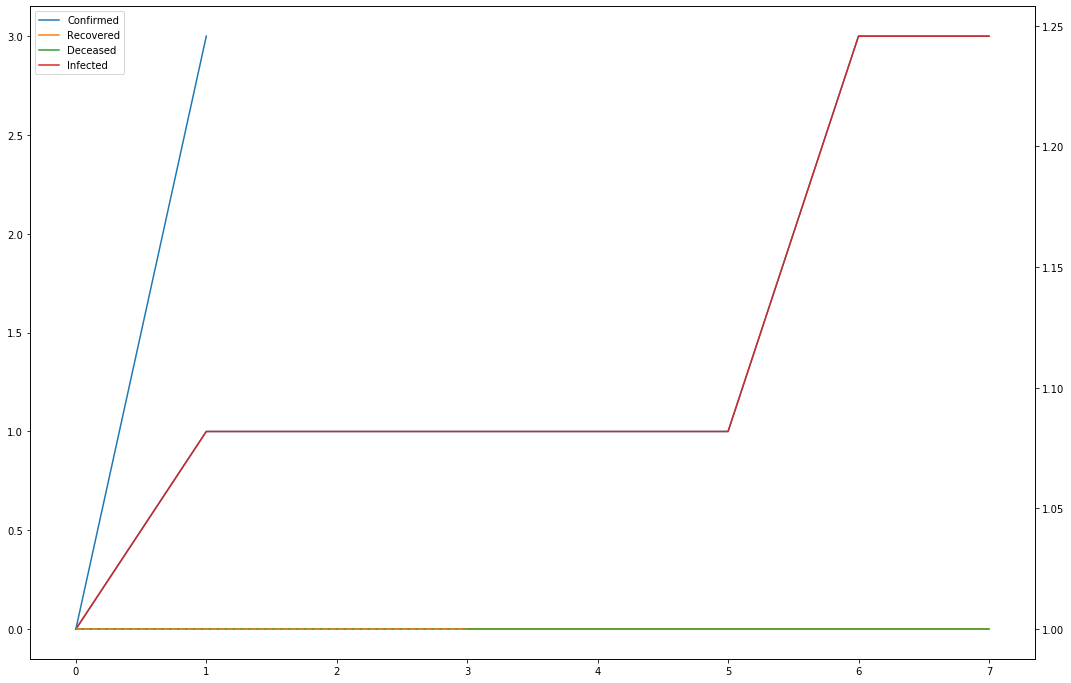

Days since first infected for Namibia: 8


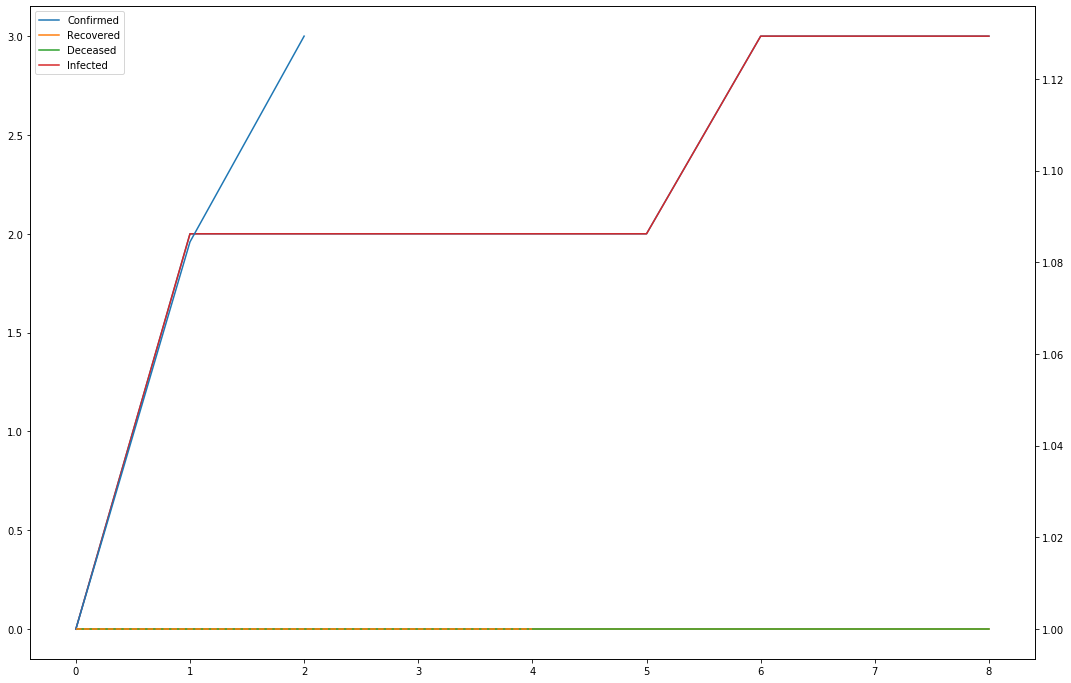

Days since first infected for Zimbabwe: 2


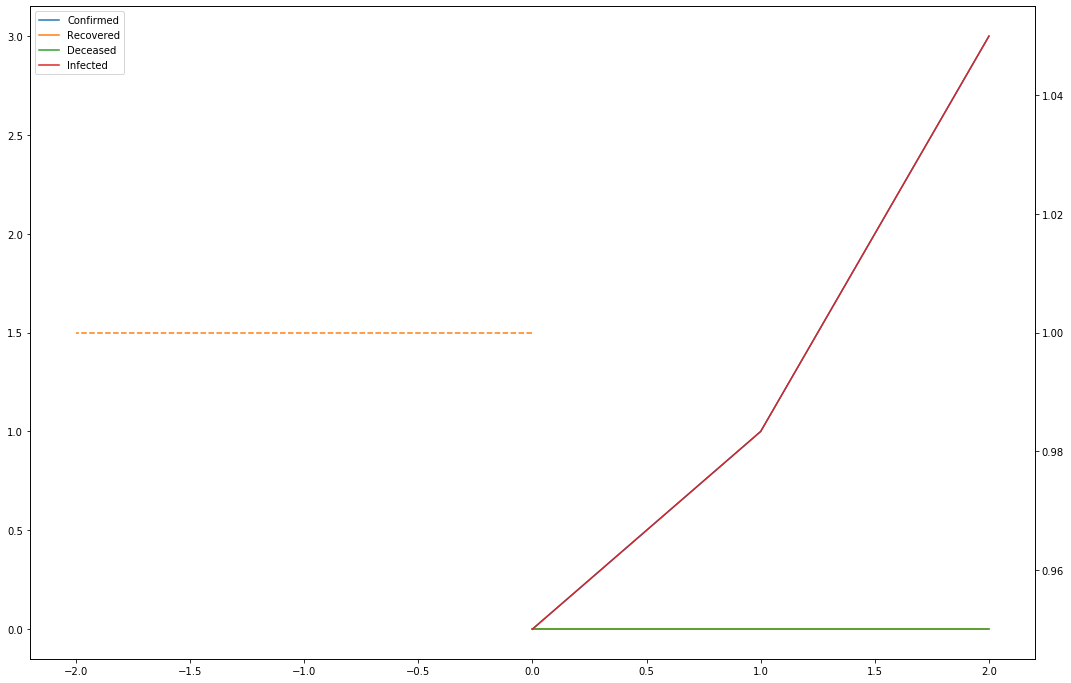

Days since first infected for Congo (Brazzaville): 7


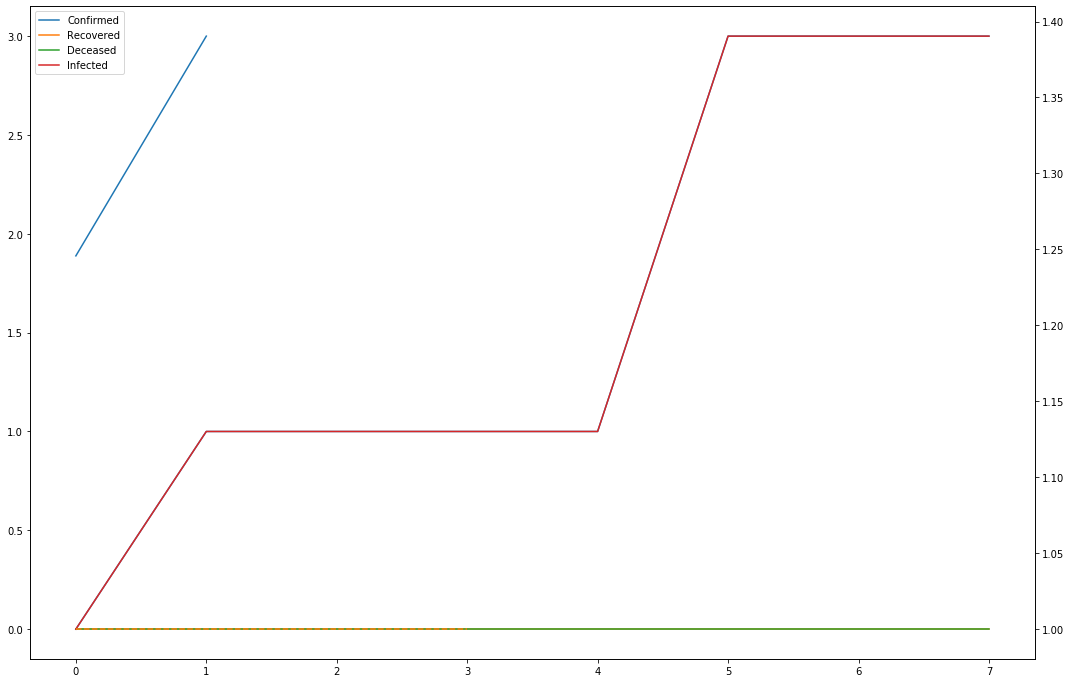

Days since first infected for Madagascar: 2


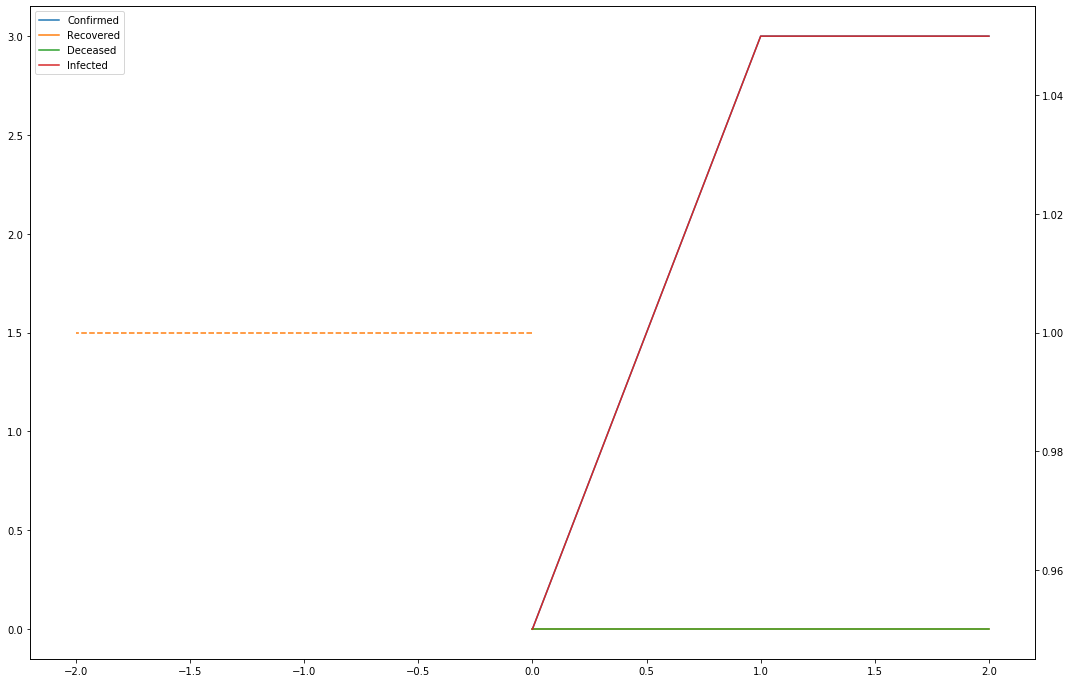

Days since first infected for Liberia: 6


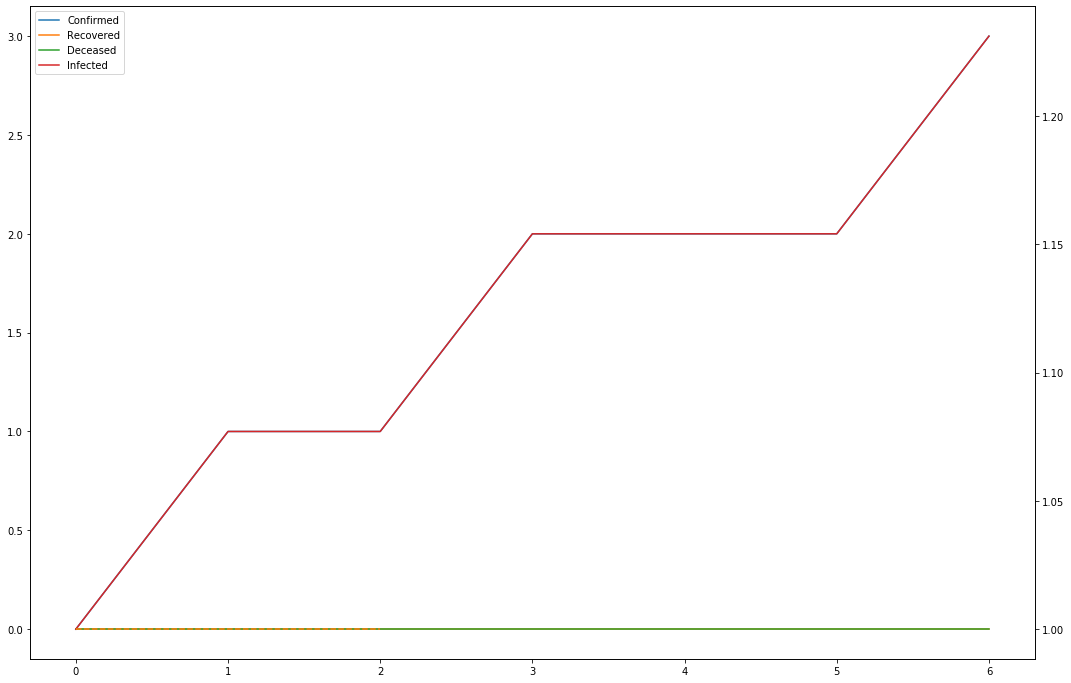

Days since first infected for El Salvador: 3


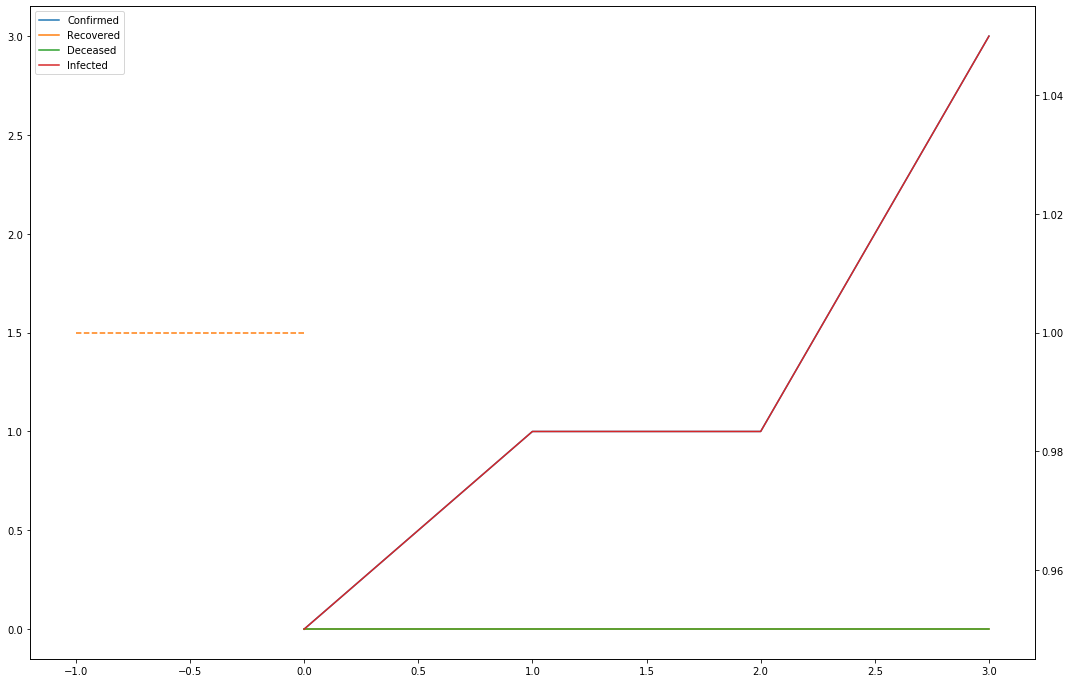

Days since first infected for Mauritania: 8


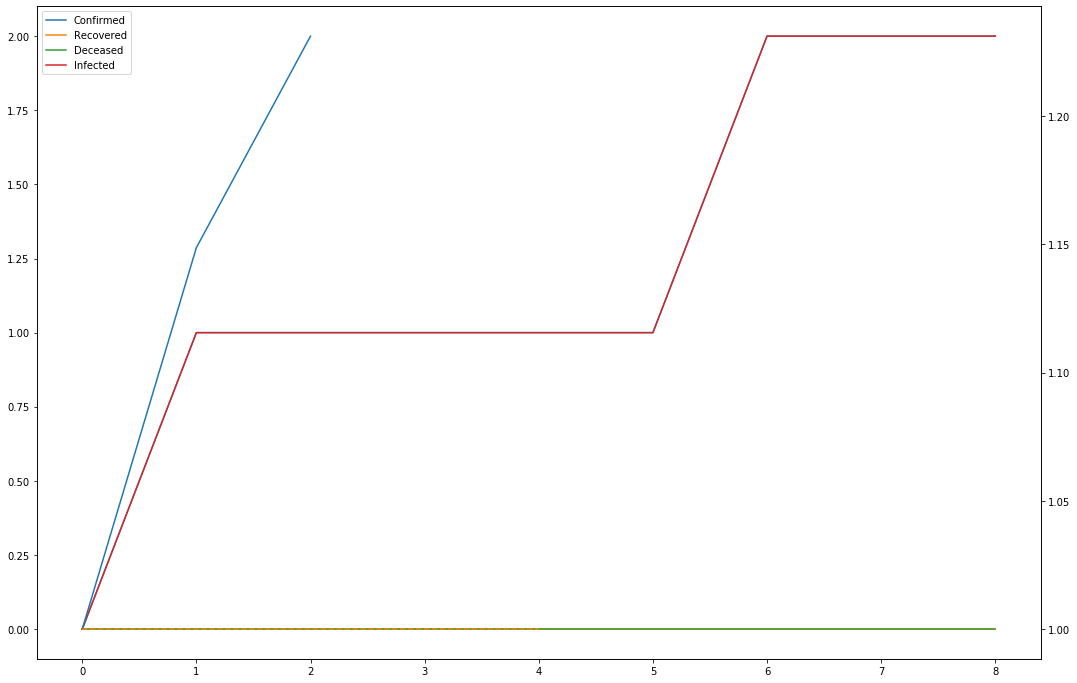

Days since first infected for Angola: 2


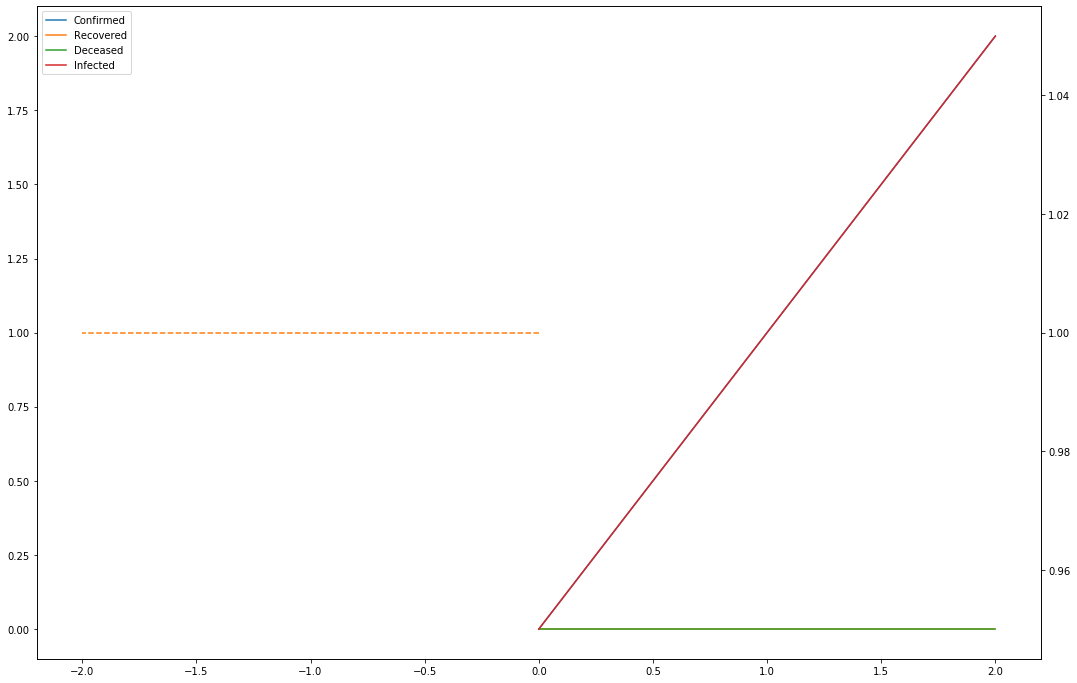

Days since first infected for Haiti: 2


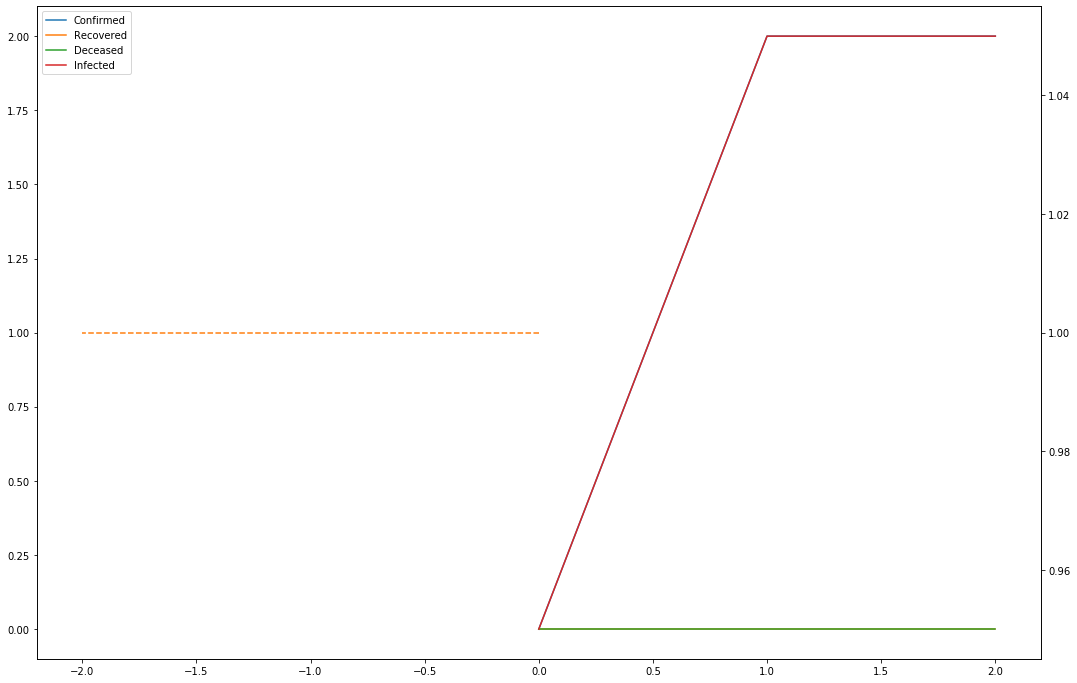

Days since first infected for Saint Lucia: 8


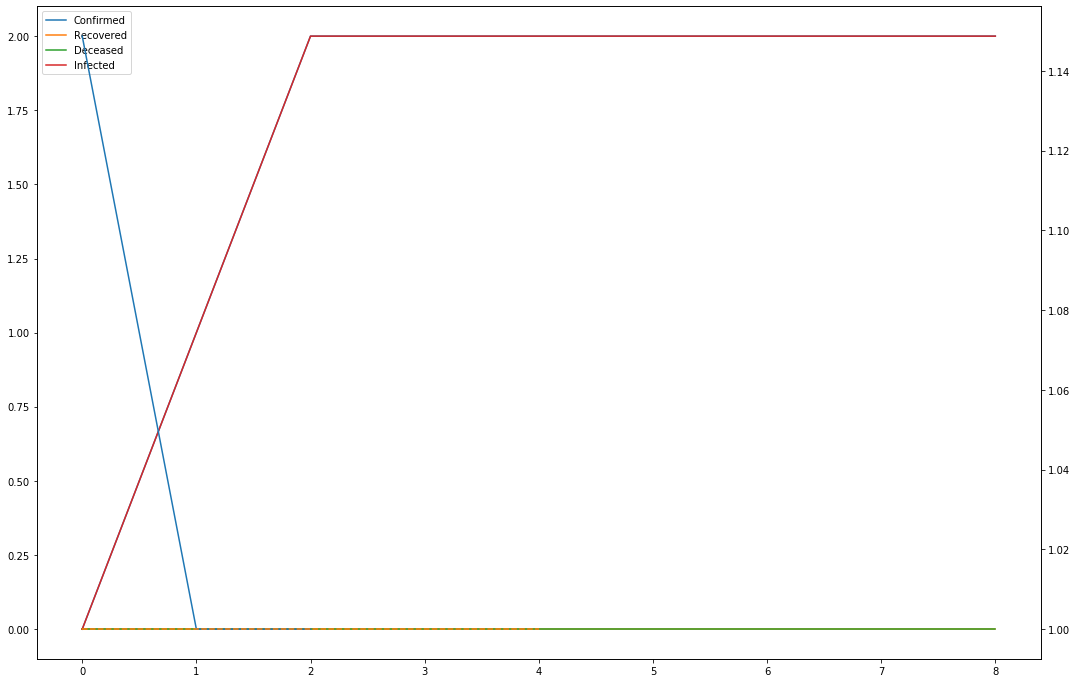

Days since first infected for Sudan: 9


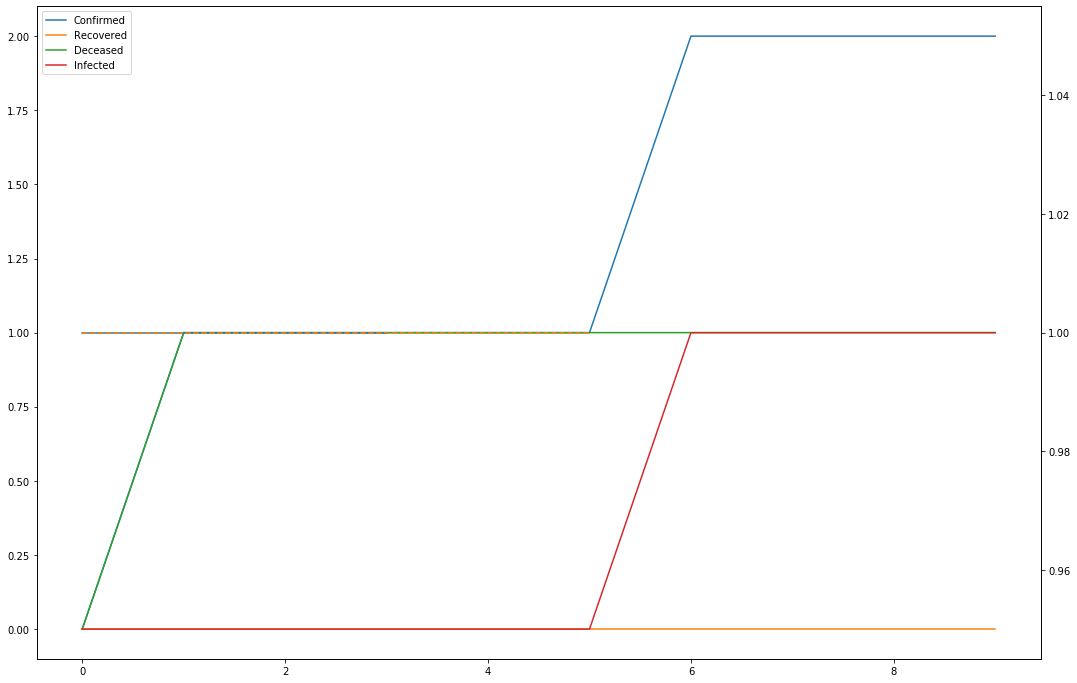

Days since first infected for Benin: 6


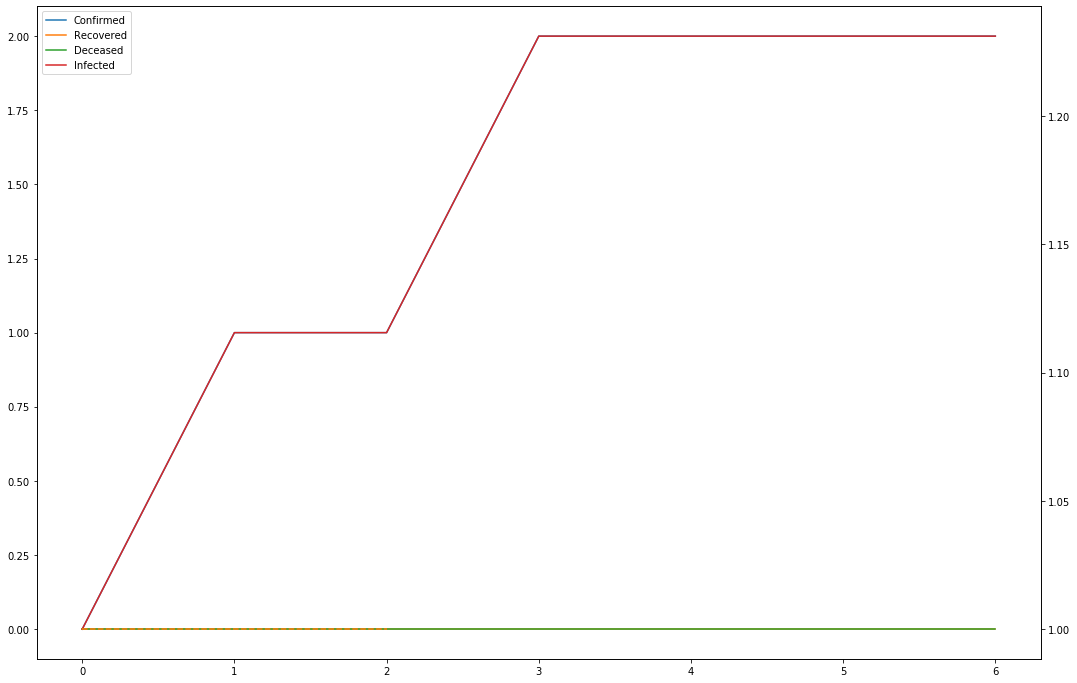

Days since first infected for Bhutan: 16


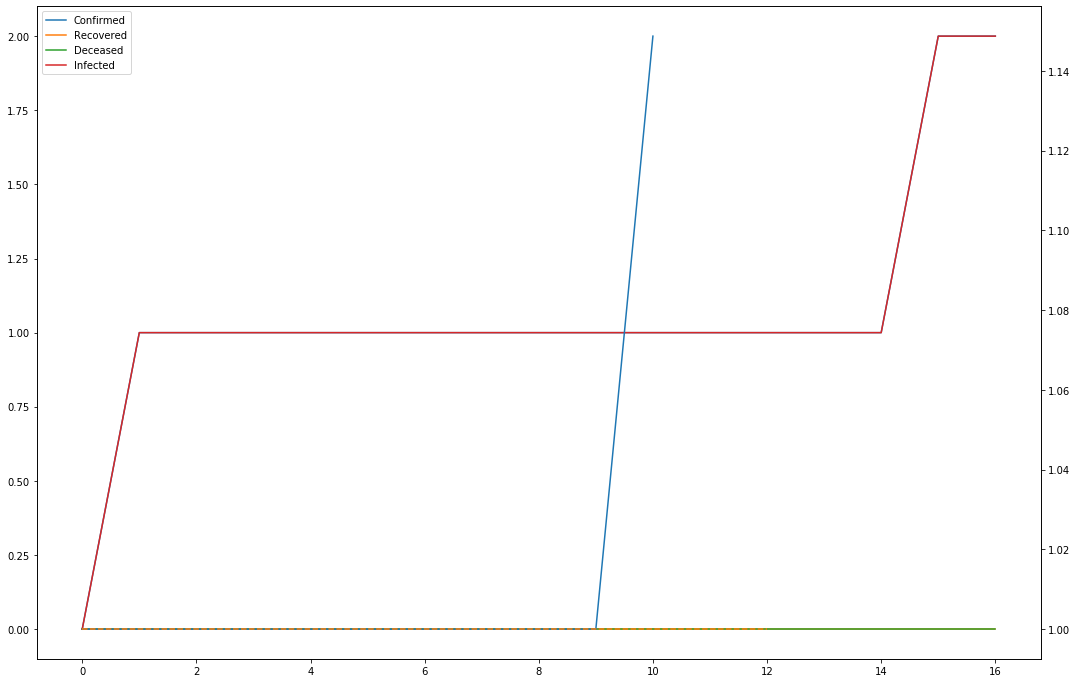

Days since first infected for Guinea: 9


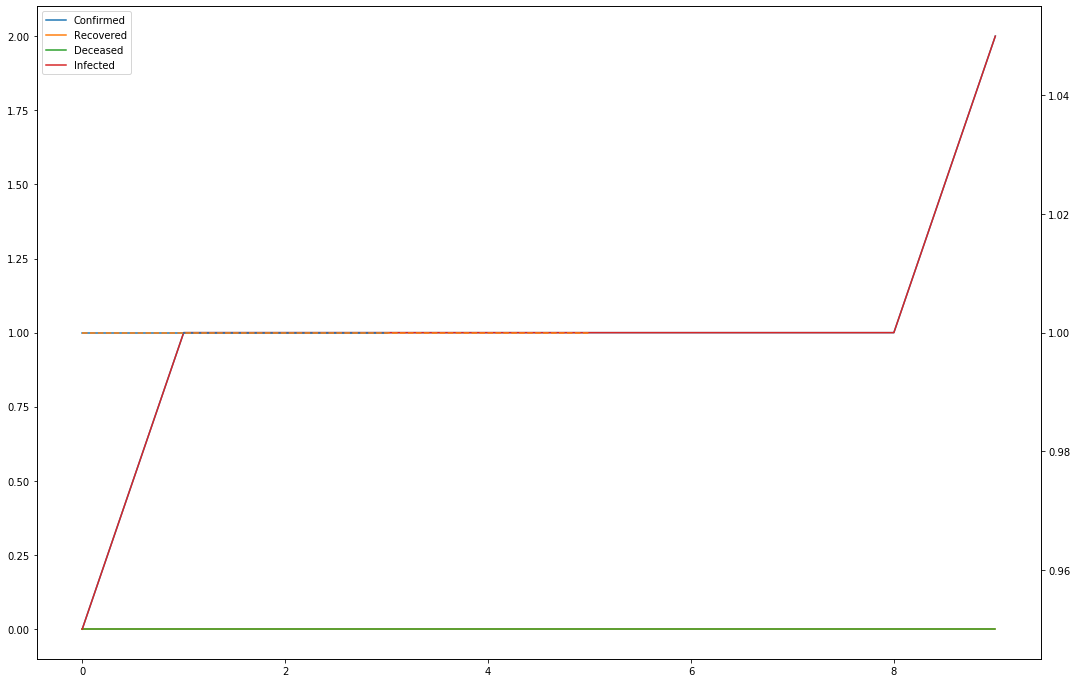

Days since first infected for Nicaragua: 3


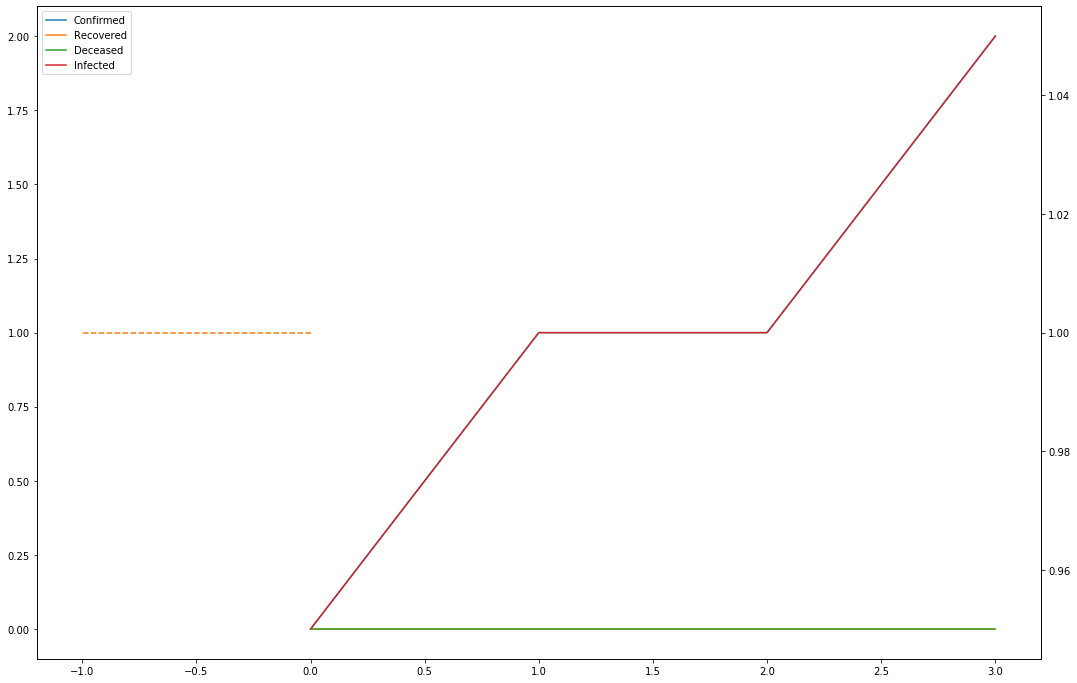

Days since first infected for Zambia: 4


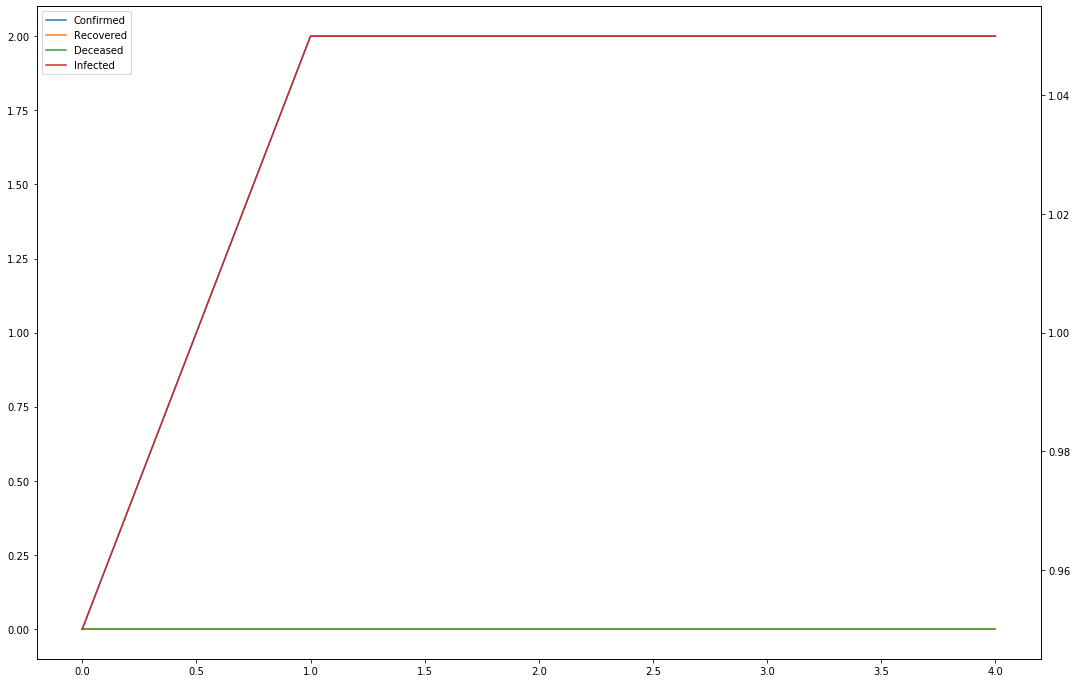

Days since first infected for Kosovo: 7


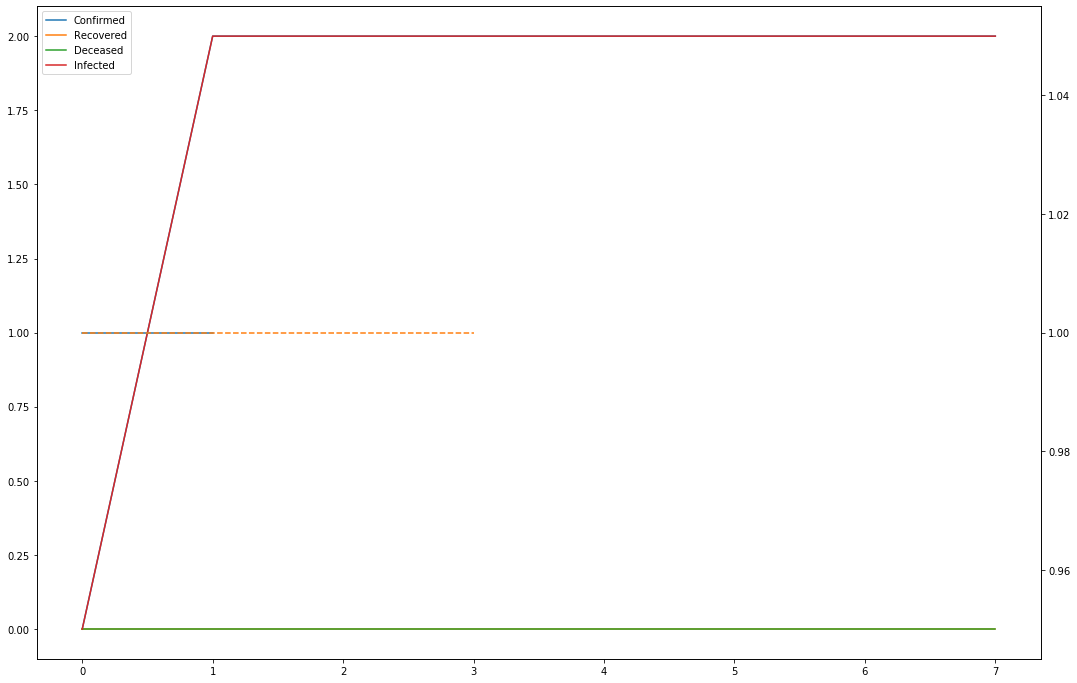

Days since first infected for Eswatini: 8


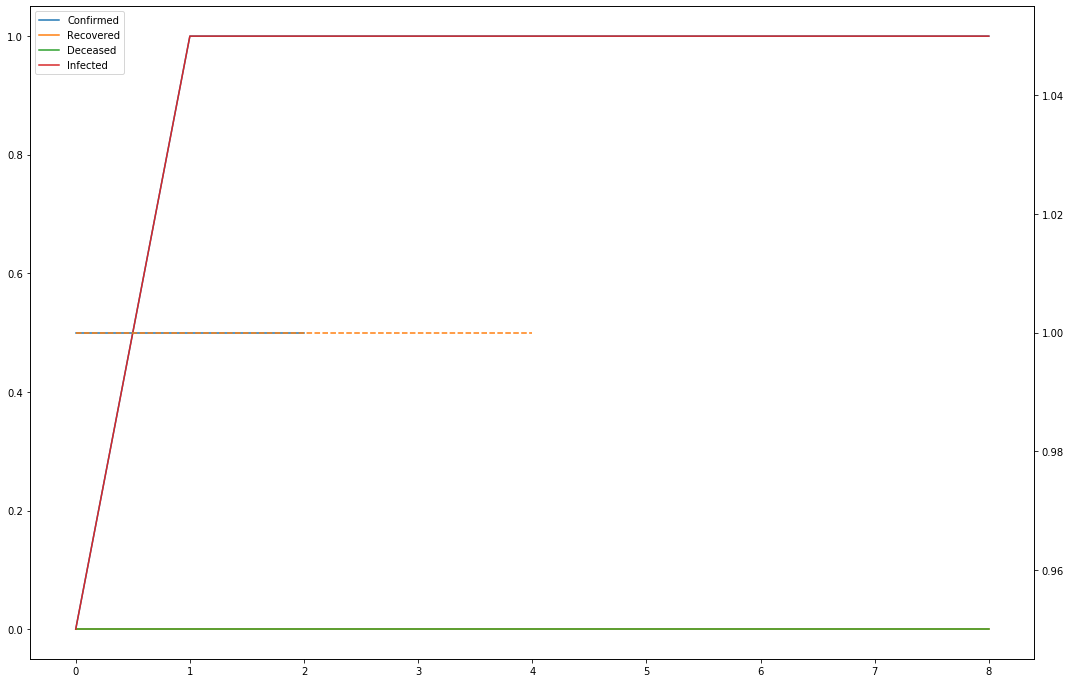

Days since first infected for Gambia, The: 5


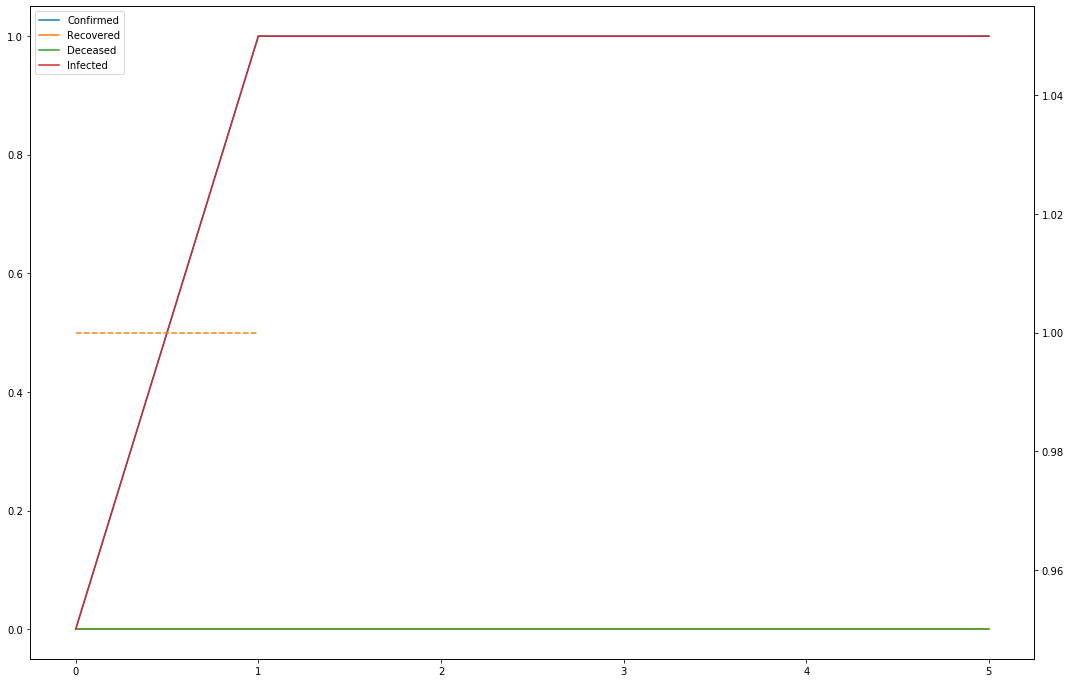

Days since first infected for Antigua and Barbuda: 9


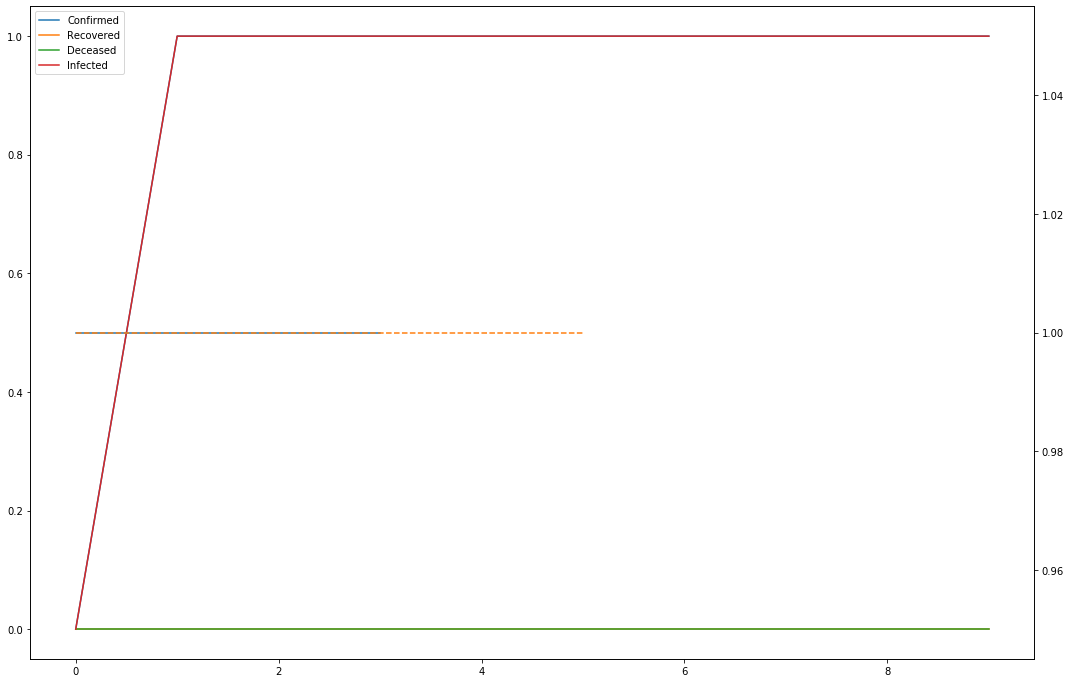

Days since first infected for Fiji: 3


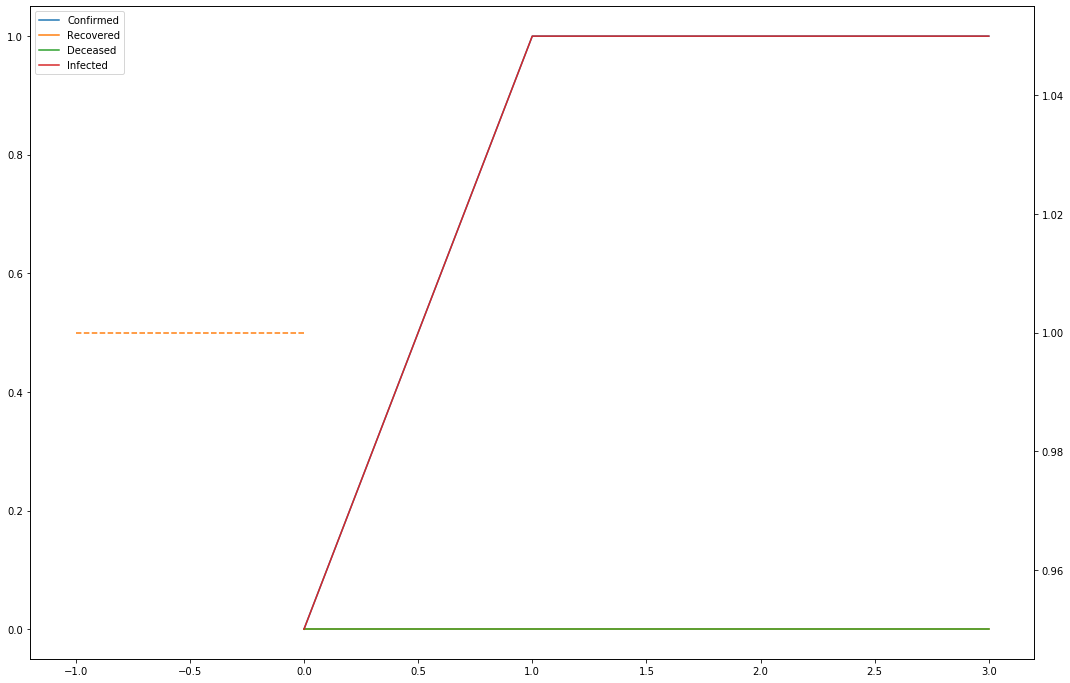

Days since first infected for Uganda: 1


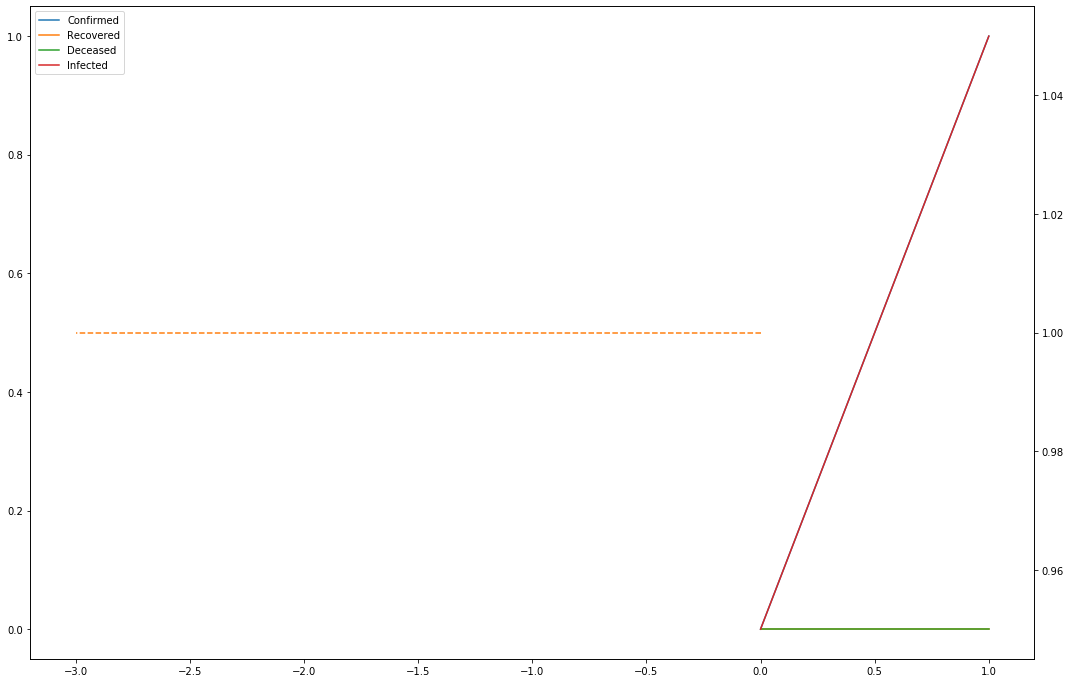

Days since first infected for Somalia: 6


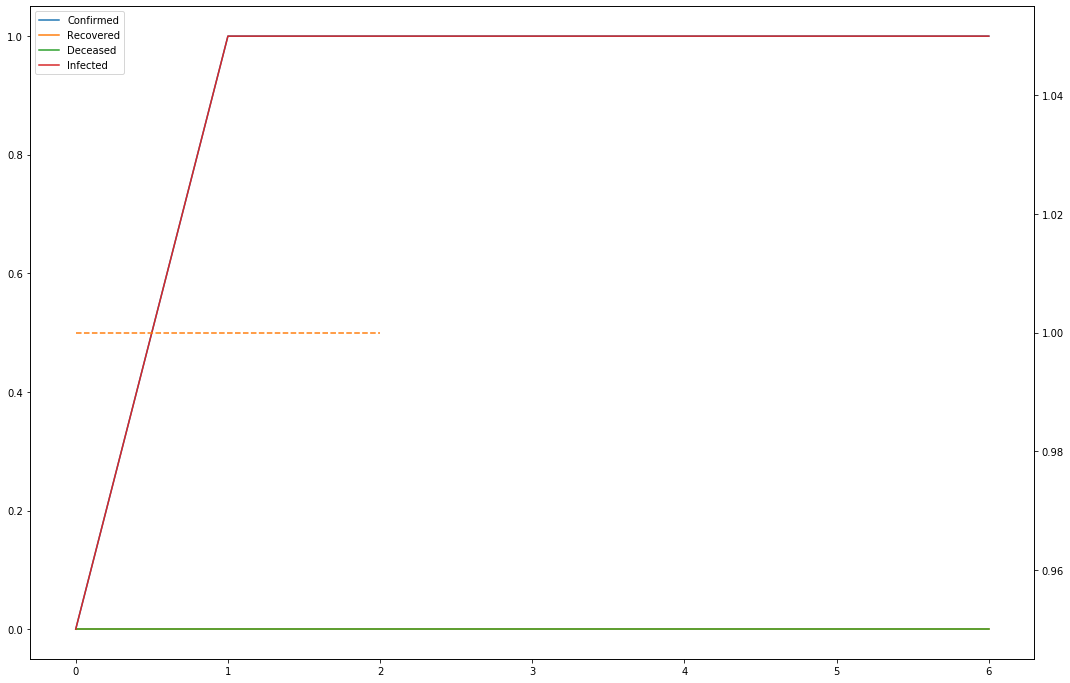

Days since first infected for Holy See: 16


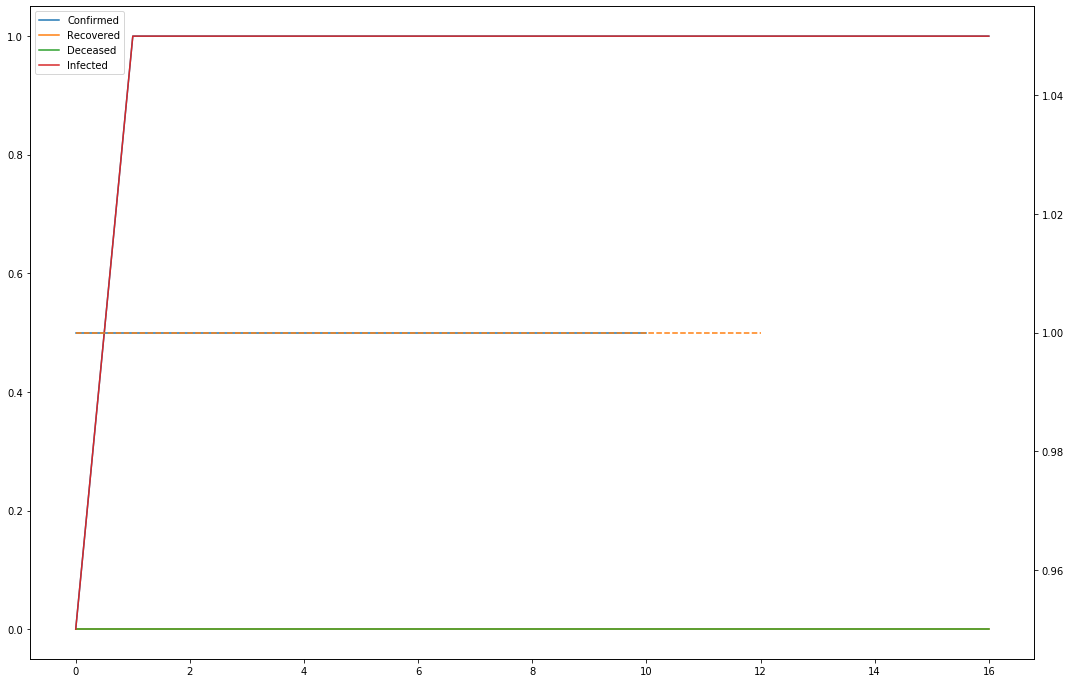

Days since first infected for Saint Vincent and the Grenadines: 8


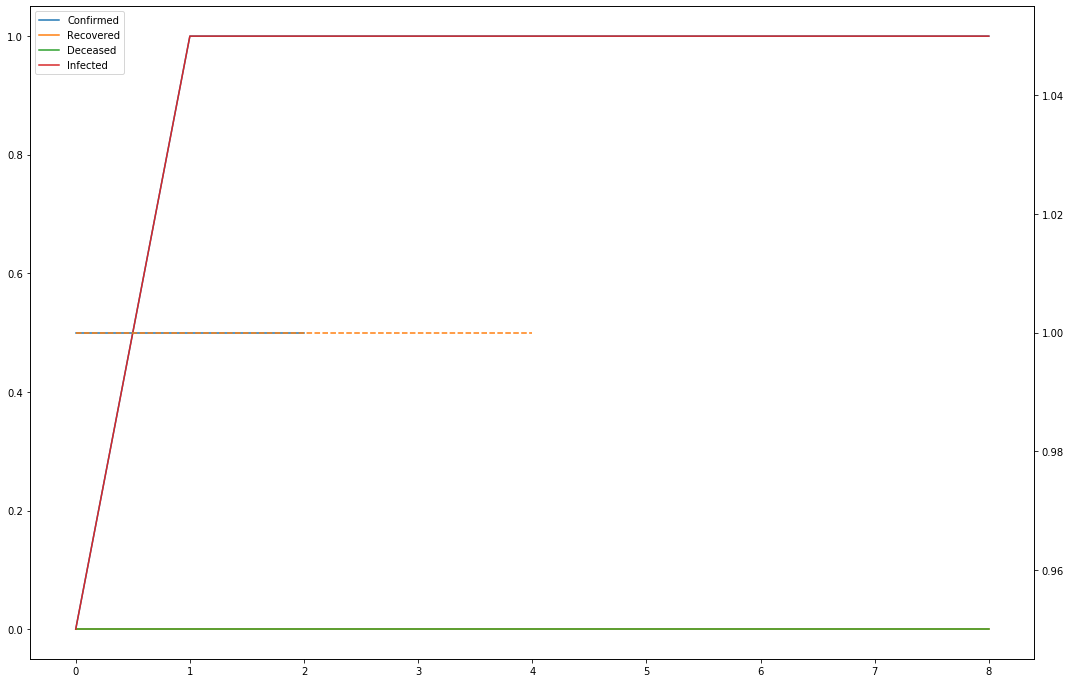

Days since first infected for Eritrea: 1


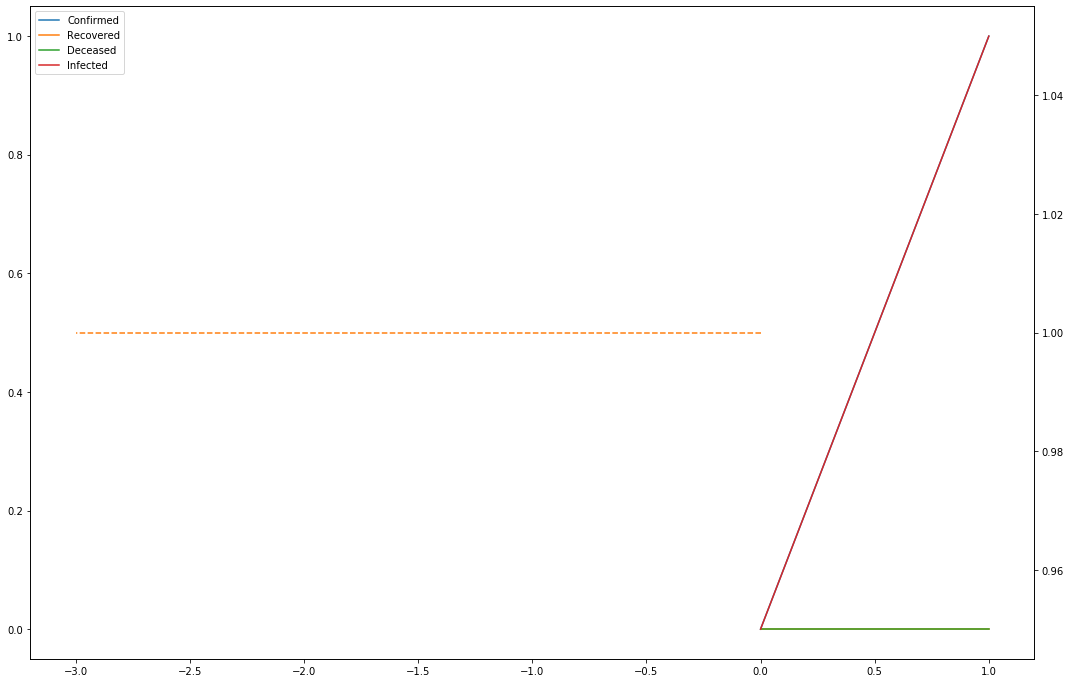

Days since first infected for Cape Verde: 1


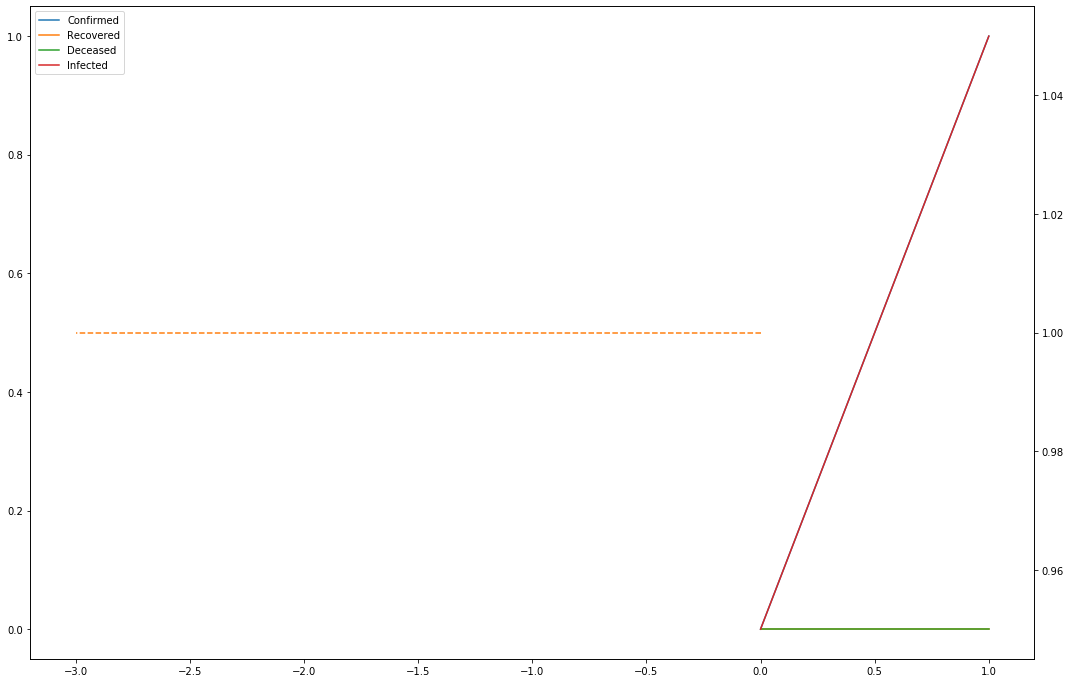

Days since first infected for Papua New Guinea: 2


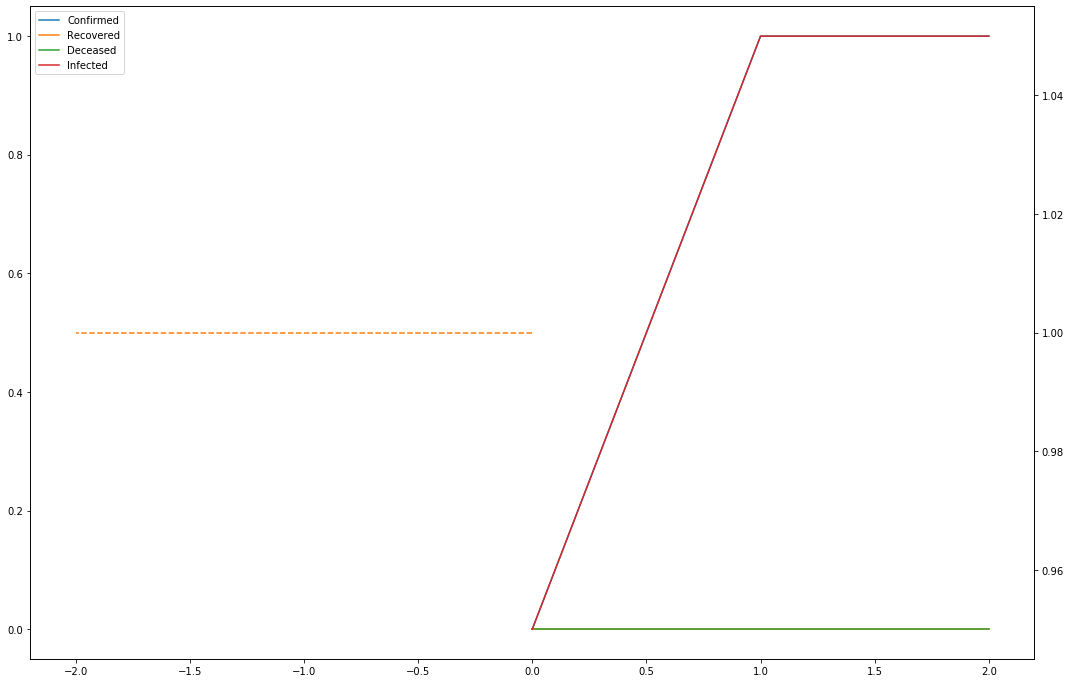

Days since first infected for East Timor: 1


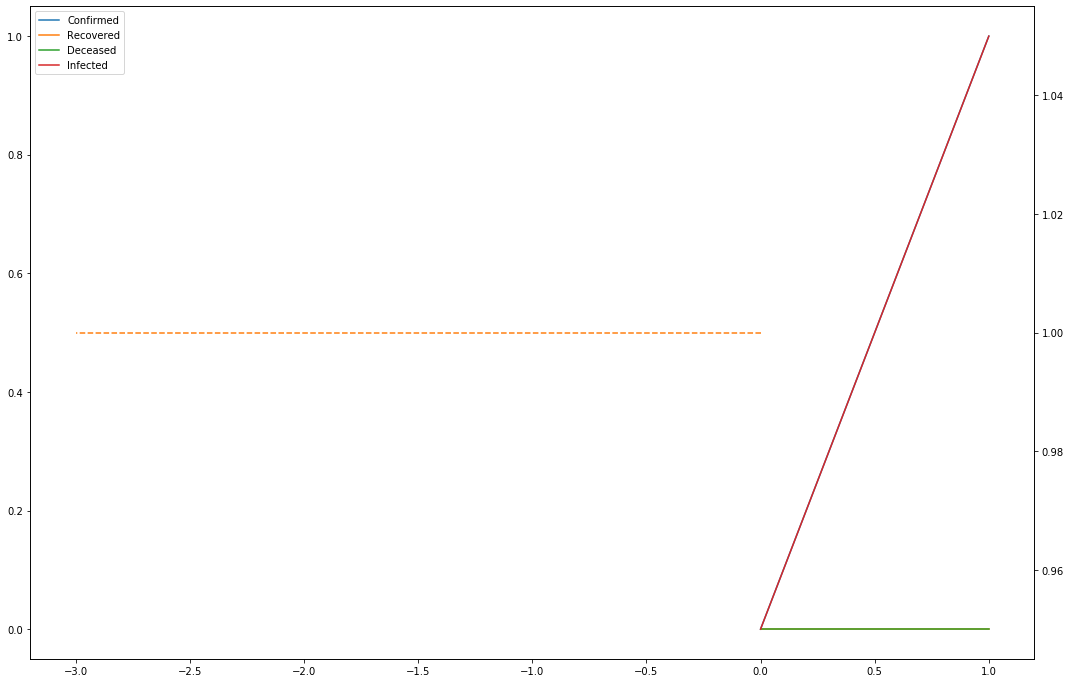

Days since first infected for Djibouti: 4


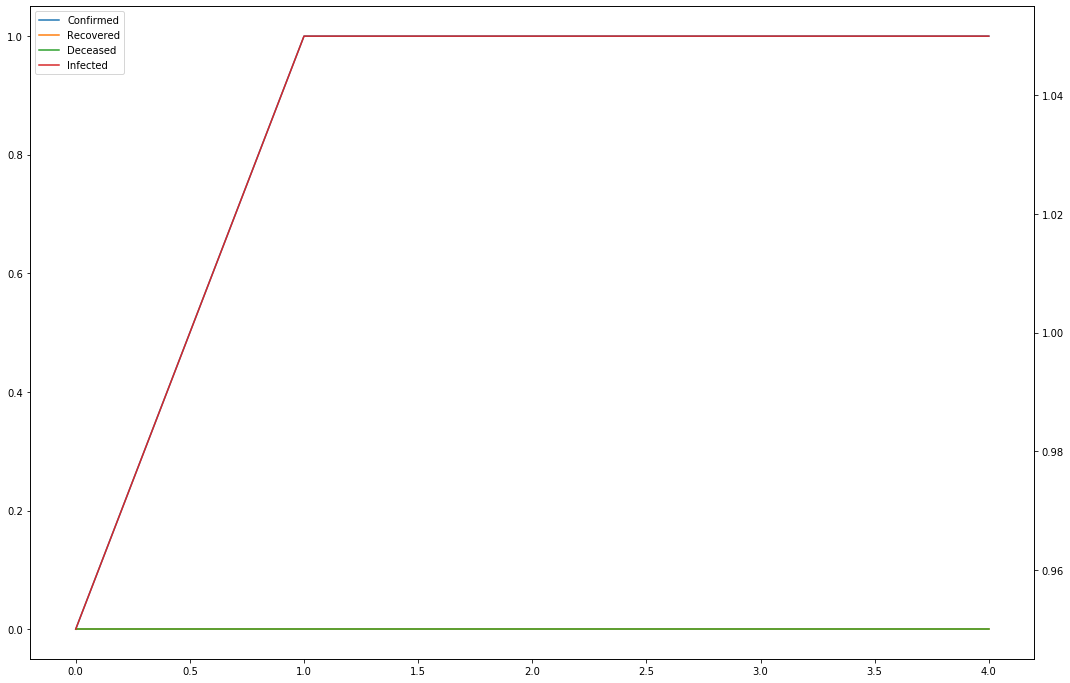

Days since first infected for Niger: 2


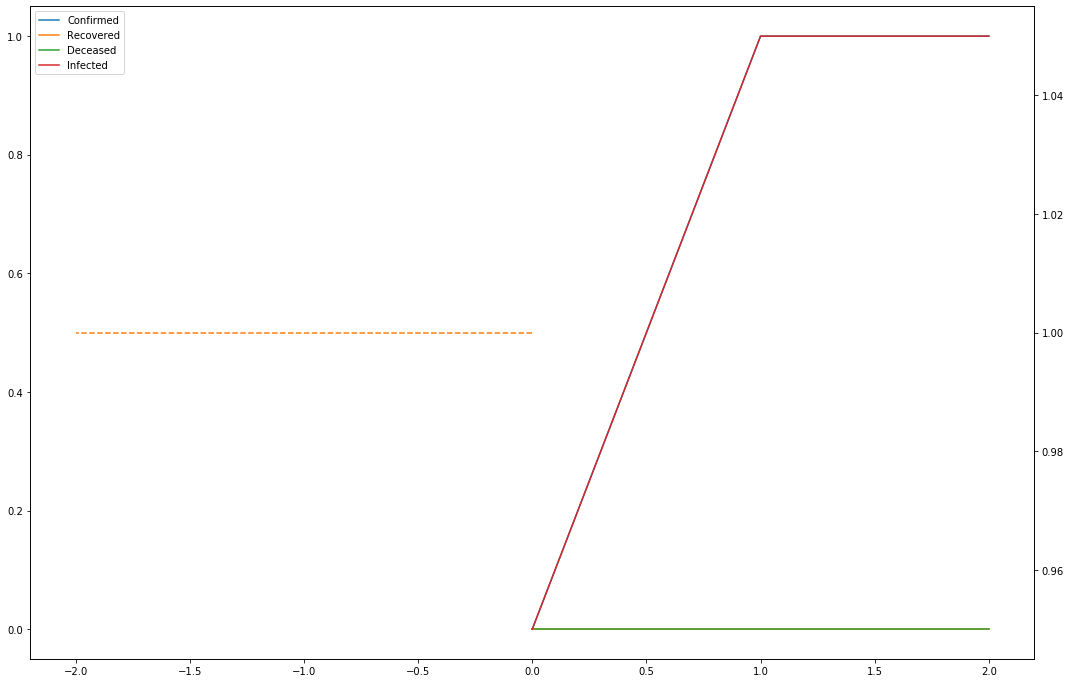

Days since first infected for Nepal: 57


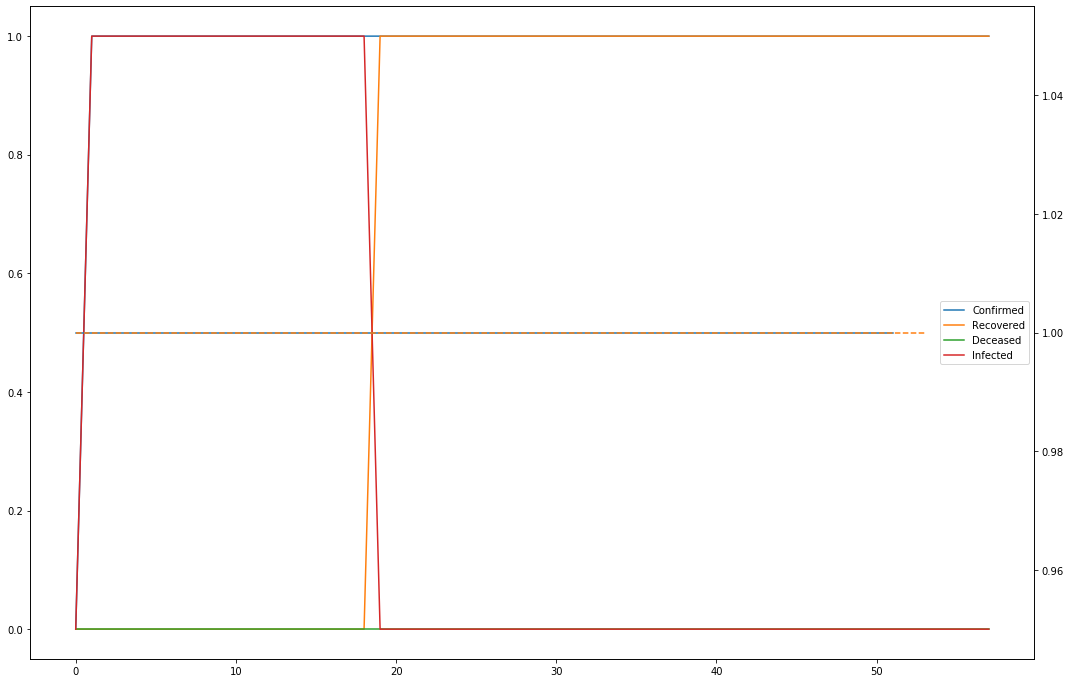

Days since first infected for Chad: 3


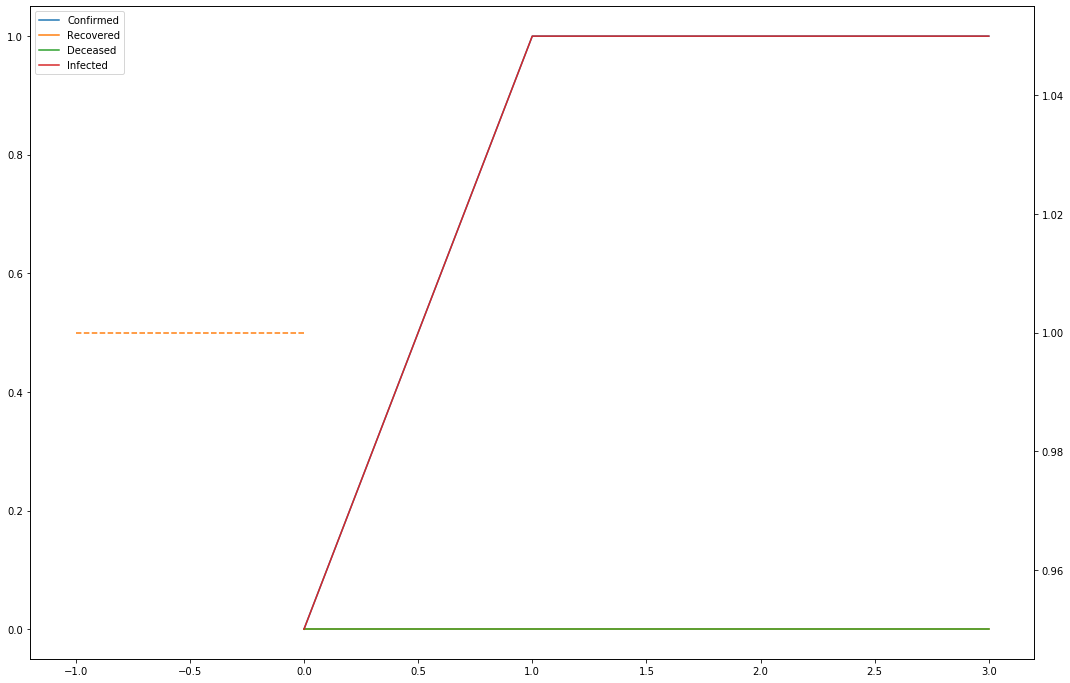

In [509]:
for country in countries:
    dsfi = days_since_first_infected(country)
    print(f"Days since first infected for {country}: {dsfi}")
    plot_stats(country)
    

# get_confirmed("United Kingdom")

In [329]:
df[df["Country/Region"] == "United Kingdom"].T[4:].sum(axis=1)

1/22/20       0.0
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
1/27/20       0.0
1/28/20       0.0
1/29/20       0.0
1/30/20       0.0
1/31/20       2.0
2/1/20        2.0
2/2/20        2.0
2/3/20        2.0
2/4/20        2.0
2/5/20        2.0
2/6/20        2.0
2/7/20        3.0
2/8/20        3.0
2/9/20        3.0
2/10/20       8.0
2/11/20       8.0
2/12/20       9.0
2/13/20       9.0
2/14/20       9.0
2/15/20       9.0
2/16/20       9.0
2/17/20       9.0
2/18/20       9.0
2/19/20       9.0
2/20/20       9.0
2/21/20       9.0
2/22/20       9.0
2/23/20       9.0
2/24/20      13.0
2/25/20      13.0
2/26/20      13.0
2/27/20      15.0
2/28/20      20.0
2/29/20      23.0
3/1/20       36.0
3/2/20       40.0
3/3/20       51.0
3/4/20       86.0
3/5/20      116.0
3/6/20      164.0
3/7/20      207.0
3/8/20      274.0
3/9/20      322.0
3/10/20     384.0
3/11/20     459.0
3/12/20     459.0
3/13/20     802.0
3/14/20    1144.0
3/15/20    1145.0
3/16/20    1551.0
3/17/20   

In [398]:
plt.figure(figsize=[18,6])
list(df_confirmed.groupby("Country/Region").sum().iloc[:,-1].sort_values(ascending=False).index)

['China',
 'Italy',
 'Spain',
 'Germany',
 'Iran',
 'US',
 'France',
 'Korea, South',
 'Switzerland',
 'United Kingdom',
 'Netherlands',
 'Austria',
 'Belgium',
 'Norway',
 'Sweden',
 'Denmark',
 'Malaysia',
 'Portugal',
 'Japan',
 'Canada',
 'Czechia',
 'Brazil',
 'Australia',
 'Cruise Ship',
 'Israel',
 'Ireland',
 'Pakistan',
 'Greece',
 'Luxembourg',
 'Qatar',
 'Finland',
 'Chile',
 'Poland',
 'Iceland',
 'Singapore',
 'Indonesia',
 'Ecuador',
 'Turkey',
 'Saudi Arabia',
 'Slovenia',
 'Thailand',
 'Romania',
 'Bahrain',
 'Egypt',
 'Estonia',
 'Russia',
 'India',
 'Peru',
 'Philippines',
 'Iraq',
 'South Africa',
 'Mexico',
 'Lebanon',
 'Kuwait',
 'San Marino',
 'United Arab Emirates',
 'Slovakia',
 'Panama',
 'Armenia',
 'Serbia',
 'Taiwan*',
 'Argentina',
 'Colombia',
 'Croatia',
 'Bulgaria',
 'Latvia',
 'Uruguay',
 'Vietnam',
 'Algeria',
 'Bosnia and Herzegovina',
 'Costa Rica',
 'Jordan',
 'Hungary',
 'Brunei',
 'Morocco',
 'Andorra',
 'Sri Lanka',
 'Dominican Republic',
 'Alban

<Figure size 1296x432 with 0 Axes>

In [368]:
get_infected()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   2,   8,  11,  11,  16,  18,  18,  29,
        31,  42,  53,  63,  74,  91, 122])

In [468]:
get_confirmed().dif()

AttributeError: 'numpy.ndarray' object has no attribute 'dif'

In [512]:
df_recovered.loc["US"]

Lat         9531.0034
Long      -22951.8209
1/22/20        0.0000
1/23/20        0.0000
1/24/20        0.0000
1/25/20        0.0000
1/26/20        0.0000
1/27/20        0.0000
1/28/20        0.0000
1/29/20        0.0000
1/30/20        0.0000
1/31/20        0.0000
2/1/20         0.0000
2/2/20         0.0000
2/3/20         0.0000
2/4/20         0.0000
2/5/20         0.0000
2/6/20         0.0000
2/7/20         0.0000
2/8/20         0.0000
2/9/20         3.0000
2/10/20        3.0000
2/11/20        3.0000
2/12/20        3.0000
2/13/20        3.0000
2/14/20        3.0000
2/15/20        3.0000
2/16/20        3.0000
2/17/20        3.0000
2/18/20        3.0000
              ...    
2/21/20        5.0000
2/22/20        5.0000
2/23/20        5.0000
2/24/20        5.0000
2/25/20        6.0000
2/26/20        6.0000
2/27/20        6.0000
2/28/20        7.0000
2/29/20        7.0000
3/1/20         7.0000
3/2/20         7.0000
3/3/20         7.0000
3/4/20         7.0000
3/5/20         7.0000
3/6/20    

In [517]:
1.2**30

237.37631379976955

In [518]:
225*237

53325

In [521]:
0.9**20

0.12157665459056935